In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
#hypertension = high blood pressure
stroke_data.dropna(axis = 0, how = 'any', inplace = True)
stroke_data.drop(stroke_data.index[stroke_data['gender'] == 'Other'], inplace = True)

stroke_data1 = stroke_data.loc[stroke_data['avg_glucose_level'] <= 168.32]
stroke_data = stroke_data1
stroke_data.reset_index(drop = True, inplace = True)

stroke_data2 = stroke_data.loc[stroke_data['bmi'] <= 47.5]
stroke_data = stroke_data2
stroke_data.reset_index(drop = True, inplace = True)

stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
4,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4254,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4255,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4256,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4257,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000
mean,37132.980512,40.596497,0.068561,0.036394,91.503646,27.814299,0.031932
std,20978.055430,22.445165,0.252735,0.187289,22.703827,6.722199,0.175841
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18682.000000,22.000000,0.000000,0.000000,75.060000,23.000000,0.000000
50%,37640.000000,41.000000,0.000000,0.000000,88.050000,27.400000,0.000000
75%,55363.000000,58.000000,0.000000,0.000000,104.045000,32.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,168.150000,47.500000,1.000000


## EDA - Exploratory Data Analysis



In [4]:
def pie():
    global stroke_data
    new_stroke_data = stroke_data.groupby('smoking_status').count()
    options = list(new_stroke_data.index)
    counts = []
    for val in options:
        counts.append(new_stroke_data["heart_disease"][val])

    new_fig = px.pie(new_stroke_data, values=counts, names=options, title="Percentage of Smokers")
    new_fig.show()
def scat():
    global stroke_data
    new_fig = px.scatter(stroke_data, x="age", y="bmi",color="avg_glucose_level")
    new_fig.show()

def smoke_hist():
    global stroke_data
    fig = px.histogram(stroke_data, x="smoking_status", y="avg_glucose_level", color='gender', barmode='group',height=400)
    fig.show()

In [5]:
pie()

In [6]:
scat()

In [7]:
smoke_hist()

In [8]:
fig = px.scatter_matrix(stroke_data,
    dimensions=["age", "avg_glucose_level", "bmi"],
    color="stroke")
fig.show()

The older you are, the more likely you are to have a stroke. The higher you average glucose level is, the higher the stroke risk becomes. The higher your BMI is, the more likely you ate to have a stroke

The most dangerous combination is a high glucose level, and old age

The only data point that does not have any direct relation to strokes is age, although it does raise the chance for a person to get a stroke, when they are older


In [9]:
hd = pd.read_csv("./healthcare-dataset-stroke-data.csv")
hd.drop('id',inplace=True,axis=1)
hd.dropna(inplace=True)
hd.reset_index(drop=True, inplace=False)
hd.drop([466, 544, 928, 1559, 2128, 2764, 2840, 3825, 4188, 4209, 4838, 270, 358])
hd["heart_disease"]=hd["heart_disease"].replace([1],15)
hd["heart_disease"]=hd["heart_disease"].replace([0],6)
bmiAgeSexStrokePlot = px.scatter_3d(hd,y=hd["avg_glucose_level"],x=hd["age"], z=hd["bmi"], symbol="ever_married",labels=dict(stroke="Number of Strokes",age="Age",gender="Sex", bmi="BMI", heart_disease="If Heart Disease Present", avg_glucose_level="Average Glucose Level",smoking_status="If Smoke"),color="stroke",opacity=0.8,size="heart_disease",size_max=20)
bmiAgeSexStrokePlot.update_yaxes(tick0=1.0, dtick=1.0)
#bmiAgeSexStrokePlot.update_traces(marker_size = 2.5)
bmiAgeSexStrokePlot.update_xaxes(tick0=1, dtick=10)
bmiAgeSexStrokePlot.update_layout(margin=dict(l=40, r=40, b=40, t=40))
#Multidimensional plot that depicts most of the variables with the stats of the given person including marriage status.
#Younger people typically have a lower glucose level
#Higher glucose level, higher chance to get a stroke
#Older, higher chance
#Higher BMI, higher chance
#Females typically have a lower glucose level

In [10]:
## You start here
## Creat dummy variables wherever applicable
## Remove the columns for which you've created the dummy variable
## create a variable "X" with all the features (independent variables)
## create a variable "y" with the target (dependent varuable - in this case stroke is your target)
## yes you can use the code from cancer detection notebook but be sure to make the relevant changes

In [11]:
#so you want me to replicate the data but simpilier?
#like the code from the cancer detection folder?
#okay thank you!

## Work from here:

In [12]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
4,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [13]:
stroke_data.smoking_status.unique()

array(['never smoked', 'Unknown', 'smokes', 'formerly smoked'],
      dtype=object)

In [14]:
# Create dummies for Gender:
#> Create dummy_geneder variable with Gender dummies
dummy_gender = pd.get_dummies(stroke_data['gender'])
dummy_gender
#> search on google how to add a column to an existing dataframe
stroke_data['gender_male'] = dummy_gender['Male']
#> add the dummy_geneder column that you select to the Data Frame
stroke_data.drop('gender', axis = 1, inplace = True)
stroke_data

/tmp/ipykernel_13061/2406500040.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_13061/2406500040.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_male
0,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
1,53882,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,1
2,10434,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,0
3,60491,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,0
4,12109,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4254,14180,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,0
4255,44873,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0
4256,19723,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0
4257,37544,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1


In [15]:
# smokes, never smoked, formerly smoked to be added after creating dummies
# remove unknown and smoking_status
dummy_smoke = pd.get_dummies(stroke_data['smoking_status'])
dummy_smoke[['formerly smoked', 'never smoked', 'smokes']] # add these three columns to the "stroke_data"

,formerly smoked,never smoked,smokes
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,0
4,0,1,0
...,...,...,...
4254,0,0,0
4255,0,1,0
4256,0,1,0
4257,1,0,0


In [16]:
dummy_smoke.head()

,Unknown,formerly smoked,never smoked,smokes
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


In [17]:

stroke_data['formerly_smoked'] = dummy_smoke['formerly smoked']
stroke_data['never_smoked'] = dummy_smoke['never smoked']
stroke_data['smokes'] = dummy_smoke['smokes']
stroke_data.head()

/tmp/ipykernel_13061/3958484465.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_13061/3958484465.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_13061/3958484465.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_male,formerly_smoked,never_smoked,smokes
0,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,0,1,0
1,53882,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,1,0,1,0
2,10434,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,0,0,1,0
3,60491,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,0,0,0,0
4,12109,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1,0,0,1,0


In [18]:
stroke_data.drop('smoking_status', axis = 1, inplace = True)

/tmp/ipykernel_13061/1806619260.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
stroke_data.drop('ever_married', axis = 1, inplace = True)
stroke_data.drop('id', axis=1, inplace = True)
stroke_data.drop('work_type', axis=1, inplace = True)
stroke_data.drop('Residence_type', axis=1, inplace = True)

/tmp/ipykernel_13061/3163421100.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_13061/3163421100.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/tmp/ipykernel_13061/3163421100.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_13061/3163421100.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
stroke_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_male,formerly_smoked,never_smoked,smokes
0,80.0,0,1,105.92,32.5,1,1,0,1,0
1,74.0,1,1,70.09,27.4,1,1,0,1,0
2,69.0,0,0,94.39,22.8,1,0,0,1,0
3,78.0,0,0,58.57,24.2,1,0,0,0,0
4,81.0,1,0,80.43,29.7,1,0,0,1,0


In [21]:
stroke_data.groupby('stroke')['stroke'].count()

stroke
0    4123
1     136
Name: stroke, dtype: int64

In [22]:
stroke_data.shape

(4259, 10)

In [23]:
import matplotlib.pyplot as plt

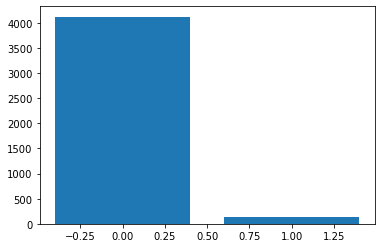

In [24]:
plt.bar(x = [0, 1], height = stroke_data.groupby('stroke')['stroke'].count())
plt.show()

In [25]:
import imblearn
from imblearn.over_sampling import SMOTE

In [26]:
y = stroke_data["stroke"]
y

0       1
1       1
2       1
3       1
4       1
       ..
4254    0
4255    0
4256    0
4257    0
4258    0
Name: stroke, Length: 4259, dtype: int64

In [27]:
col = "stroke"
x = stroke_data.loc[:, stroke_data.columns != col]
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_male,formerly_smoked,never_smoked,smokes
0,80.0,0,1,105.92,32.5,1,0,1,0
1,74.0,1,1,70.09,27.4,1,0,1,0
2,69.0,0,0,94.39,22.8,0,0,1,0
3,78.0,0,0,58.57,24.2,0,0,0,0
4,81.0,1,0,80.43,29.7,0,0,1,0


In [28]:
print("shape of x before SMOTE",x.shape)
print("shape of y before SMOTE",y.shape)

shape of x before SMOTE (4259, 9)
shape of y before SMOTE (4259,)


In [29]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [30]:
print("shape of x after SMOTE",x.shape)
print("shape of y after SMOTE",y.shape)

shape of x after SMOTE (8246, 9)
shape of y after SMOTE (8246,)


In [31]:
stroke_data_smote = pd.concat((x, y), axis = 1)
stroke_data_smote.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_male,formerly_smoked,never_smoked,smokes,stroke
0,80.0,0,1,105.92,32.5,1,0,1,0,1
1,74.0,1,1,70.09,27.4,1,0,1,0,1
2,69.0,0,0,94.39,22.8,0,0,1,0,1
3,78.0,0,0,58.57,24.2,0,0,0,0,1
4,81.0,1,0,80.43,29.7,0,0,1,0,1


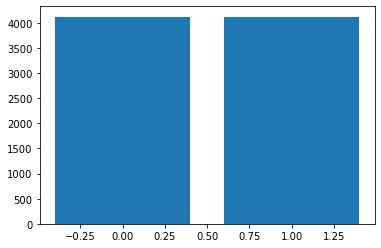

In [32]:
plt.bar(x = [0, 1], height = stroke_data_smote.groupby('stroke')['stroke'].count())
plt.show()

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [35]:
print(x_train.shape)
print(x_test.shape)

(6596, 9)
(1650, 9)


In [36]:
print(y_train.shape)
print(y_test.shape)

(6596,)
(1650,)


### Neural Network Model (using Keras)

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2022-07-12 17:33:26.621773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 17:33:26.621813: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [38]:
x.shape[1]

9

In [39]:
model = keras.Sequential(
    [
        # input layer
        keras.Input(shape= x.shape[1]),
        # first hidden layer
        layers.Dense(64, activation="relu"),
        # second hidden layer
        layers.Dense(128, activation="relu"),
        # output layer
        layers.Dense(1, activation="sigmoid")
    ]
)

model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 64)                640       


 dense_1 (Dense)             (None, 128)               8320      


 dense_2 (Dense)             (None, 1)                 129       


Total params: 9,089


Trainable params: 9,089


Non-trainable params: 0


_________________________________________________________________


2022-07-12 17:33:28.105193: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-12 17:33:28.105233: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-12 17:33:28.105253: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (32143d485a8e): /proc/driver/nvidia/version does not exist
2022-07-12 17:33:28.105485: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
# Arguments for defining the batch size and number of iterations (Epoch)
batch_size = 64
epochs = 30


# compiling the model (addition), providing the loss function, the optimizer and the metrics
model.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["accuracy"])

# training the neural network model
model.fit(x_train, y_train, batch_size= batch_size , epochs= epochs, validation_data =(x_test, y_test))

Epoch 1/30


  1/104 [..............................] - ETA: 44s - loss: 0.8182 - accuracy: 0.6406

 28/104 [=======>......................] - ETA: 0s - loss: 0.8181 - accuracy: 0.6574 

 53/104 [==============>...............] - ETA: 0s - loss: 0.6672 - accuracy: 0.7034

 81/104 [======================>.......] - ETA: 0s - loss: 0.6114 - accuracy: 0.7201

104/104 [==============================] - 1s 4ms/step - loss: 0.5877 - accuracy: 0.7251 - val_loss: 0.4921 - val_accuracy: 0.7527


Epoch 2/30


  1/104 [..............................] - ETA: 1s - loss: 0.4980 - accuracy: 0.7344

 26/104 [======>.......................] - ETA: 0s - loss: 0.4702 - accuracy: 0.7698

 50/104 [=============>................] - ETA: 0s - loss: 0.4682 - accuracy: 0.7684

 76/104 [====================>.........] - ETA: 0s - loss: 0.4674 - accuracy: 0.7681

102/104 [============================>.] - ETA: 0s - loss: 0.4620 - accuracy: 0.7724

104/104 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.7717 - val_loss: 0.4491 - val_accuracy: 0.7745


Epoch 3/30


  1/104 [..............................] - ETA: 0s - loss: 0.5196 - accuracy: 0.7344

 23/104 [=====>........................] - ETA: 0s - loss: 0.4648 - accuracy: 0.7711

 50/104 [=============>................] - ETA: 0s - loss: 0.4651 - accuracy: 0.7653

 66/104 [==================>...........] - ETA: 0s - loss: 0.4582 - accuracy: 0.7689

 88/104 [========================>.....] - ETA: 0s - loss: 0.4504 - accuracy: 0.7770

104/104 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.7738 - val_loss: 0.8108 - val_accuracy: 0.5836


Epoch 4/30


  1/104 [..............................] - ETA: 0s - loss: 0.6311 - accuracy: 0.6719

 14/104 [===>..........................] - ETA: 0s - loss: 0.5631 - accuracy: 0.7243

 31/104 [=======>......................] - ETA: 0s - loss: 0.5153 - accuracy: 0.7505

 46/104 [============>.................] - ETA: 0s - loss: 0.4974 - accuracy: 0.7571

 56/104 [===============>..............] - ETA: 0s - loss: 0.4885 - accuracy: 0.7626

 76/104 [====================>.........] - ETA: 0s - loss: 0.4667 - accuracy: 0.7728

 87/104 [========================>.....] - ETA: 0s - loss: 0.4607 - accuracy: 0.7748

 95/104 [==========================>...] - ETA: 0s - loss: 0.4573 - accuracy: 0.7765

104/104 [==============================] - 1s 6ms/step - loss: 0.4527 - accuracy: 0.7796 - val_loss: 0.3906 - val_accuracy: 0.8067


Epoch 5/30


  1/104 [..............................] - ETA: 0s - loss: 0.4771 - accuracy: 0.7500

 29/104 [=======>......................] - ETA: 0s - loss: 0.3970 - accuracy: 0.8093

 56/104 [===============>..............] - ETA: 0s - loss: 0.3912 - accuracy: 0.8170

 84/104 [=======================>......] - ETA: 0s - loss: 0.4071 - accuracy: 0.8080

104/104 [==============================] - 0s 3ms/step - loss: 0.4055 - accuracy: 0.8084 - val_loss: 0.4912 - val_accuracy: 0.7503


Epoch 6/30


  1/104 [..............................] - ETA: 0s - loss: 0.5120 - accuracy: 0.7656

 29/104 [=======>......................] - ETA: 0s - loss: 0.3929 - accuracy: 0.8093

 57/104 [===============>..............] - ETA: 0s - loss: 0.3896 - accuracy: 0.8128

 86/104 [=======================>......] - ETA: 0s - loss: 0.3898 - accuracy: 0.8140

104/104 [==============================] - 0s 3ms/step - loss: 0.3892 - accuracy: 0.8141 - val_loss: 0.5683 - val_accuracy: 0.6818


Epoch 7/30


  1/104 [..............................] - ETA: 0s - loss: 0.4659 - accuracy: 0.7656

 28/104 [=======>......................] - ETA: 0s - loss: 0.5464 - accuracy: 0.7517

 56/104 [===============>..............] - ETA: 0s - loss: 0.4877 - accuracy: 0.7782

 79/104 [=====================>........] - ETA: 0s - loss: 0.4724 - accuracy: 0.7844

 96/104 [==========================>...] - ETA: 0s - loss: 0.4566 - accuracy: 0.7909

104/104 [==============================] - 0s 3ms/step - loss: 0.4515 - accuracy: 0.7937 - val_loss: 0.3493 - val_accuracy: 0.8539


Epoch 8/30


  1/104 [..............................] - ETA: 0s - loss: 0.3252 - accuracy: 0.8594

 17/104 [===>..........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.8199

 38/104 [=========>....................] - ETA: 0s - loss: 0.3701 - accuracy: 0.8363

 64/104 [=================>............] - ETA: 0s - loss: 0.3708 - accuracy: 0.8342

 93/104 [=========================>....] - ETA: 0s - loss: 0.3789 - accuracy: 0.8256

104/104 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.8270 - val_loss: 0.3425 - val_accuracy: 0.8564


Epoch 9/30


  1/104 [..............................] - ETA: 0s - loss: 0.3161 - accuracy: 0.8281

 24/104 [=====>........................] - ETA: 0s - loss: 0.3632 - accuracy: 0.8366

 45/104 [===========>..................] - ETA: 0s - loss: 0.3627 - accuracy: 0.8358

 70/104 [===================>..........] - ETA: 0s - loss: 0.3620 - accuracy: 0.8375

 90/104 [========================>.....] - ETA: 0s - loss: 0.3654 - accuracy: 0.8368

104/104 [==============================] - 0s 3ms/step - loss: 0.3634 - accuracy: 0.8376 - val_loss: 0.3599 - val_accuracy: 0.8400


Epoch 10/30


  1/104 [..............................] - ETA: 0s - loss: 0.2707 - accuracy: 0.9062

 21/104 [=====>........................] - ETA: 0s - loss: 0.3850 - accuracy: 0.8222

 40/104 [==========>...................] - ETA: 0s - loss: 0.3618 - accuracy: 0.8301

 60/104 [================>.............] - ETA: 0s - loss: 0.3649 - accuracy: 0.8294

 79/104 [=====================>........] - ETA: 0s - loss: 0.3655 - accuracy: 0.8281

 95/104 [==========================>...] - ETA: 0s - loss: 0.3639 - accuracy: 0.8299

104/104 [==============================] - 0s 5ms/step - loss: 0.3639 - accuracy: 0.8305 - val_loss: 0.3377 - val_accuracy: 0.8539


Epoch 11/30


  1/104 [..............................] - ETA: 0s - loss: 0.3510 - accuracy: 0.8281

 12/104 [==>...........................] - ETA: 0s - loss: 0.3354 - accuracy: 0.8490

 38/104 [=========>....................] - ETA: 0s - loss: 0.3616 - accuracy: 0.8392

 67/104 [==================>...........] - ETA: 0s - loss: 0.3594 - accuracy: 0.8419

 99/104 [===========================>..] - ETA: 0s - loss: 0.3586 - accuracy: 0.8403

104/104 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.8391 - val_loss: 0.3733 - val_accuracy: 0.8436


Epoch 12/30


  1/104 [..............................] - ETA: 0s - loss: 0.4856 - accuracy: 0.7812

 27/104 [======>.......................] - ETA: 0s - loss: 0.3513 - accuracy: 0.8281

 55/104 [==============>...............] - ETA: 0s - loss: 0.3456 - accuracy: 0.8384

 84/104 [=======================>......] - ETA: 0s - loss: 0.3510 - accuracy: 0.8376

104/104 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8351 - val_loss: 0.3426 - val_accuracy: 0.8533


Epoch 13/30


  1/104 [..............................] - ETA: 0s - loss: 0.4167 - accuracy: 0.8281

 24/104 [=====>........................] - ETA: 0s - loss: 0.3815 - accuracy: 0.8327

 54/104 [==============>...............] - ETA: 0s - loss: 0.3602 - accuracy: 0.8400

 84/104 [=======================>......] - ETA: 0s - loss: 0.3599 - accuracy: 0.8415

104/104 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.8408 - val_loss: 0.3436 - val_accuracy: 0.8497


Epoch 14/30


  1/104 [..............................] - ETA: 0s - loss: 0.3260 - accuracy: 0.8750

 13/104 [==>...........................] - ETA: 0s - loss: 0.3441 - accuracy: 0.8474

 22/104 [=====>........................] - ETA: 0s - loss: 0.3398 - accuracy: 0.8501

 34/104 [========>.....................] - ETA: 0s - loss: 0.3401 - accuracy: 0.8456

 42/104 [===========>..................] - ETA: 0s - loss: 0.3427 - accuracy: 0.8423

 67/104 [==================>...........] - ETA: 0s - loss: 0.3733 - accuracy: 0.8288

 91/104 [=========================>....] - ETA: 0s - loss: 0.3817 - accuracy: 0.8285

104/104 [==============================] - 0s 4ms/step - loss: 0.3772 - accuracy: 0.8293 - val_loss: 0.3946 - val_accuracy: 0.8297


Epoch 15/30


  1/104 [..............................] - ETA: 0s - loss: 0.3142 - accuracy: 0.9062

 30/104 [=======>......................] - ETA: 0s - loss: 0.3495 - accuracy: 0.8443

 56/104 [===============>..............] - ETA: 0s - loss: 0.3409 - accuracy: 0.8504

 84/104 [=======================>......] - ETA: 0s - loss: 0.3445 - accuracy: 0.8464

104/104 [==============================] - 0s 3ms/step - loss: 0.3528 - accuracy: 0.8413 - val_loss: 0.3363 - val_accuracy: 0.8545


Epoch 16/30


  1/104 [..............................] - ETA: 0s - loss: 0.2793 - accuracy: 0.8281

 24/104 [=====>........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8503

 47/104 [============>.................] - ETA: 0s - loss: 0.3415 - accuracy: 0.8484

 76/104 [====================>.........] - ETA: 0s - loss: 0.3424 - accuracy: 0.8475

104/104 [==============================] - 0s 3ms/step - loss: 0.3407 - accuracy: 0.8496 - val_loss: 0.3215 - val_accuracy: 0.8612


Epoch 17/30


  1/104 [..............................] - ETA: 0s - loss: 0.2941 - accuracy: 0.8594

 27/104 [======>.......................] - ETA: 0s - loss: 0.3747 - accuracy: 0.8235

 55/104 [==============>...............] - ETA: 0s - loss: 0.3696 - accuracy: 0.8310

 85/104 [=======================>......] - ETA: 0s - loss: 0.3586 - accuracy: 0.8357

104/104 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.8388 - val_loss: 0.3634 - val_accuracy: 0.8455


Epoch 18/30


  1/104 [..............................] - ETA: 0s - loss: 0.3504 - accuracy: 0.8438

 29/104 [=======>......................] - ETA: 0s - loss: 0.3561 - accuracy: 0.8373

 57/104 [===============>..............] - ETA: 0s - loss: 0.3544 - accuracy: 0.8421

 86/104 [=======================>......] - ETA: 0s - loss: 0.3533 - accuracy: 0.8432

104/104 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8451 - val_loss: 0.3631 - val_accuracy: 0.8430


Epoch 19/30


  1/104 [..............................] - ETA: 0s - loss: 0.2549 - accuracy: 0.8750

 24/104 [=====>........................] - ETA: 0s - loss: 0.3651 - accuracy: 0.8333

 50/104 [=============>................] - ETA: 0s - loss: 0.3611 - accuracy: 0.8394

 75/104 [====================>.........] - ETA: 0s - loss: 0.3511 - accuracy: 0.8452

102/104 [============================>.] - ETA: 0s - loss: 0.3467 - accuracy: 0.8480

104/104 [==============================] - 0s 3ms/step - loss: 0.3472 - accuracy: 0.8479 - val_loss: 0.3169 - val_accuracy: 0.8691


Epoch 20/30


  1/104 [..............................] - ETA: 0s - loss: 0.3683 - accuracy: 0.8125

 26/104 [======>.......................] - ETA: 0s - loss: 0.3359 - accuracy: 0.8486

 55/104 [==============>...............] - ETA: 0s - loss: 0.3491 - accuracy: 0.8432

 85/104 [=======================>......] - ETA: 0s - loss: 0.3465 - accuracy: 0.8467

104/104 [==============================] - 0s 3ms/step - loss: 0.3497 - accuracy: 0.8446 - val_loss: 0.3826 - val_accuracy: 0.8097


Epoch 21/30


  1/104 [..............................] - ETA: 1s - loss: 0.3904 - accuracy: 0.8438

 11/104 [==>...........................] - ETA: 0s - loss: 0.3692 - accuracy: 0.8324

 20/104 [====>.........................] - ETA: 0s - loss: 0.3686 - accuracy: 0.8344

 41/104 [==========>...................] - ETA: 0s - loss: 0.3733 - accuracy: 0.8316

 68/104 [==================>...........] - ETA: 0s - loss: 0.3608 - accuracy: 0.8408

 93/104 [=========================>....] - ETA: 0s - loss: 0.3644 - accuracy: 0.8372

104/104 [==============================] - 0s 3ms/step - loss: 0.3631 - accuracy: 0.8382 - val_loss: 0.3249 - val_accuracy: 0.8558


Epoch 22/30


  1/104 [..............................] - ETA: 0s - loss: 0.3046 - accuracy: 0.7812

 27/104 [======>.......................] - ETA: 0s - loss: 0.3461 - accuracy: 0.8466

 56/104 [===============>..............] - ETA: 0s - loss: 0.3419 - accuracy: 0.8446

 85/104 [=======================>......] - ETA: 0s - loss: 0.3316 - accuracy: 0.8522

104/104 [==============================] - 0s 3ms/step - loss: 0.3351 - accuracy: 0.8525 - val_loss: 0.4011 - val_accuracy: 0.8176


Epoch 23/30


  1/104 [..............................] - ETA: 0s - loss: 0.3639 - accuracy: 0.8594

 27/104 [======>.......................] - ETA: 0s - loss: 0.3461 - accuracy: 0.8519

 57/104 [===============>..............] - ETA: 0s - loss: 0.3478 - accuracy: 0.8528

 84/104 [=======================>......] - ETA: 0s - loss: 0.3469 - accuracy: 0.8503

104/104 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8511 - val_loss: 0.4436 - val_accuracy: 0.8036


Epoch 24/30


  1/104 [..............................] - ETA: 0s - loss: 0.6059 - accuracy: 0.7656

 28/104 [=======>......................] - ETA: 0s - loss: 0.3670 - accuracy: 0.8393

 58/104 [===============>..............] - ETA: 0s - loss: 0.3526 - accuracy: 0.8464

 85/104 [=======================>......] - ETA: 0s - loss: 0.3493 - accuracy: 0.8487

104/104 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.8534 - val_loss: 0.5049 - val_accuracy: 0.7503


Epoch 25/30


  1/104 [..............................] - ETA: 0s - loss: 0.3502 - accuracy: 0.8125

 28/104 [=======>......................] - ETA: 0s - loss: 0.4199 - accuracy: 0.8036

 54/104 [==============>...............] - ETA: 0s - loss: 0.3943 - accuracy: 0.8174

 83/104 [======================>.......] - ETA: 0s - loss: 0.3669 - accuracy: 0.8345

104/104 [==============================] - 0s 3ms/step - loss: 0.3571 - accuracy: 0.8416 - val_loss: 0.3351 - val_accuracy: 0.8618


Epoch 26/30


  1/104 [..............................] - ETA: 0s - loss: 0.2834 - accuracy: 0.8750

 27/104 [======>.......................] - ETA: 0s - loss: 0.3492 - accuracy: 0.8547

 55/104 [==============>...............] - ETA: 0s - loss: 0.3431 - accuracy: 0.8571

 80/104 [======================>.......] - ETA: 0s - loss: 0.3362 - accuracy: 0.8613

104/104 [==============================] - ETA: 0s - loss: 0.3317 - accuracy: 0.8617

104/104 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8617 - val_loss: 0.3181 - val_accuracy: 0.8582


Epoch 27/30


  1/104 [..............................] - ETA: 0s - loss: 0.3967 - accuracy: 0.8125

 29/104 [=======>......................] - ETA: 0s - loss: 0.3164 - accuracy: 0.8605

 54/104 [==============>...............] - ETA: 0s - loss: 0.3280 - accuracy: 0.8576

 82/104 [======================>.......] - ETA: 0s - loss: 0.3342 - accuracy: 0.8559

104/104 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8532 - val_loss: 0.3305 - val_accuracy: 0.8606


Epoch 28/30


  1/104 [..............................] - ETA: 0s - loss: 0.3097 - accuracy: 0.8594

 25/104 [======>.......................] - ETA: 0s - loss: 0.3636 - accuracy: 0.8381

 56/104 [===============>..............] - ETA: 0s - loss: 0.3442 - accuracy: 0.8496

 70/104 [===================>..........] - ETA: 0s - loss: 0.3445 - accuracy: 0.8504

 94/104 [==========================>...] - ETA: 0s - loss: 0.3462 - accuracy: 0.8482

104/104 [==============================] - 0s 3ms/step - loss: 0.3466 - accuracy: 0.8481 - val_loss: 0.3119 - val_accuracy: 0.8697


Epoch 29/30


  1/104 [..............................] - ETA: 0s - loss: 0.4496 - accuracy: 0.8125

 25/104 [======>.......................] - ETA: 0s - loss: 0.3188 - accuracy: 0.8569

 45/104 [===========>..................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8597

 65/104 [=================>............] - ETA: 0s - loss: 0.3284 - accuracy: 0.8534

 81/104 [======================>.......] - ETA: 0s - loss: 0.3423 - accuracy: 0.8459

 94/104 [==========================>...] - ETA: 0s - loss: 0.3425 - accuracy: 0.8474

104/104 [==============================] - 0s 4ms/step - loss: 0.3436 - accuracy: 0.8472 - val_loss: 0.3968 - val_accuracy: 0.8152


Epoch 30/30


  1/104 [..............................] - ETA: 0s - loss: 0.2950 - accuracy: 0.8594

 22/104 [=====>........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8345

 46/104 [============>.................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8434

 73/104 [====================>.........] - ETA: 0s - loss: 0.3425 - accuracy: 0.8532

104/104 [==============================] - ETA: 0s - loss: 0.3382 - accuracy: 0.8542

104/104 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8542 - val_loss: 0.3127 - val_accuracy: 0.8709


In [41]:
## creating a function for neural network

def NeuralNet(BATCH_SIZE, EPOCH, ACTIVATION_FUNC): # mentioned hyperparameters here for the function
    model = keras.Sequential(
        [
            # input layer
            keras.Input(shape= x.shape[1]),
            # first hidden layer
            layers.Dense(64, activation=ACTIVATION_FUNC),
            # second hidden layer
            layers.Dense(128, activation=ACTIVATION_FUNC),
            # output layer
            layers.Dense(1, activation="sigmoid")
        ]
    )

    # compiling the model (addition), providing the loss function, the optimizer and the metrics
    model.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["accuracy"])

    # training the neural network model
    model.fit(x_train, y_train, batch_size= BATCH_SIZE , epochs= EPOCH, validation_data =(x_test, y_test))
    
    return model.history.history['accuracy'][-1], model.history.history['val_accuracy'][-1]

In [42]:
accComp = []

In [43]:
# copy this and rerun with different value
accComp.append(('first_params', NeuralNet(BATCH_SIZE = 64, EPOCH = 10, ACTIVATION_FUNC = 'relu')))

Epoch 1/10


  1/104 [..............................] - ETA: 36s - loss: 7.2740 - accuracy: 0.4688

 29/104 [=======>......................] - ETA: 0s - loss: 1.6093 - accuracy: 0.5700 

 55/104 [==============>...............] - ETA: 0s - loss: 1.1069 - accuracy: 0.6491

 77/104 [=====================>........] - ETA: 0s - loss: 0.9435 - accuracy: 0.6705

 98/104 [===========================>..] - ETA: 0s - loss: 0.8573 - accuracy: 0.6805

104/104 [==============================] - 1s 4ms/step - loss: 0.8421 - accuracy: 0.6818 - val_loss: 0.5478 - val_accuracy: 0.7327


Epoch 2/10


  1/104 [..............................] - ETA: 0s - loss: 0.6703 - accuracy: 0.7188

 23/104 [=====>........................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7154

 41/104 [==========>...................] - ETA: 0s - loss: 0.4955 - accuracy: 0.7439

 61/104 [================>.............] - ETA: 0s - loss: 0.4827 - accuracy: 0.7518

 74/104 [====================>.........] - ETA: 0s - loss: 0.4860 - accuracy: 0.7538

 91/104 [=========================>....] - ETA: 0s - loss: 0.4838 - accuracy: 0.7567

104/104 [==============================] - 0s 4ms/step - loss: 0.4857 - accuracy: 0.7568 - val_loss: 0.5284 - val_accuracy: 0.7224


Epoch 3/10


  1/104 [..............................] - ETA: 0s - loss: 0.5606 - accuracy: 0.7031

  7/104 [=>............................] - ETA: 0s - loss: 0.5686 - accuracy: 0.7054

 15/104 [===>..........................] - ETA: 0s - loss: 0.5083 - accuracy: 0.7542

 32/104 [========>.....................] - ETA: 0s - loss: 0.4974 - accuracy: 0.7603

 40/104 [==========>...................] - ETA: 0s - loss: 0.4897 - accuracy: 0.7707

 50/104 [=============>................] - ETA: 0s - loss: 0.4831 - accuracy: 0.7709

 60/104 [================>.............] - ETA: 0s - loss: 0.4836 - accuracy: 0.7669

 74/104 [====================>.........] - ETA: 0s - loss: 0.4759 - accuracy: 0.7715

 84/104 [=======================>......] - ETA: 0s - loss: 0.4721 - accuracy: 0.7727

 96/104 [==========================>...] - ETA: 0s - loss: 0.4731 - accuracy: 0.7723

104/104 [==============================] - 1s 7ms/step - loss: 0.4750 - accuracy: 0.7703 - val_loss: 0.4746 - val_accuracy: 0.7539


Epoch 4/10


  1/104 [..............................] - ETA: 0s - loss: 0.4202 - accuracy: 0.7969

 14/104 [===>..........................] - ETA: 0s - loss: 0.5013 - accuracy: 0.7467

 32/104 [========>.....................] - ETA: 0s - loss: 0.5189 - accuracy: 0.7295

 44/104 [===========>..................] - ETA: 0s - loss: 0.4861 - accuracy: 0.7567

 60/104 [================>.............] - ETA: 0s - loss: 0.4841 - accuracy: 0.7552

 73/104 [====================>.........] - ETA: 0s - loss: 0.4793 - accuracy: 0.7575

 86/104 [=======================>......] - ETA: 0s - loss: 0.4722 - accuracy: 0.7620

 99/104 [===========================>..] - ETA: 0s - loss: 0.4681 - accuracy: 0.7650

104/104 [==============================] - 0s 4ms/step - loss: 0.4656 - accuracy: 0.7668 - val_loss: 0.4625 - val_accuracy: 0.7739


Epoch 5/10


  1/104 [..............................] - ETA: 0s - loss: 0.4900 - accuracy: 0.7656

 20/104 [====>.........................] - ETA: 0s - loss: 0.4359 - accuracy: 0.7797

 39/104 [==========>...................] - ETA: 0s - loss: 0.4361 - accuracy: 0.7833

 56/104 [===============>..............] - ETA: 0s - loss: 0.4345 - accuracy: 0.7871

 85/104 [=======================>......] - ETA: 0s - loss: 0.4296 - accuracy: 0.7945

104/104 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.7947 - val_loss: 0.4150 - val_accuracy: 0.7988


Epoch 6/10


  1/104 [..............................] - ETA: 0s - loss: 0.4676 - accuracy: 0.7812

 29/104 [=======>......................] - ETA: 0s - loss: 0.4037 - accuracy: 0.8125

 55/104 [==============>...............] - ETA: 0s - loss: 0.3981 - accuracy: 0.8153

 82/104 [======================>.......] - ETA: 0s - loss: 0.4054 - accuracy: 0.8100

104/104 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8070 - val_loss: 0.4267 - val_accuracy: 0.7873


Epoch 7/10


  1/104 [..............................] - ETA: 0s - loss: 0.4492 - accuracy: 0.7812

 25/104 [======>.......................] - ETA: 0s - loss: 0.4873 - accuracy: 0.7675

 42/104 [===========>..................] - ETA: 0s - loss: 0.4673 - accuracy: 0.7835

 57/104 [===============>..............] - ETA: 0s - loss: 0.4478 - accuracy: 0.7947

 76/104 [====================>.........] - ETA: 0s - loss: 0.4354 - accuracy: 0.8014

 98/104 [===========================>..] - ETA: 0s - loss: 0.4200 - accuracy: 0.8068

104/104 [==============================] - 0s 4ms/step - loss: 0.4174 - accuracy: 0.8088 - val_loss: 0.3944 - val_accuracy: 0.8091


Epoch 8/10


  1/104 [..............................] - ETA: 0s - loss: 0.4195 - accuracy: 0.7969

 21/104 [=====>........................] - ETA: 0s - loss: 0.3868 - accuracy: 0.8110

 40/104 [==========>...................] - ETA: 0s - loss: 0.3708 - accuracy: 0.8195

 64/104 [=================>............] - ETA: 0s - loss: 0.3644 - accuracy: 0.8247

 91/104 [=========================>....] - ETA: 0s - loss: 0.3730 - accuracy: 0.8240

104/104 [==============================] - 0s 3ms/step - loss: 0.3707 - accuracy: 0.8293 - val_loss: 0.3876 - val_accuracy: 0.8176


Epoch 9/10


  1/104 [..............................] - ETA: 0s - loss: 0.4144 - accuracy: 0.7656

 27/104 [======>.......................] - ETA: 0s - loss: 0.4045 - accuracy: 0.8148

 51/104 [=============>................] - ETA: 0s - loss: 0.3865 - accuracy: 0.8241

 81/104 [======================>.......] - ETA: 0s - loss: 0.3741 - accuracy: 0.8270

104/104 [==============================] - 0s 3ms/step - loss: 0.3745 - accuracy: 0.8281 - val_loss: 0.4167 - val_accuracy: 0.8030


Epoch 10/10


  1/104 [..............................] - ETA: 0s - loss: 0.4763 - accuracy: 0.7812

 28/104 [=======>......................] - ETA: 0s - loss: 0.4324 - accuracy: 0.7980

 56/104 [===============>..............] - ETA: 0s - loss: 0.4077 - accuracy: 0.8122

 84/104 [=======================>......] - ETA: 0s - loss: 0.3878 - accuracy: 0.8240

104/104 [==============================] - 0s 3ms/step - loss: 0.3793 - accuracy: 0.8269 - val_loss: 0.3862 - val_accuracy: 0.8200


In [44]:
### activation_function = 'relu', 'selu', 'softmax'
### epoch - 10, 15, 30
### batch size = 32, 64, 128

In [45]:
accComp.append(('second_params', NeuralNet(BATCH_SIZE = 64, EPOCH = 30, ACTIVATION_FUNC = 'selu')))

Epoch 1/30


  1/104 [..............................] - ETA: 41s - loss: 1.3757 - accuracy: 0.4531

 18/104 [====>.........................] - ETA: 0s - loss: 1.1381 - accuracy: 0.6172 

 42/104 [===========>..................] - ETA: 0s - loss: 0.7937 - accuracy: 0.6871

 70/104 [===================>..........] - ETA: 0s - loss: 0.6604 - accuracy: 0.7217

101/104 [============================>.] - ETA: 0s - loss: 0.5987 - accuracy: 0.7416

104/104 [==============================] - 1s 4ms/step - loss: 0.5975 - accuracy: 0.7423 - val_loss: 0.5319 - val_accuracy: 0.7630


Epoch 2/30


  1/104 [..............................] - ETA: 0s - loss: 0.6151 - accuracy: 0.7500

 26/104 [======>.......................] - ETA: 0s - loss: 0.5502 - accuracy: 0.7530

 53/104 [==============>...............] - ETA: 0s - loss: 0.5092 - accuracy: 0.7591

 82/104 [======================>.......] - ETA: 0s - loss: 0.4947 - accuracy: 0.7624

104/104 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7686 - val_loss: 0.4169 - val_accuracy: 0.7982


Epoch 3/30


  1/104 [..............................] - ETA: 0s - loss: 0.3830 - accuracy: 0.8125

 28/104 [=======>......................] - ETA: 0s - loss: 0.4153 - accuracy: 0.8058

 53/104 [==============>...............] - ETA: 0s - loss: 0.4174 - accuracy: 0.8007

 79/104 [=====================>........] - ETA: 0s - loss: 0.4131 - accuracy: 0.8020

104/104 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.7999 - val_loss: 0.4158 - val_accuracy: 0.8073


Epoch 4/30


  1/104 [..............................] - ETA: 0s - loss: 0.2927 - accuracy: 0.9219

 26/104 [======>.......................] - ETA: 0s - loss: 0.4539 - accuracy: 0.7945

 53/104 [==============>...............] - ETA: 0s - loss: 0.4709 - accuracy: 0.7812

 80/104 [======================>.......] - ETA: 0s - loss: 0.4557 - accuracy: 0.7885

104/104 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.7937 - val_loss: 0.4326 - val_accuracy: 0.7982


Epoch 5/30


  1/104 [..............................] - ETA: 1s - loss: 0.3787 - accuracy: 0.8594

  8/104 [=>............................] - ETA: 0s - loss: 0.4247 - accuracy: 0.8145

 17/104 [===>..........................] - ETA: 0s - loss: 0.3915 - accuracy: 0.8309

 34/104 [========>.....................] - ETA: 0s - loss: 0.3801 - accuracy: 0.8309

 62/104 [================>.............] - ETA: 0s - loss: 0.3805 - accuracy: 0.8276

 87/104 [========================>.....] - ETA: 0s - loss: 0.3898 - accuracy: 0.8222

104/104 [==============================] - 0s 4ms/step - loss: 0.4065 - accuracy: 0.8149 - val_loss: 0.5860 - val_accuracy: 0.7012


Epoch 6/30


  1/104 [..............................] - ETA: 0s - loss: 0.5602 - accuracy: 0.6562

 28/104 [=======>......................] - ETA: 0s - loss: 0.4903 - accuracy: 0.7801

 54/104 [==============>...............] - ETA: 0s - loss: 0.4531 - accuracy: 0.7922

 82/104 [======================>.......] - ETA: 0s - loss: 0.4330 - accuracy: 0.8007

104/104 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8084 - val_loss: 0.3736 - val_accuracy: 0.8376


Epoch 7/30


  1/104 [..............................] - ETA: 0s - loss: 0.2947 - accuracy: 0.9062

 26/104 [======>.......................] - ETA: 0s - loss: 0.3792 - accuracy: 0.8281

 54/104 [==============>...............] - ETA: 0s - loss: 0.3653 - accuracy: 0.8336

 85/104 [=======================>......] - ETA: 0s - loss: 0.3761 - accuracy: 0.8281

104/104 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8235 - val_loss: 0.3304 - val_accuracy: 0.8588


Epoch 8/30


  1/104 [..............................] - ETA: 0s - loss: 0.2942 - accuracy: 0.8906

 26/104 [======>.......................] - ETA: 0s - loss: 0.3880 - accuracy: 0.8251

 54/104 [==============>...............] - ETA: 0s - loss: 0.3607 - accuracy: 0.8354

 81/104 [======================>.......] - ETA: 0s - loss: 0.3644 - accuracy: 0.8360

104/104 [==============================] - 0s 3ms/step - loss: 0.3724 - accuracy: 0.8297 - val_loss: 0.6167 - val_accuracy: 0.6891


Epoch 9/30


  1/104 [..............................] - ETA: 0s - loss: 0.6151 - accuracy: 0.6562

 27/104 [======>.......................] - ETA: 0s - loss: 0.4722 - accuracy: 0.7859

 52/104 [==============>...............] - ETA: 0s - loss: 0.4500 - accuracy: 0.7987

 82/104 [======================>.......] - ETA: 0s - loss: 0.4200 - accuracy: 0.8098

104/104 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8149 - val_loss: 0.3306 - val_accuracy: 0.8588


Epoch 10/30


  1/104 [..............................] - ETA: 1s - loss: 0.3018 - accuracy: 0.9062

 31/104 [=======>......................] - ETA: 0s - loss: 0.3193 - accuracy: 0.8589

 59/104 [================>.............] - ETA: 0s - loss: 0.3300 - accuracy: 0.8538

 89/104 [========================>.....] - ETA: 0s - loss: 0.3377 - accuracy: 0.8536

104/104 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.8492 - val_loss: 0.3525 - val_accuracy: 0.8527


Epoch 11/30


  1/104 [..............................] - ETA: 0s - loss: 0.3982 - accuracy: 0.7969

 23/104 [=====>........................] - ETA: 0s - loss: 0.4243 - accuracy: 0.8023

 52/104 [==============>...............] - ETA: 0s - loss: 0.4068 - accuracy: 0.8137

 82/104 [======================>.......] - ETA: 0s - loss: 0.3770 - accuracy: 0.8293

104/104 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8337 - val_loss: 0.3697 - val_accuracy: 0.8442


Epoch 12/30


  1/104 [..............................] - ETA: 1s - loss: 0.3156 - accuracy: 0.9062

 29/104 [=======>......................] - ETA: 0s - loss: 0.3776 - accuracy: 0.8324

 57/104 [===============>..............] - ETA: 0s - loss: 0.3597 - accuracy: 0.8388

 82/104 [======================>.......] - ETA: 0s - loss: 0.3600 - accuracy: 0.8420

104/104 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8472 - val_loss: 0.3213 - val_accuracy: 0.8636


Epoch 13/30


  1/104 [..............................] - ETA: 0s - loss: 0.3714 - accuracy: 0.8438

 28/104 [=======>......................] - ETA: 0s - loss: 0.3256 - accuracy: 0.8577

 56/104 [===============>..............] - ETA: 0s - loss: 0.3296 - accuracy: 0.8569

 86/104 [=======================>......] - ETA: 0s - loss: 0.3472 - accuracy: 0.8492

104/104 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8426 - val_loss: 0.4404 - val_accuracy: 0.8230


Epoch 14/30


  1/104 [..............................] - ETA: 0s - loss: 0.4463 - accuracy: 0.7969

 27/104 [======>.......................] - ETA: 0s - loss: 0.3364 - accuracy: 0.8623

 51/104 [=============>................] - ETA: 0s - loss: 0.3441 - accuracy: 0.8557

 78/104 [=====================>........] - ETA: 0s - loss: 0.3418 - accuracy: 0.8566

103/104 [============================>.] - ETA: 0s - loss: 0.3619 - accuracy: 0.8465

104/104 [==============================] - 0s 3ms/step - loss: 0.3617 - accuracy: 0.8466 - val_loss: 0.3142 - val_accuracy: 0.8727


Epoch 15/30


  1/104 [..............................] - ETA: 0s - loss: 0.3601 - accuracy: 0.8750

 26/104 [======>.......................] - ETA: 0s - loss: 0.3341 - accuracy: 0.8594

 53/104 [==============>...............] - ETA: 0s - loss: 0.3786 - accuracy: 0.8381

 82/104 [======================>.......] - ETA: 0s - loss: 0.3658 - accuracy: 0.8413

104/104 [==============================] - 0s 3ms/step - loss: 0.3623 - accuracy: 0.8437 - val_loss: 0.3253 - val_accuracy: 0.8539


Epoch 16/30


  1/104 [..............................] - ETA: 0s - loss: 0.2313 - accuracy: 0.8906

 25/104 [======>.......................] - ETA: 0s - loss: 0.3876 - accuracy: 0.8338

 52/104 [==============>...............] - ETA: 0s - loss: 0.3629 - accuracy: 0.8444

 81/104 [======================>.......] - ETA: 0s - loss: 0.3578 - accuracy: 0.8476

104/104 [==============================] - 0s 3ms/step - loss: 0.3528 - accuracy: 0.8464 - val_loss: 0.3476 - val_accuracy: 0.8485


Epoch 17/30


  1/104 [..............................] - ETA: 0s - loss: 0.3347 - accuracy: 0.8438

 30/104 [=======>......................] - ETA: 0s - loss: 0.4633 - accuracy: 0.8031

 59/104 [================>.............] - ETA: 0s - loss: 0.3986 - accuracy: 0.8265

 84/104 [=======================>......] - ETA: 0s - loss: 0.3766 - accuracy: 0.8382

104/104 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8405 - val_loss: 0.3438 - val_accuracy: 0.8594


Epoch 18/30


  1/104 [..............................] - ETA: 0s - loss: 0.2914 - accuracy: 0.8594

 28/104 [=======>......................] - ETA: 0s - loss: 0.3969 - accuracy: 0.8242

 52/104 [==============>...............] - ETA: 0s - loss: 0.3707 - accuracy: 0.8365

 79/104 [=====================>........] - ETA: 0s - loss: 0.3598 - accuracy: 0.8410

104/104 [==============================] - 0s 3ms/step - loss: 0.3533 - accuracy: 0.8452 - val_loss: 0.3726 - val_accuracy: 0.8248


Epoch 19/30


  1/104 [..............................] - ETA: 0s - loss: 0.3530 - accuracy: 0.8438

 27/104 [======>.......................] - ETA: 0s - loss: 0.3367 - accuracy: 0.8478

 56/104 [===============>..............] - ETA: 0s - loss: 0.3511 - accuracy: 0.8449

 84/104 [=======================>......] - ETA: 0s - loss: 0.3551 - accuracy: 0.8417

104/104 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8461 - val_loss: 0.3460 - val_accuracy: 0.8570


Epoch 20/30


  1/104 [..............................] - ETA: 0s - loss: 0.3432 - accuracy: 0.8281

 29/104 [=======>......................] - ETA: 0s - loss: 0.3620 - accuracy: 0.8281

 50/104 [=============>................] - ETA: 0s - loss: 0.3486 - accuracy: 0.8425

 75/104 [====================>.........] - ETA: 0s - loss: 0.3389 - accuracy: 0.8500

 90/104 [========================>.....] - ETA: 0s - loss: 0.3403 - accuracy: 0.8493

104/104 [==============================] - 0s 3ms/step - loss: 0.3393 - accuracy: 0.8496 - val_loss: 0.5869 - val_accuracy: 0.7055


Epoch 21/30


  1/104 [..............................] - ETA: 0s - loss: 0.6832 - accuracy: 0.6562

 27/104 [======>.......................] - ETA: 0s - loss: 0.3685 - accuracy: 0.8409

 53/104 [==============>...............] - ETA: 0s - loss: 0.3430 - accuracy: 0.8520

 83/104 [======================>.......] - ETA: 0s - loss: 0.3388 - accuracy: 0.8515

104/104 [==============================] - 0s 3ms/step - loss: 0.3355 - accuracy: 0.8534 - val_loss: 0.3818 - val_accuracy: 0.8176


Epoch 22/30


  1/104 [..............................] - ETA: 0s - loss: 0.4789 - accuracy: 0.7969

 28/104 [=======>......................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8516

 50/104 [=============>................] - ETA: 0s - loss: 0.3294 - accuracy: 0.8597

 77/104 [=====================>........] - ETA: 0s - loss: 0.3298 - accuracy: 0.8596

104/104 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8576 - val_loss: 0.3096 - val_accuracy: 0.8739


Epoch 23/30


  1/104 [..............................] - ETA: 0s - loss: 0.2094 - accuracy: 0.9375

 27/104 [======>.......................] - ETA: 0s - loss: 0.3230 - accuracy: 0.8646

 54/104 [==============>...............] - ETA: 0s - loss: 0.3239 - accuracy: 0.8637

 80/104 [======================>.......] - ETA: 0s - loss: 0.3288 - accuracy: 0.8609

104/104 [==============================] - 0s 3ms/step - loss: 0.3253 - accuracy: 0.8636 - val_loss: 0.3270 - val_accuracy: 0.8552


Epoch 24/30


  1/104 [..............................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8906

 23/104 [=====>........................] - ETA: 0s - loss: 0.3568 - accuracy: 0.8539

 51/104 [=============>................] - ETA: 0s - loss: 0.3427 - accuracy: 0.8508

 80/104 [======================>.......] - ETA: 0s - loss: 0.3340 - accuracy: 0.8545

104/104 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8592 - val_loss: 0.3848 - val_accuracy: 0.8158


Epoch 25/30


  1/104 [..............................] - ETA: 0s - loss: 0.4114 - accuracy: 0.7812

 24/104 [=====>........................] - ETA: 0s - loss: 0.3859 - accuracy: 0.8249

 51/104 [=============>................] - ETA: 0s - loss: 0.4068 - accuracy: 0.8202

 76/104 [====================>.........] - ETA: 0s - loss: 0.4006 - accuracy: 0.8226

104/104 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8307 - val_loss: 0.3180 - val_accuracy: 0.8618


Epoch 26/30


  1/104 [..............................] - ETA: 0s - loss: 0.1953 - accuracy: 0.9219

 27/104 [======>.......................] - ETA: 0s - loss: 0.3240 - accuracy: 0.8657

 56/104 [===============>..............] - ETA: 0s - loss: 0.3166 - accuracy: 0.8669

 84/104 [=======================>......] - ETA: 0s - loss: 0.3151 - accuracy: 0.8659

104/104 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8648 - val_loss: 0.3220 - val_accuracy: 0.8691


Epoch 27/30


  1/104 [..............................] - ETA: 0s - loss: 0.3287 - accuracy: 0.8750

 28/104 [=======>......................] - ETA: 0s - loss: 0.3282 - accuracy: 0.8588

 52/104 [==============>...............] - ETA: 0s - loss: 0.3188 - accuracy: 0.8666

 80/104 [======================>.......] - ETA: 0s - loss: 0.3180 - accuracy: 0.8639

104/104 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8551 - val_loss: 0.3381 - val_accuracy: 0.8570


Epoch 28/30


  1/104 [..............................] - ETA: 1s - loss: 0.4210 - accuracy: 0.8125

 28/104 [=======>......................] - ETA: 0s - loss: 0.3376 - accuracy: 0.8516

 56/104 [===============>..............] - ETA: 0s - loss: 0.3371 - accuracy: 0.8538

 81/104 [======================>.......] - ETA: 0s - loss: 0.3358 - accuracy: 0.8547

104/104 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8499 - val_loss: 0.5943 - val_accuracy: 0.7879


Epoch 29/30


  1/104 [..............................] - ETA: 0s - loss: 0.8548 - accuracy: 0.7344

 29/104 [=======>......................] - ETA: 0s - loss: 0.3617 - accuracy: 0.8427

 51/104 [=============>................] - ETA: 0s - loss: 0.3566 - accuracy: 0.8425

 75/104 [====================>.........] - ETA: 0s - loss: 0.3466 - accuracy: 0.8475

102/104 [============================>.] - ETA: 0s - loss: 0.3418 - accuracy: 0.8522

104/104 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8523 - val_loss: 0.3221 - val_accuracy: 0.8618


Epoch 30/30


  1/104 [..............................] - ETA: 0s - loss: 0.3370 - accuracy: 0.8281

 29/104 [=======>......................] - ETA: 0s - loss: 0.3465 - accuracy: 0.8464

 56/104 [===============>..............] - ETA: 0s - loss: 0.3288 - accuracy: 0.8594

 82/104 [======================>.......] - ETA: 0s - loss: 0.3273 - accuracy: 0.8586

104/104 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8620 - val_loss: 0.3204 - val_accuracy: 0.8661


In [46]:
accComp.append(('third_params', NeuralNet(BATCH_SIZE = 64, EPOCH = 30, ACTIVATION_FUNC = 'relu')))

Epoch 1/30


  1/104 [..............................] - ETA: 37s - loss: 4.7192 - accuracy: 0.3750

 29/104 [=======>......................] - ETA: 0s - loss: 1.0888 - accuracy: 0.6363 

 56/104 [===============>..............] - ETA: 0s - loss: 0.8306 - accuracy: 0.6786

 88/104 [========================>.....] - ETA: 0s - loss: 0.7168 - accuracy: 0.6999

104/104 [==============================] - 1s 3ms/step - loss: 0.6860 - accuracy: 0.7062 - val_loss: 0.4894 - val_accuracy: 0.7594


Epoch 2/30


  1/104 [..............................] - ETA: 0s - loss: 0.5802 - accuracy: 0.6406

 31/104 [=======>......................] - ETA: 0s - loss: 0.4891 - accuracy: 0.7560

 62/104 [================>.............] - ETA: 0s - loss: 0.4839 - accuracy: 0.7603

 91/104 [=========================>....] - ETA: 0s - loss: 0.4900 - accuracy: 0.7509

104/104 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7529 - val_loss: 0.5121 - val_accuracy: 0.7448


Epoch 3/30


  1/104 [..............................] - ETA: 0s - loss: 0.3808 - accuracy: 0.8438

 26/104 [======>.......................] - ETA: 0s - loss: 0.4605 - accuracy: 0.7776

 44/104 [===========>..................] - ETA: 0s - loss: 0.4609 - accuracy: 0.7734

 63/104 [=================>............] - ETA: 0s - loss: 0.4620 - accuracy: 0.7733

 83/104 [======================>.......] - ETA: 0s - loss: 0.4645 - accuracy: 0.7705

104/104 [==============================] - 0s 3ms/step - loss: 0.4655 - accuracy: 0.7676 - val_loss: 0.7088 - val_accuracy: 0.7024


Epoch 4/30


  1/104 [..............................] - ETA: 0s - loss: 0.7650 - accuracy: 0.6875

 29/104 [=======>......................] - ETA: 0s - loss: 0.5421 - accuracy: 0.7177

 53/104 [==============>...............] - ETA: 0s - loss: 0.5256 - accuracy: 0.7373

 80/104 [======================>.......] - ETA: 0s - loss: 0.4947 - accuracy: 0.7563

104/104 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7658 - val_loss: 0.4143 - val_accuracy: 0.8109


Epoch 5/30


  1/104 [..............................] - ETA: 0s - loss: 0.3837 - accuracy: 0.8281

 23/104 [=====>........................] - ETA: 0s - loss: 0.4294 - accuracy: 0.7942

 46/104 [============>.................] - ETA: 0s - loss: 0.4146 - accuracy: 0.8026

 68/104 [==================>...........] - ETA: 0s - loss: 0.4168 - accuracy: 0.8019

 96/104 [==========================>...] - ETA: 0s - loss: 0.4110 - accuracy: 0.8047

104/104 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8043 - val_loss: 0.4494 - val_accuracy: 0.7739


Epoch 6/30


  1/104 [..............................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8594

 32/104 [========>.....................] - ETA: 0s - loss: 0.4110 - accuracy: 0.8135

 49/104 [=============>................] - ETA: 0s - loss: 0.4107 - accuracy: 0.8087

 70/104 [===================>..........] - ETA: 0s - loss: 0.4110 - accuracy: 0.8094

 97/104 [==========================>...] - ETA: 0s - loss: 0.4029 - accuracy: 0.8143

104/104 [==============================] - 0s 3ms/step - loss: 0.4047 - accuracy: 0.8125 - val_loss: 0.4039 - val_accuracy: 0.8085


Epoch 7/30


  1/104 [..............................] - ETA: 0s - loss: 0.3631 - accuracy: 0.8125

 28/104 [=======>......................] - ETA: 0s - loss: 0.4307 - accuracy: 0.8080

 58/104 [===============>..............] - ETA: 0s - loss: 0.4025 - accuracy: 0.8179

 87/104 [========================>.....] - ETA: 0s - loss: 0.3966 - accuracy: 0.8195

104/104 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8216 - val_loss: 0.3638 - val_accuracy: 0.8473


Epoch 8/30


  1/104 [..............................] - ETA: 0s - loss: 0.3463 - accuracy: 0.8906

 30/104 [=======>......................] - ETA: 0s - loss: 0.3691 - accuracy: 0.8307

 57/104 [===============>..............] - ETA: 0s - loss: 0.3695 - accuracy: 0.8309

 84/104 [=======================>......] - ETA: 0s - loss: 0.3651 - accuracy: 0.8341

104/104 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8370 - val_loss: 0.3679 - val_accuracy: 0.8388


Epoch 9/30


  1/104 [..............................] - ETA: 0s - loss: 0.3855 - accuracy: 0.8438

 21/104 [=====>........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.8281

 48/104 [============>.................] - ETA: 0s - loss: 0.3712 - accuracy: 0.8337

 74/104 [====================>.........] - ETA: 0s - loss: 0.3610 - accuracy: 0.8378

102/104 [============================>.] - ETA: 0s - loss: 0.3649 - accuracy: 0.8344

104/104 [==============================] - 0s 3ms/step - loss: 0.3650 - accuracy: 0.8341 - val_loss: 0.4579 - val_accuracy: 0.7842


Epoch 10/30


  1/104 [..............................] - ETA: 0s - loss: 0.4087 - accuracy: 0.7969

 27/104 [======>.......................] - ETA: 0s - loss: 0.3995 - accuracy: 0.8154

 57/104 [===============>..............] - ETA: 0s - loss: 0.3838 - accuracy: 0.8207

 84/104 [=======================>......] - ETA: 0s - loss: 0.3876 - accuracy: 0.8222

104/104 [==============================] - 0s 3ms/step - loss: 0.3831 - accuracy: 0.8243 - val_loss: 0.3981 - val_accuracy: 0.8218


Epoch 11/30


  1/104 [..............................] - ETA: 0s - loss: 0.3707 - accuracy: 0.8281

 30/104 [=======>......................] - ETA: 0s - loss: 0.3929 - accuracy: 0.8167

 55/104 [==============>...............] - ETA: 0s - loss: 0.3725 - accuracy: 0.8281

 83/104 [======================>.......] - ETA: 0s - loss: 0.3649 - accuracy: 0.8353

104/104 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.8319 - val_loss: 0.3365 - val_accuracy: 0.8588


Epoch 12/30


  1/104 [..............................] - ETA: 0s - loss: 0.2868 - accuracy: 0.8438

 29/104 [=======>......................] - ETA: 0s - loss: 0.3615 - accuracy: 0.8297

 59/104 [================>.............] - ETA: 0s - loss: 0.3474 - accuracy: 0.8403

 88/104 [========================>.....] - ETA: 0s - loss: 0.3527 - accuracy: 0.8418

104/104 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.8419 - val_loss: 0.3390 - val_accuracy: 0.8545


Epoch 13/30


  1/104 [..............................] - ETA: 0s - loss: 0.3689 - accuracy: 0.8438

 28/104 [=======>......................] - ETA: 0s - loss: 0.3817 - accuracy: 0.8387

 58/104 [===============>..............] - ETA: 0s - loss: 0.3579 - accuracy: 0.8427

 91/104 [=========================>....] - ETA: 0s - loss: 0.3539 - accuracy: 0.8432

104/104 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8417 - val_loss: 0.4438 - val_accuracy: 0.7861


Epoch 14/30


  1/104 [..............................] - ETA: 0s - loss: 0.3579 - accuracy: 0.8594

 25/104 [======>.......................] - ETA: 0s - loss: 0.3525 - accuracy: 0.8388

 55/104 [==============>...............] - ETA: 0s - loss: 0.3538 - accuracy: 0.8392

 85/104 [=======================>......] - ETA: 0s - loss: 0.3555 - accuracy: 0.8388

104/104 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8396 - val_loss: 0.4198 - val_accuracy: 0.8109


Epoch 15/30


  1/104 [..............................] - ETA: 0s - loss: 0.3938 - accuracy: 0.8125

 28/104 [=======>......................] - ETA: 0s - loss: 0.3824 - accuracy: 0.8242

 58/104 [===============>..............] - ETA: 0s - loss: 0.3630 - accuracy: 0.8327

 88/104 [========================>.....] - ETA: 0s - loss: 0.3562 - accuracy: 0.8384

104/104 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8384 - val_loss: 0.5872 - val_accuracy: 0.7236


Epoch 16/30


  1/104 [..............................] - ETA: 0s - loss: 0.4768 - accuracy: 0.7656

 22/104 [=====>........................] - ETA: 0s - loss: 0.4004 - accuracy: 0.8253

 48/104 [============>.................] - ETA: 0s - loss: 0.3713 - accuracy: 0.8395

 77/104 [=====================>........] - ETA: 0s - loss: 0.3618 - accuracy: 0.8381

 99/104 [===========================>..] - ETA: 0s - loss: 0.3607 - accuracy: 0.8392

104/104 [==============================] - 0s 3ms/step - loss: 0.3604 - accuracy: 0.8398 - val_loss: 0.3319 - val_accuracy: 0.8570


Epoch 17/30


  1/104 [..............................] - ETA: 0s - loss: 0.2878 - accuracy: 0.9062

 27/104 [======>.......................] - ETA: 0s - loss: 0.3598 - accuracy: 0.8380

 56/104 [===============>..............] - ETA: 0s - loss: 0.3524 - accuracy: 0.8407

 86/104 [=======================>......] - ETA: 0s - loss: 0.3404 - accuracy: 0.8468

104/104 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.8470 - val_loss: 0.3725 - val_accuracy: 0.8358


Epoch 18/30


  1/104 [..............................] - ETA: 0s - loss: 0.3093 - accuracy: 0.7969

 26/104 [======>.......................] - ETA: 0s - loss: 0.3330 - accuracy: 0.8516

 56/104 [===============>..............] - ETA: 0s - loss: 0.3442 - accuracy: 0.8460

 76/104 [====================>.........] - ETA: 0s - loss: 0.3481 - accuracy: 0.8419

102/104 [============================>.] - ETA: 0s - loss: 0.3438 - accuracy: 0.8467

104/104 [==============================] - 0s 3ms/step - loss: 0.3446 - accuracy: 0.8464 - val_loss: 0.3357 - val_accuracy: 0.8461


Epoch 19/30


  1/104 [..............................] - ETA: 0s - loss: 0.3766 - accuracy: 0.7969

 28/104 [=======>......................] - ETA: 0s - loss: 0.3518 - accuracy: 0.8510

 58/104 [===============>..............] - ETA: 0s - loss: 0.3526 - accuracy: 0.8429

 78/104 [=====================>........] - ETA: 0s - loss: 0.3411 - accuracy: 0.8510

104/104 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8528 - val_loss: 0.3357 - val_accuracy: 0.8552


Epoch 20/30


  1/104 [..............................] - ETA: 0s - loss: 0.3635 - accuracy: 0.7656

 20/104 [====>.........................] - ETA: 0s - loss: 0.3430 - accuracy: 0.8383

 35/104 [=========>....................] - ETA: 0s - loss: 0.3357 - accuracy: 0.8464

 60/104 [================>.............] - ETA: 0s - loss: 0.3412 - accuracy: 0.8453

 89/104 [========================>.....] - ETA: 0s - loss: 0.3433 - accuracy: 0.8446

104/104 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.8452 - val_loss: 0.5320 - val_accuracy: 0.7327


Epoch 21/30


  1/104 [..............................] - ETA: 0s - loss: 0.4637 - accuracy: 0.7656

 27/104 [======>.......................] - ETA: 0s - loss: 0.3986 - accuracy: 0.8212

 58/104 [===============>..............] - ETA: 0s - loss: 0.3704 - accuracy: 0.8314

 83/104 [======================>.......] - ETA: 0s - loss: 0.3578 - accuracy: 0.8400

104/104 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8398 - val_loss: 0.3440 - val_accuracy: 0.8539


Epoch 22/30


  1/104 [..............................] - ETA: 0s - loss: 0.3686 - accuracy: 0.8438

 23/104 [=====>........................] - ETA: 0s - loss: 0.3715 - accuracy: 0.8213

 50/104 [=============>................] - ETA: 0s - loss: 0.3632 - accuracy: 0.8313

 78/104 [=====================>........] - ETA: 0s - loss: 0.3692 - accuracy: 0.8287

104/104 [==============================] - ETA: 0s - loss: 0.3633 - accuracy: 0.8357

104/104 [==============================] - 0s 3ms/step - loss: 0.3633 - accuracy: 0.8357 - val_loss: 0.3424 - val_accuracy: 0.8545


Epoch 23/30


  1/104 [..............................] - ETA: 0s - loss: 0.2758 - accuracy: 0.8750

 26/104 [======>.......................] - ETA: 0s - loss: 0.3551 - accuracy: 0.8395

 51/104 [=============>................] - ETA: 0s - loss: 0.3401 - accuracy: 0.8526

 79/104 [=====================>........] - ETA: 0s - loss: 0.3396 - accuracy: 0.8489

104/104 [==============================] - 0s 3ms/step - loss: 0.3410 - accuracy: 0.8487 - val_loss: 0.3338 - val_accuracy: 0.8606


Epoch 24/30


  1/104 [..............................] - ETA: 0s - loss: 0.3650 - accuracy: 0.8750

 30/104 [=======>......................] - ETA: 0s - loss: 0.3278 - accuracy: 0.8625

 53/104 [==============>...............] - ETA: 0s - loss: 0.3266 - accuracy: 0.8594

 82/104 [======================>.......] - ETA: 0s - loss: 0.3357 - accuracy: 0.8537

104/104 [==============================] - 0s 3ms/step - loss: 0.3352 - accuracy: 0.8529 - val_loss: 0.4008 - val_accuracy: 0.7921


Epoch 25/30


  1/104 [..............................] - ETA: 0s - loss: 0.3671 - accuracy: 0.7812

 29/104 [=======>......................] - ETA: 0s - loss: 0.3396 - accuracy: 0.8475

 52/104 [==============>...............] - ETA: 0s - loss: 0.3370 - accuracy: 0.8495

 79/104 [=====================>........] - ETA: 0s - loss: 0.3346 - accuracy: 0.8530

100/104 [===========================>..] - ETA: 0s - loss: 0.3331 - accuracy: 0.8537

104/104 [==============================] - 0s 3ms/step - loss: 0.3333 - accuracy: 0.8542 - val_loss: 0.3345 - val_accuracy: 0.8624


Epoch 26/30


  1/104 [..............................] - ETA: 0s - loss: 0.2531 - accuracy: 0.8906

 13/104 [==>...........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8558

 32/104 [========>.....................] - ETA: 0s - loss: 0.3171 - accuracy: 0.8633

 55/104 [==============>...............] - ETA: 0s - loss: 0.3256 - accuracy: 0.8599

 79/104 [=====================>........] - ETA: 0s - loss: 0.3387 - accuracy: 0.8540

104/104 [==============================] - 0s 3ms/step - loss: 0.3454 - accuracy: 0.8482 - val_loss: 0.4274 - val_accuracy: 0.7982


Epoch 27/30


  1/104 [..............................] - ETA: 0s - loss: 0.4661 - accuracy: 0.7656

 31/104 [=======>......................] - ETA: 0s - loss: 0.3470 - accuracy: 0.8402

 54/104 [==============>...............] - ETA: 0s - loss: 0.3414 - accuracy: 0.8432

 83/104 [======================>.......] - ETA: 0s - loss: 0.3404 - accuracy: 0.8454

104/104 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.8484 - val_loss: 0.3537 - val_accuracy: 0.8497


Epoch 28/30


  1/104 [..............................] - ETA: 0s - loss: 0.4824 - accuracy: 0.7812

 27/104 [======>.......................] - ETA: 0s - loss: 0.3577 - accuracy: 0.8438

 54/104 [==============>...............] - ETA: 0s - loss: 0.3496 - accuracy: 0.8507

 84/104 [=======================>......] - ETA: 0s - loss: 0.3353 - accuracy: 0.8584

104/104 [==============================] - 0s 3ms/step - loss: 0.3344 - accuracy: 0.8573 - val_loss: 0.3430 - val_accuracy: 0.8552


Epoch 29/30


  1/104 [..............................] - ETA: 0s - loss: 0.4778 - accuracy: 0.7656

 26/104 [======>.......................] - ETA: 0s - loss: 0.3677 - accuracy: 0.8407

 53/104 [==============>...............] - ETA: 0s - loss: 0.3557 - accuracy: 0.8470

 83/104 [======================>.......] - ETA: 0s - loss: 0.3427 - accuracy: 0.8513

104/104 [==============================] - 0s 3ms/step - loss: 0.3447 - accuracy: 0.8507 - val_loss: 0.3661 - val_accuracy: 0.8418


Epoch 30/30


  1/104 [..............................] - ETA: 1s - loss: 0.2824 - accuracy: 0.8906

 28/104 [=======>......................] - ETA: 0s - loss: 0.3426 - accuracy: 0.8532

 55/104 [==============>...............] - ETA: 0s - loss: 0.3393 - accuracy: 0.8548

 82/104 [======================>.......] - ETA: 0s - loss: 0.3391 - accuracy: 0.8542

104/104 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8513 - val_loss: 0.3217 - val_accuracy: 0.8721


In [47]:
accComp.append(('fourth_params', NeuralNet(BATCH_SIZE = 64, EPOCH = 30, ACTIVATION_FUNC = 'softmax')))

Epoch 1/30


  1/104 [..............................] - ETA: 1:06 - loss: 0.6940 - accuracy: 0.4375

 22/104 [=====>........................] - ETA: 0s - loss: 0.6931 - accuracy: 0.4972  

 43/104 [===========>..................] - ETA: 0s - loss: 0.6927 - accuracy: 0.5541

 72/104 [===================>..........] - ETA: 0s - loss: 0.6922 - accuracy: 0.6291

101/104 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.6590

104/104 [==============================] - 1s 4ms/step - loss: 0.6917 - accuracy: 0.6604 - val_loss: 0.6894 - val_accuracy: 0.7582


Epoch 2/30


  1/104 [..............................] - ETA: 0s - loss: 0.6884 - accuracy: 0.8438

 28/104 [=======>......................] - ETA: 0s - loss: 0.6889 - accuracy: 0.7506

 55/104 [==============>...............] - ETA: 0s - loss: 0.6881 - accuracy: 0.7509

 82/104 [======================>.......] - ETA: 0s - loss: 0.6872 - accuracy: 0.7508

104/104 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.7491 - val_loss: 0.6825 - val_accuracy: 0.7545


Epoch 3/30


  1/104 [..............................] - ETA: 0s - loss: 0.6804 - accuracy: 0.8594

 22/104 [=====>........................] - ETA: 0s - loss: 0.6813 - accuracy: 0.7720

 49/104 [=============>................] - ETA: 0s - loss: 0.6797 - accuracy: 0.7720

 73/104 [====================>.........] - ETA: 0s - loss: 0.6789 - accuracy: 0.7607

 97/104 [==========================>...] - ETA: 0s - loss: 0.6771 - accuracy: 0.7647

104/104 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.7643 - val_loss: 0.6687 - val_accuracy: 0.7576


Epoch 4/30


  1/104 [..............................] - ETA: 0s - loss: 0.6672 - accuracy: 0.7812

 28/104 [=======>......................] - ETA: 0s - loss: 0.6668 - accuracy: 0.7651

 55/104 [==============>...............] - ETA: 0s - loss: 0.6642 - accuracy: 0.7659

 81/104 [======================>.......] - ETA: 0s - loss: 0.6617 - accuracy: 0.7679

104/104 [==============================] - ETA: 0s - loss: 0.6596 - accuracy: 0.7668

104/104 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.7668 - val_loss: 0.6488 - val_accuracy: 0.7552


Epoch 5/30


  1/104 [..............................] - ETA: 0s - loss: 0.6386 - accuracy: 0.7969

 30/104 [=======>......................] - ETA: 0s - loss: 0.6462 - accuracy: 0.7609

 57/104 [===============>..............] - ETA: 0s - loss: 0.6425 - accuracy: 0.7654

 84/104 [=======================>......] - ETA: 0s - loss: 0.6391 - accuracy: 0.7688

104/104 [==============================] - 0s 3ms/step - loss: 0.6372 - accuracy: 0.7674 - val_loss: 0.6243 - val_accuracy: 0.7709


Epoch 6/30


  1/104 [..............................] - ETA: 0s - loss: 0.5969 - accuracy: 0.8594

 28/104 [=======>......................] - ETA: 0s - loss: 0.6215 - accuracy: 0.7684

 54/104 [==============>...............] - ETA: 0s - loss: 0.6164 - accuracy: 0.7746

 80/104 [======================>.......] - ETA: 0s - loss: 0.6127 - accuracy: 0.7744

104/104 [==============================] - 0s 3ms/step - loss: 0.6110 - accuracy: 0.7732 - val_loss: 0.5969 - val_accuracy: 0.7715


Epoch 7/30


  1/104 [..............................] - ETA: 0s - loss: 0.6081 - accuracy: 0.7344

 30/104 [=======>......................] - ETA: 0s - loss: 0.5962 - accuracy: 0.7667

 57/104 [===============>..............] - ETA: 0s - loss: 0.5908 - accuracy: 0.7758

 78/104 [=====================>........] - ETA: 0s - loss: 0.5894 - accuracy: 0.7730

104/104 [==============================] - 0s 3ms/step - loss: 0.5851 - accuracy: 0.7762 - val_loss: 0.5715 - val_accuracy: 0.7812


Epoch 8/30


  1/104 [..............................] - ETA: 0s - loss: 0.5504 - accuracy: 0.8438

 26/104 [======>.......................] - ETA: 0s - loss: 0.5601 - accuracy: 0.7993

 55/104 [==============>...............] - ETA: 0s - loss: 0.5601 - accuracy: 0.7926

 81/104 [======================>.......] - ETA: 0s - loss: 0.5601 - accuracy: 0.7892

104/104 [==============================] - 0s 3ms/step - loss: 0.5604 - accuracy: 0.7846 - val_loss: 0.5518 - val_accuracy: 0.7733


Epoch 9/30


  1/104 [..............................] - ETA: 0s - loss: 0.5568 - accuracy: 0.7344

 30/104 [=======>......................] - ETA: 0s - loss: 0.5501 - accuracy: 0.7760

 54/104 [==============>...............] - ETA: 0s - loss: 0.5432 - accuracy: 0.7847

 79/104 [=====================>........] - ETA: 0s - loss: 0.5393 - accuracy: 0.7874

104/104 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7885 - val_loss: 0.5230 - val_accuracy: 0.8042


Epoch 10/30


  1/104 [..............................] - ETA: 0s - loss: 0.5109 - accuracy: 0.8906

 28/104 [=======>......................] - ETA: 0s - loss: 0.5245 - accuracy: 0.8013

 56/104 [===============>..............] - ETA: 0s - loss: 0.5179 - accuracy: 0.8027

 81/104 [======================>.......] - ETA: 0s - loss: 0.5165 - accuracy: 0.8000

104/104 [==============================] - ETA: 0s - loss: 0.5139 - accuracy: 0.8018

104/104 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.8018 - val_loss: 0.5004 - val_accuracy: 0.8139


Epoch 11/30


  1/104 [..............................] - ETA: 0s - loss: 0.4788 - accuracy: 0.8594

 29/104 [=======>......................] - ETA: 0s - loss: 0.5010 - accuracy: 0.8071

 59/104 [================>.............] - ETA: 0s - loss: 0.4964 - accuracy: 0.8096

 87/104 [========================>.....] - ETA: 0s - loss: 0.4927 - accuracy: 0.8105

104/104 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.8120 - val_loss: 0.4792 - val_accuracy: 0.8248


Epoch 12/30


  1/104 [..............................] - ETA: 0s - loss: 0.4876 - accuracy: 0.8438

 27/104 [======>.......................] - ETA: 0s - loss: 0.4898 - accuracy: 0.8038

 51/104 [=============>................] - ETA: 0s - loss: 0.4825 - accuracy: 0.8097

 70/104 [===================>..........] - ETA: 0s - loss: 0.4774 - accuracy: 0.8116

 96/104 [==========================>...] - ETA: 0s - loss: 0.4750 - accuracy: 0.8102

104/104 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.8116 - val_loss: 0.4703 - val_accuracy: 0.8176


Epoch 13/30


  1/104 [..............................] - ETA: 0s - loss: 0.4325 - accuracy: 0.8281

 24/104 [=====>........................] - ETA: 0s - loss: 0.4615 - accuracy: 0.8236

 54/104 [==============>...............] - ETA: 0s - loss: 0.4554 - accuracy: 0.8249

 82/104 [======================>.......] - ETA: 0s - loss: 0.4526 - accuracy: 0.8266

104/104 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.8222 - val_loss: 0.4453 - val_accuracy: 0.8400


Epoch 14/30


  1/104 [..............................] - ETA: 0s - loss: 0.4787 - accuracy: 0.7656

 28/104 [=======>......................] - ETA: 0s - loss: 0.4440 - accuracy: 0.8354

 53/104 [==============>...............] - ETA: 0s - loss: 0.4422 - accuracy: 0.8308

 80/104 [======================>.......] - ETA: 0s - loss: 0.4404 - accuracy: 0.8293

104/104 [==============================] - 0s 3ms/step - loss: 0.4397 - accuracy: 0.8281 - val_loss: 0.4271 - val_accuracy: 0.8364


Epoch 15/30


  1/104 [..............................] - ETA: 0s - loss: 0.4516 - accuracy: 0.8125

 28/104 [=======>......................] - ETA: 0s - loss: 0.4311 - accuracy: 0.8331

 59/104 [================>.............] - ETA: 0s - loss: 0.4252 - accuracy: 0.8363

 88/104 [========================>.....] - ETA: 0s - loss: 0.4278 - accuracy: 0.8319

104/104 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8335 - val_loss: 0.4163 - val_accuracy: 0.8430


Epoch 16/30


  1/104 [..............................] - ETA: 0s - loss: 0.4373 - accuracy: 0.8594

 30/104 [=======>......................] - ETA: 0s - loss: 0.4242 - accuracy: 0.8328

 59/104 [================>.............] - ETA: 0s - loss: 0.4237 - accuracy: 0.8294

 84/104 [=======================>......] - ETA: 0s - loss: 0.4190 - accuracy: 0.8315

104/104 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.8314 - val_loss: 0.4148 - val_accuracy: 0.8321


Epoch 17/30


  1/104 [..............................] - ETA: 0s - loss: 0.3714 - accuracy: 0.9062

 29/104 [=======>......................] - ETA: 0s - loss: 0.4028 - accuracy: 0.8405

 57/104 [===============>..............] - ETA: 0s - loss: 0.4056 - accuracy: 0.8388

 85/104 [=======================>......] - ETA: 0s - loss: 0.4083 - accuracy: 0.8358

104/104 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8360 - val_loss: 0.4041 - val_accuracy: 0.8430


Epoch 18/30


  1/104 [..............................] - ETA: 0s - loss: 0.4267 - accuracy: 0.7969

 26/104 [======>.......................] - ETA: 0s - loss: 0.4218 - accuracy: 0.8173

 53/104 [==============>...............] - ETA: 0s - loss: 0.4073 - accuracy: 0.8290

 81/104 [======================>.......] - ETA: 0s - loss: 0.4024 - accuracy: 0.8328

101/104 [============================>.] - ETA: 0s - loss: 0.4031 - accuracy: 0.8306

104/104 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.8302 - val_loss: 0.3988 - val_accuracy: 0.8364


Epoch 19/30


  1/104 [..............................] - ETA: 0s - loss: 0.3612 - accuracy: 0.8594

 30/104 [=======>......................] - ETA: 0s - loss: 0.4003 - accuracy: 0.8323

 54/104 [==============>...............] - ETA: 0s - loss: 0.4016 - accuracy: 0.8325

 82/104 [======================>.......] - ETA: 0s - loss: 0.3978 - accuracy: 0.8363

104/104 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8373 - val_loss: 0.3906 - val_accuracy: 0.8400


Epoch 20/30


  1/104 [..............................] - ETA: 0s - loss: 0.3697 - accuracy: 0.8281

 29/104 [=======>......................] - ETA: 0s - loss: 0.3926 - accuracy: 0.8351

 55/104 [==============>...............] - ETA: 0s - loss: 0.3944 - accuracy: 0.8358

 82/104 [======================>.......] - ETA: 0s - loss: 0.3930 - accuracy: 0.8356

104/104 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8363 - val_loss: 0.3813 - val_accuracy: 0.8521


Epoch 21/30


  1/104 [..............................] - ETA: 0s - loss: 0.3591 - accuracy: 0.8438

 28/104 [=======>......................] - ETA: 0s - loss: 0.4039 - accuracy: 0.8298

 48/104 [============>.................] - ETA: 0s - loss: 0.3950 - accuracy: 0.8346

 77/104 [=====================>........] - ETA: 0s - loss: 0.3913 - accuracy: 0.8346

 97/104 [==========================>...] - ETA: 0s - loss: 0.3937 - accuracy: 0.8338

104/104 [==============================] - 0s 3ms/step - loss: 0.3903 - accuracy: 0.8361 - val_loss: 0.3791 - val_accuracy: 0.8497


Epoch 22/30


  1/104 [..............................] - ETA: 0s - loss: 0.3643 - accuracy: 0.8438

 17/104 [===>..........................] - ETA: 0s - loss: 0.3761 - accuracy: 0.8465

 25/104 [======>.......................] - ETA: 0s - loss: 0.3705 - accuracy: 0.8512

 43/104 [===========>..................] - ETA: 0s - loss: 0.3681 - accuracy: 0.8521

 61/104 [================>.............] - ETA: 0s - loss: 0.3744 - accuracy: 0.8476

 80/104 [======================>.......] - ETA: 0s - loss: 0.3789 - accuracy: 0.8414

 99/104 [===========================>..] - ETA: 0s - loss: 0.3837 - accuracy: 0.8374

104/104 [==============================] - 0s 4ms/step - loss: 0.3846 - accuracy: 0.8361 - val_loss: 0.3702 - val_accuracy: 0.8570


Epoch 23/30


  1/104 [..............................] - ETA: 0s - loss: 0.4314 - accuracy: 0.8125

 27/104 [======>.......................] - ETA: 0s - loss: 0.3863 - accuracy: 0.8380

 56/104 [===============>..............] - ETA: 0s - loss: 0.3792 - accuracy: 0.8390

 84/104 [=======================>......] - ETA: 0s - loss: 0.3844 - accuracy: 0.8346

104/104 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8337 - val_loss: 0.3732 - val_accuracy: 0.8424


Epoch 24/30


  1/104 [..............................] - ETA: 0s - loss: 0.3525 - accuracy: 0.8125

 30/104 [=======>......................] - ETA: 0s - loss: 0.3862 - accuracy: 0.8323

 56/104 [===============>..............] - ETA: 0s - loss: 0.3808 - accuracy: 0.8379

 82/104 [======================>.......] - ETA: 0s - loss: 0.3758 - accuracy: 0.8424

104/104 [==============================] - 0s 3ms/step - loss: 0.3776 - accuracy: 0.8413 - val_loss: 0.3660 - val_accuracy: 0.8527


Epoch 25/30


  1/104 [..............................] - ETA: 0s - loss: 0.3526 - accuracy: 0.8594

 22/104 [=====>........................] - ETA: 0s - loss: 0.3797 - accuracy: 0.8374

 51/104 [=============>................] - ETA: 0s - loss: 0.3670 - accuracy: 0.8456

 81/104 [======================>.......] - ETA: 0s - loss: 0.3701 - accuracy: 0.8424

104/104 [==============================] - 0s 3ms/step - loss: 0.3734 - accuracy: 0.8407 - val_loss: 0.3610 - val_accuracy: 0.8600


Epoch 26/30


  1/104 [..............................] - ETA: 0s - loss: 0.3712 - accuracy: 0.8438

 24/104 [=====>........................] - ETA: 0s - loss: 0.3657 - accuracy: 0.8372

 53/104 [==============>...............] - ETA: 0s - loss: 0.3671 - accuracy: 0.8429

 85/104 [=======================>......] - ETA: 0s - loss: 0.3684 - accuracy: 0.8432

104/104 [==============================] - 0s 3ms/step - loss: 0.3714 - accuracy: 0.8398 - val_loss: 0.3684 - val_accuracy: 0.8497


Epoch 27/30


  1/104 [..............................] - ETA: 0s - loss: 0.3660 - accuracy: 0.8281

 28/104 [=======>......................] - ETA: 0s - loss: 0.3757 - accuracy: 0.8359

 57/104 [===============>..............] - ETA: 0s - loss: 0.3661 - accuracy: 0.8402

 79/104 [=====================>........] - ETA: 0s - loss: 0.3667 - accuracy: 0.8412

104/104 [==============================] - 0s 3ms/step - loss: 0.3699 - accuracy: 0.8396 - val_loss: 0.3589 - val_accuracy: 0.8588


Epoch 28/30


  1/104 [..............................] - ETA: 0s - loss: 0.4396 - accuracy: 0.7969

 28/104 [=======>......................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8555

 52/104 [==============>...............] - ETA: 0s - loss: 0.3589 - accuracy: 0.8477

 80/104 [======================>.......] - ETA: 0s - loss: 0.3645 - accuracy: 0.8430

104/104 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8410 - val_loss: 0.3573 - val_accuracy: 0.8539


Epoch 29/30


  1/104 [..............................] - ETA: 0s - loss: 0.4085 - accuracy: 0.8125

 29/104 [=======>......................] - ETA: 0s - loss: 0.3622 - accuracy: 0.8421

 50/104 [=============>................] - ETA: 0s - loss: 0.3597 - accuracy: 0.8459

 76/104 [====================>.........] - ETA: 0s - loss: 0.3644 - accuracy: 0.8433

104/104 [==============================] - ETA: 0s - loss: 0.3666 - accuracy: 0.8417

104/104 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8417 - val_loss: 0.3710 - val_accuracy: 0.8455


Epoch 30/30


  1/104 [..............................] - ETA: 0s - loss: 0.3839 - accuracy: 0.8125

 26/104 [======>.......................] - ETA: 0s - loss: 0.3766 - accuracy: 0.8335

 54/104 [==============>...............] - ETA: 0s - loss: 0.3617 - accuracy: 0.8443

 83/104 [======================>.......] - ETA: 0s - loss: 0.3649 - accuracy: 0.8428

104/104 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.8405 - val_loss: 0.3520 - val_accuracy: 0.8564


In [48]:
accComp.append(('fifth_params', NeuralNet(BATCH_SIZE = 64, EPOCH = 10, ACTIVATION_FUNC = 'relu')))

Epoch 1/10


  1/104 [..............................] - ETA: 39s - loss: 1.1246 - accuracy: 0.4688

 30/104 [=======>......................] - ETA: 0s - loss: 0.7719 - accuracy: 0.6729 

 54/104 [==============>...............] - ETA: 0s - loss: 0.6439 - accuracy: 0.7069

 73/104 [====================>.........] - ETA: 0s - loss: 0.5982 - accuracy: 0.7243

 91/104 [=========================>....] - ETA: 0s - loss: 0.5850 - accuracy: 0.7246

104/104 [==============================] - 1s 5ms/step - loss: 0.5712 - accuracy: 0.7306 - val_loss: 0.4567 - val_accuracy: 0.7776


Epoch 2/10


  1/104 [..............................] - ETA: 0s - loss: 0.4365 - accuracy: 0.7969

 20/104 [====>.........................] - ETA: 0s - loss: 0.4906 - accuracy: 0.7430

 39/104 [==========>...................] - ETA: 0s - loss: 0.4777 - accuracy: 0.7580

 56/104 [===============>..............] - ETA: 0s - loss: 0.4724 - accuracy: 0.7603

 75/104 [====================>.........] - ETA: 0s - loss: 0.4662 - accuracy: 0.7631

 94/104 [==========================>...] - ETA: 0s - loss: 0.4642 - accuracy: 0.7643

104/104 [==============================] - 0s 3ms/step - loss: 0.4655 - accuracy: 0.7638 - val_loss: 0.7117 - val_accuracy: 0.6212


Epoch 3/10


  1/104 [..............................] - ETA: 0s - loss: 0.8965 - accuracy: 0.5000

 30/104 [=======>......................] - ETA: 0s - loss: 0.4683 - accuracy: 0.7719

 56/104 [===============>..............] - ETA: 0s - loss: 0.4737 - accuracy: 0.7642

 86/104 [=======================>......] - ETA: 0s - loss: 0.4629 - accuracy: 0.7727

104/104 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.7723 - val_loss: 0.4081 - val_accuracy: 0.8109


Epoch 4/10


  1/104 [..............................] - ETA: 0s - loss: 0.4701 - accuracy: 0.8438

 26/104 [======>.......................] - ETA: 0s - loss: 0.4326 - accuracy: 0.7891

 54/104 [==============>...............] - ETA: 0s - loss: 0.4282 - accuracy: 0.7957

 82/104 [======================>.......] - ETA: 0s - loss: 0.4217 - accuracy: 0.7992

100/104 [===========================>..] - ETA: 0s - loss: 0.4211 - accuracy: 0.8008

104/104 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.8009 - val_loss: 0.3973 - val_accuracy: 0.8097


Epoch 5/10


  1/104 [..............................] - ETA: 0s - loss: 0.4470 - accuracy: 0.7500

 35/104 [=========>....................] - ETA: 0s - loss: 0.4128 - accuracy: 0.8062

 64/104 [=================>............] - ETA: 0s - loss: 0.4122 - accuracy: 0.8049

 92/104 [=========================>....] - ETA: 0s - loss: 0.4114 - accuracy: 0.8069

104/104 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8081 - val_loss: 0.5918 - val_accuracy: 0.7442


Epoch 6/10


  1/104 [..............................] - ETA: 0s - loss: 0.6884 - accuracy: 0.7344

 30/104 [=======>......................] - ETA: 0s - loss: 0.4786 - accuracy: 0.7802

 59/104 [================>.............] - ETA: 0s - loss: 0.4389 - accuracy: 0.7963

 89/104 [========================>.....] - ETA: 0s - loss: 0.4223 - accuracy: 0.8057

104/104 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8090 - val_loss: 0.3731 - val_accuracy: 0.8455


Epoch 7/10


  1/104 [..............................] - ETA: 0s - loss: 0.4029 - accuracy: 0.7969

 28/104 [=======>......................] - ETA: 0s - loss: 0.3816 - accuracy: 0.8242

 59/104 [================>.............] - ETA: 0s - loss: 0.3771 - accuracy: 0.8279

 90/104 [========================>.....] - ETA: 0s - loss: 0.3771 - accuracy: 0.8285

104/104 [==============================] - 0s 3ms/step - loss: 0.3776 - accuracy: 0.8267 - val_loss: 0.4163 - val_accuracy: 0.8000


Epoch 8/10


  1/104 [..............................] - ETA: 0s - loss: 0.4369 - accuracy: 0.8125

 18/104 [====>.........................] - ETA: 0s - loss: 0.4530 - accuracy: 0.7821

 35/104 [=========>....................] - ETA: 0s - loss: 0.4048 - accuracy: 0.8138

 63/104 [=================>............] - ETA: 0s - loss: 0.4004 - accuracy: 0.8142

 93/104 [=========================>....] - ETA: 0s - loss: 0.3925 - accuracy: 0.8191

104/104 [==============================] - 0s 3ms/step - loss: 0.3944 - accuracy: 0.8172 - val_loss: 0.4662 - val_accuracy: 0.7879


Epoch 9/10


  1/104 [..............................] - ETA: 0s - loss: 0.5441 - accuracy: 0.7812

 28/104 [=======>......................] - ETA: 0s - loss: 0.3664 - accuracy: 0.8348

 60/104 [================>.............] - ETA: 0s - loss: 0.3813 - accuracy: 0.8320

 91/104 [=========================>....] - ETA: 0s - loss: 0.3934 - accuracy: 0.8221

104/104 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8241 - val_loss: 0.3555 - val_accuracy: 0.8394


Epoch 10/10


  1/104 [..............................] - ETA: 0s - loss: 0.5361 - accuracy: 0.7344

 20/104 [====>.........................] - ETA: 0s - loss: 0.3764 - accuracy: 0.8375

 42/104 [===========>..................] - ETA: 0s - loss: 0.3641 - accuracy: 0.8363

 70/104 [===================>..........] - ETA: 0s - loss: 0.3554 - accuracy: 0.8411

101/104 [============================>.] - ETA: 0s - loss: 0.3633 - accuracy: 0.8362

104/104 [==============================] - 0s 3ms/step - loss: 0.3620 - accuracy: 0.8372 - val_loss: 0.3380 - val_accuracy: 0.8600


In [49]:
accComp.append(('sixth_params', NeuralNet(BATCH_SIZE = 64, EPOCH = 10, ACTIVATION_FUNC = 'selu')))

Epoch 1/10


  1/104 [..............................] - ETA: 37s - loss: 0.8963 - accuracy: 0.5312

 27/104 [======>.......................] - ETA: 0s - loss: 0.6901 - accuracy: 0.6834 

 56/104 [===============>..............] - ETA: 0s - loss: 0.5882 - accuracy: 0.7151

 86/104 [=======================>......] - ETA: 0s - loss: 0.5455 - accuracy: 0.7291

104/104 [==============================] - 1s 4ms/step - loss: 0.5390 - accuracy: 0.7320 - val_loss: 0.5686 - val_accuracy: 0.6788


Epoch 2/10


  1/104 [..............................] - ETA: 0s - loss: 0.4658 - accuracy: 0.7969

 28/104 [=======>......................] - ETA: 0s - loss: 0.4634 - accuracy: 0.7779

 55/104 [==============>...............] - ETA: 0s - loss: 0.4470 - accuracy: 0.7787

 85/104 [=======================>......] - ETA: 0s - loss: 0.4446 - accuracy: 0.7787

104/104 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.7776 - val_loss: 0.4230 - val_accuracy: 0.7855


Epoch 3/10


  1/104 [..............................] - ETA: 0s - loss: 0.4314 - accuracy: 0.8125

 28/104 [=======>......................] - ETA: 0s - loss: 0.5476 - accuracy: 0.7238

 53/104 [==============>...............] - ETA: 0s - loss: 0.4983 - accuracy: 0.7538

 82/104 [======================>.......] - ETA: 0s - loss: 0.4689 - accuracy: 0.7721

104/104 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.7785 - val_loss: 0.6157 - val_accuracy: 0.7430


Epoch 4/10


  1/104 [..............................] - ETA: 0s - loss: 0.8993 - accuracy: 0.6562

 29/104 [=======>......................] - ETA: 0s - loss: 0.4566 - accuracy: 0.7748

 54/104 [==============>...............] - ETA: 0s - loss: 0.4270 - accuracy: 0.7931

 81/104 [======================>.......] - ETA: 0s - loss: 0.4200 - accuracy: 0.7969

104/104 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8043 - val_loss: 0.4192 - val_accuracy: 0.7982


Epoch 5/10


  1/104 [..............................] - ETA: 0s - loss: 0.4624 - accuracy: 0.7812

 27/104 [======>.......................] - ETA: 0s - loss: 0.4009 - accuracy: 0.8183

 57/104 [===============>..............] - ETA: 0s - loss: 0.3871 - accuracy: 0.8257

 85/104 [=======================>......] - ETA: 0s - loss: 0.3826 - accuracy: 0.8254

 94/104 [==========================>...] - ETA: 0s - loss: 0.3797 - accuracy: 0.8263

104/104 [==============================] - 0s 4ms/step - loss: 0.3789 - accuracy: 0.8267 - val_loss: 0.3875 - val_accuracy: 0.8297


Epoch 6/10


  1/104 [..............................] - ETA: 0s - loss: 0.4458 - accuracy: 0.7969

 29/104 [=======>......................] - ETA: 0s - loss: 0.4049 - accuracy: 0.8109

 61/104 [================>.............] - ETA: 0s - loss: 0.3904 - accuracy: 0.8153

 85/104 [=======================>......] - ETA: 0s - loss: 0.3796 - accuracy: 0.8232

104/104 [==============================] - 0s 3ms/step - loss: 0.3799 - accuracy: 0.8264 - val_loss: 0.3616 - val_accuracy: 0.8352


Epoch 7/10


  1/104 [..............................] - ETA: 0s - loss: 0.4281 - accuracy: 0.7812

 22/104 [=====>........................] - ETA: 0s - loss: 0.3951 - accuracy: 0.8196

 37/104 [=========>....................] - ETA: 0s - loss: 0.3890 - accuracy: 0.8277

 44/104 [===========>..................] - ETA: 0s - loss: 0.3828 - accuracy: 0.8281

 55/104 [==============>...............] - ETA: 0s - loss: 0.3810 - accuracy: 0.8301

 71/104 [===================>..........] - ETA: 0s - loss: 0.3737 - accuracy: 0.8334

 93/104 [=========================>....] - ETA: 0s - loss: 0.3694 - accuracy: 0.8348

104/104 [==============================] - 0s 4ms/step - loss: 0.3713 - accuracy: 0.8326 - val_loss: 0.6973 - val_accuracy: 0.7606


Epoch 8/10


  1/104 [..............................] - ETA: 0s - loss: 0.5847 - accuracy: 0.7812

 27/104 [======>.......................] - ETA: 0s - loss: 0.4448 - accuracy: 0.8050

 53/104 [==============>...............] - ETA: 0s - loss: 0.4063 - accuracy: 0.8216

 80/104 [======================>.......] - ETA: 0s - loss: 0.3896 - accuracy: 0.8305

104/104 [==============================] - 0s 3ms/step - loss: 0.3797 - accuracy: 0.8355 - val_loss: 0.3366 - val_accuracy: 0.8636


Epoch 9/10


  1/104 [..............................] - ETA: 0s - loss: 0.4865 - accuracy: 0.8125

 27/104 [======>.......................] - ETA: 0s - loss: 0.3316 - accuracy: 0.8507

 52/104 [==============>...............] - ETA: 0s - loss: 0.3443 - accuracy: 0.8453

 81/104 [======================>.......] - ETA: 0s - loss: 0.3417 - accuracy: 0.8472

104/104 [==============================] - 0s 3ms/step - loss: 0.3419 - accuracy: 0.8481 - val_loss: 0.3274 - val_accuracy: 0.8642


Epoch 10/10


  1/104 [..............................] - ETA: 0s - loss: 0.2925 - accuracy: 0.8906

 24/104 [=====>........................] - ETA: 0s - loss: 0.4322 - accuracy: 0.8079

 52/104 [==============>...............] - ETA: 0s - loss: 0.3926 - accuracy: 0.8245

 81/104 [======================>.......] - ETA: 0s - loss: 0.3736 - accuracy: 0.8358

100/104 [===========================>..] - ETA: 0s - loss: 0.3661 - accuracy: 0.8391

104/104 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.8388 - val_loss: 0.3348 - val_accuracy: 0.8539


In [50]:
accComp.append(('seventh_params', NeuralNet(BATCH_SIZE = 64, EPOCH = 10, ACTIVATION_FUNC = 'softmax')))

Epoch 1/10


  1/104 [..............................] - ETA: 50s - loss: 0.6933 - accuracy: 0.4844

 21/104 [=====>........................] - ETA: 0s - loss: 0.6930 - accuracy: 0.5000 

 40/104 [==========>...................] - ETA: 0s - loss: 0.6928 - accuracy: 0.5602

 59/104 [================>.............] - ETA: 0s - loss: 0.6924 - accuracy: 0.5911

 84/104 [=======================>......] - ETA: 0s - loss: 0.6918 - accuracy: 0.5638

104/104 [==============================] - 1s 4ms/step - loss: 0.6914 - accuracy: 0.5978 - val_loss: 0.6887 - val_accuracy: 0.7642


Epoch 2/10


  1/104 [..............................] - ETA: 0s - loss: 0.6882 - accuracy: 0.7969

 26/104 [======>.......................] - ETA: 0s - loss: 0.6880 - accuracy: 0.7584

 49/104 [=============>................] - ETA: 0s - loss: 0.6872 - accuracy: 0.7589

 73/104 [====================>.........] - ETA: 0s - loss: 0.6864 - accuracy: 0.7528

104/104 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.7588 - val_loss: 0.6794 - val_accuracy: 0.7673


Epoch 3/10


  1/104 [..............................] - ETA: 0s - loss: 0.6752 - accuracy: 0.8438

 30/104 [=======>......................] - ETA: 0s - loss: 0.6776 - accuracy: 0.7635

 57/104 [===============>..............] - ETA: 0s - loss: 0.6755 - accuracy: 0.7681

 86/104 [=======================>......] - ETA: 0s - loss: 0.6735 - accuracy: 0.7664

104/104 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.7644 - val_loss: 0.6630 - val_accuracy: 0.7673


Epoch 4/10


  1/104 [..............................] - ETA: 0s - loss: 0.6619 - accuracy: 0.7812

 29/104 [=======>......................] - ETA: 0s - loss: 0.6615 - accuracy: 0.7608

 51/104 [=============>................] - ETA: 0s - loss: 0.6585 - accuracy: 0.7656

 79/104 [=====================>........] - ETA: 0s - loss: 0.6561 - accuracy: 0.7638

104/104 [==============================] - 0s 3ms/step - loss: 0.6527 - accuracy: 0.7677 - val_loss: 0.6414 - val_accuracy: 0.7606


Epoch 5/10


  1/104 [..............................] - ETA: 0s - loss: 0.6357 - accuracy: 0.7812

 18/104 [====>.........................] - ETA: 0s - loss: 0.6378 - accuracy: 0.7726

 30/104 [=======>......................] - ETA: 0s - loss: 0.6395 - accuracy: 0.7578

 45/104 [===========>..................] - ETA: 0s - loss: 0.6381 - accuracy: 0.7580

 60/104 [================>.............] - ETA: 0s - loss: 0.6345 - accuracy: 0.7672

 74/104 [====================>.........] - ETA: 0s - loss: 0.6323 - accuracy: 0.7688

 86/104 [=======================>......] - ETA: 0s - loss: 0.6306 - accuracy: 0.7691

 97/104 [==========================>...] - ETA: 0s - loss: 0.6295 - accuracy: 0.7682

104/104 [==============================] - 0s 4ms/step - loss: 0.6288 - accuracy: 0.7693 - val_loss: 0.6165 - val_accuracy: 0.7691


Epoch 6/10


  1/104 [..............................] - ETA: 0s - loss: 0.6095 - accuracy: 0.7812

 27/104 [======>.......................] - ETA: 0s - loss: 0.6139 - accuracy: 0.7708

 57/104 [===============>..............] - ETA: 0s - loss: 0.6101 - accuracy: 0.7686

 80/104 [======================>.......] - ETA: 0s - loss: 0.6067 - accuracy: 0.7711

104/104 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.7750 - val_loss: 0.5908 - val_accuracy: 0.7679


Epoch 7/10


  1/104 [..............................] - ETA: 0s - loss: 0.6413 - accuracy: 0.6562

 27/104 [======>.......................] - ETA: 0s - loss: 0.5859 - accuracy: 0.7772

 51/104 [=============>................] - ETA: 0s - loss: 0.5852 - accuracy: 0.7736

 79/104 [=====================>........] - ETA: 0s - loss: 0.5819 - accuracy: 0.7745

 96/104 [==========================>...] - ETA: 0s - loss: 0.5790 - accuracy: 0.7770

104/104 [==============================] - 0s 3ms/step - loss: 0.5780 - accuracy: 0.7771 - val_loss: 0.5632 - val_accuracy: 0.7994


Epoch 8/10


  1/104 [..............................] - ETA: 0s - loss: 0.5730 - accuracy: 0.7812

 22/104 [=====>........................] - ETA: 0s - loss: 0.5615 - accuracy: 0.7869

 49/104 [=============>................] - ETA: 0s - loss: 0.5576 - accuracy: 0.7892

 77/104 [=====================>........] - ETA: 0s - loss: 0.5534 - accuracy: 0.7924

101/104 [============================>.] - ETA: 0s - loss: 0.5501 - accuracy: 0.7952

104/104 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7956 - val_loss: 0.5346 - val_accuracy: 0.8018


Epoch 9/10


  1/104 [..............................] - ETA: 0s - loss: 0.5175 - accuracy: 0.8438

 31/104 [=======>......................] - ETA: 0s - loss: 0.5363 - accuracy: 0.7974

 55/104 [==============>...............] - ETA: 0s - loss: 0.5301 - accuracy: 0.8051

 76/104 [====================>.........] - ETA: 0s - loss: 0.5303 - accuracy: 0.8010

103/104 [============================>.] - ETA: 0s - loss: 0.5258 - accuracy: 0.8042

104/104 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.8041 - val_loss: 0.5100 - val_accuracy: 0.8152


Epoch 10/10


  1/104 [..............................] - ETA: 0s - loss: 0.5385 - accuracy: 0.8125

 30/104 [=======>......................] - ETA: 0s - loss: 0.5139 - accuracy: 0.8005

 55/104 [==============>...............] - ETA: 0s - loss: 0.5089 - accuracy: 0.8077

 82/104 [======================>.......] - ETA: 0s - loss: 0.5044 - accuracy: 0.8100

104/104 [==============================] - 0s 3ms/step - loss: 0.5015 - accuracy: 0.8123 - val_loss: 0.4921 - val_accuracy: 0.8188


In [51]:
accComp.append(('eighth_params', NeuralNet(BATCH_SIZE = 64, EPOCH = 15, ACTIVATION_FUNC = 'relu')))

Epoch 1/15


  1/104 [..............................] - ETA: 36s - loss: 4.6462 - accuracy: 0.4844

 27/104 [======>.......................] - ETA: 0s - loss: 0.9800 - accuracy: 0.6950 

 53/104 [==============>...............] - ETA: 0s - loss: 0.7544 - accuracy: 0.7084

 80/104 [======================>.......] - ETA: 0s - loss: 0.6627 - accuracy: 0.7271

104/104 [==============================] - 1s 3ms/step - loss: 0.6249 - accuracy: 0.7341 - val_loss: 0.4644 - val_accuracy: 0.7830


Epoch 2/15


  1/104 [..............................] - ETA: 0s - loss: 0.5024 - accuracy: 0.7031

 24/104 [=====>........................] - ETA: 0s - loss: 0.4831 - accuracy: 0.7428

 54/104 [==============>...............] - ETA: 0s - loss: 0.4788 - accuracy: 0.7578

 83/104 [======================>.......] - ETA: 0s - loss: 0.4704 - accuracy: 0.7645

104/104 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.7602 - val_loss: 0.4676 - val_accuracy: 0.7752


Epoch 3/15


  1/104 [..............................] - ETA: 0s - loss: 0.4558 - accuracy: 0.7812

 22/104 [=====>........................] - ETA: 0s - loss: 0.4771 - accuracy: 0.7521

 50/104 [=============>................] - ETA: 0s - loss: 0.4591 - accuracy: 0.7738

 74/104 [====================>.........] - ETA: 0s - loss: 0.4484 - accuracy: 0.7760

102/104 [============================>.] - ETA: 0s - loss: 0.4573 - accuracy: 0.7713

104/104 [==============================] - 0s 3ms/step - loss: 0.4588 - accuracy: 0.7708 - val_loss: 0.4916 - val_accuracy: 0.7691


Epoch 4/15


  1/104 [..............................] - ETA: 0s - loss: 0.4376 - accuracy: 0.7656

 29/104 [=======>......................] - ETA: 0s - loss: 0.5758 - accuracy: 0.7505

 55/104 [==============>...............] - ETA: 0s - loss: 0.5077 - accuracy: 0.7668

 83/104 [======================>.......] - ETA: 0s - loss: 0.4742 - accuracy: 0.7811

104/104 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7855 - val_loss: 0.3911 - val_accuracy: 0.8248


Epoch 5/15


  1/104 [..............................] - ETA: 0s - loss: 0.4201 - accuracy: 0.7969

 27/104 [======>.......................] - ETA: 0s - loss: 0.4258 - accuracy: 0.7928

 58/104 [===============>..............] - ETA: 0s - loss: 0.4149 - accuracy: 0.7988

 87/104 [========================>.....] - ETA: 0s - loss: 0.4052 - accuracy: 0.8089

104/104 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8109 - val_loss: 0.3863 - val_accuracy: 0.8164


Epoch 6/15


  1/104 [..............................] - ETA: 0s - loss: 0.4421 - accuracy: 0.7656

 31/104 [=======>......................] - ETA: 0s - loss: 0.4000 - accuracy: 0.8160

 63/104 [=================>............] - ETA: 0s - loss: 0.3978 - accuracy: 0.8167

 89/104 [========================>.....] - ETA: 0s - loss: 0.3900 - accuracy: 0.8202

104/104 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.8184 - val_loss: 0.4964 - val_accuracy: 0.7642


Epoch 7/15


  1/104 [..............................] - ETA: 0s - loss: 0.3415 - accuracy: 0.8281

 25/104 [======>.......................] - ETA: 0s - loss: 0.4180 - accuracy: 0.8075

 56/104 [===============>..............] - ETA: 0s - loss: 0.4028 - accuracy: 0.8158

 81/104 [======================>.......] - ETA: 0s - loss: 0.4103 - accuracy: 0.8123

104/104 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8061 - val_loss: 0.3522 - val_accuracy: 0.8479


Epoch 8/15


  1/104 [..............................] - ETA: 0s - loss: 0.3416 - accuracy: 0.8438

 34/104 [========>.....................] - ETA: 0s - loss: 0.3802 - accuracy: 0.8235

 62/104 [================>.............] - ETA: 0s - loss: 0.3900 - accuracy: 0.8191

 91/104 [=========================>....] - ETA: 0s - loss: 0.3984 - accuracy: 0.8122

104/104 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8146 - val_loss: 0.3974 - val_accuracy: 0.8267


Epoch 9/15


  1/104 [..............................] - ETA: 0s - loss: 0.3065 - accuracy: 0.9062

 30/104 [=======>......................] - ETA: 0s - loss: 0.4078 - accuracy: 0.8198

 58/104 [===============>..............] - ETA: 0s - loss: 0.3810 - accuracy: 0.8365

 89/104 [========================>.....] - ETA: 0s - loss: 0.3782 - accuracy: 0.8357

104/104 [==============================] - 0s 3ms/step - loss: 0.3750 - accuracy: 0.8357 - val_loss: 0.3506 - val_accuracy: 0.8491


Epoch 10/15


  1/104 [..............................] - ETA: 0s - loss: 0.3996 - accuracy: 0.8281

 28/104 [=======>......................] - ETA: 0s - loss: 0.3570 - accuracy: 0.8398

 54/104 [==============>...............] - ETA: 0s - loss: 0.3941 - accuracy: 0.8232

 82/104 [======================>.......] - ETA: 0s - loss: 0.3901 - accuracy: 0.8226

104/104 [==============================] - 0s 3ms/step - loss: 0.3856 - accuracy: 0.8232 - val_loss: 0.3366 - val_accuracy: 0.8545


Epoch 11/15


  1/104 [..............................] - ETA: 0s - loss: 0.2676 - accuracy: 0.9219

 23/104 [=====>........................] - ETA: 0s - loss: 0.3788 - accuracy: 0.8281

 38/104 [=========>....................] - ETA: 0s - loss: 0.3814 - accuracy: 0.8248

 63/104 [=================>............] - ETA: 0s - loss: 0.3764 - accuracy: 0.8331

 88/104 [========================>.....] - ETA: 0s - loss: 0.3838 - accuracy: 0.8269

104/104 [==============================] - 0s 3ms/step - loss: 0.3795 - accuracy: 0.8310 - val_loss: 0.3597 - val_accuracy: 0.8424


Epoch 12/15


  1/104 [..............................] - ETA: 0s - loss: 0.3473 - accuracy: 0.8438

 27/104 [======>.......................] - ETA: 0s - loss: 0.3810 - accuracy: 0.8333

 51/104 [=============>................] - ETA: 0s - loss: 0.3708 - accuracy: 0.8349

 71/104 [===================>..........] - ETA: 0s - loss: 0.3666 - accuracy: 0.8371

 98/104 [===========================>..] - ETA: 0s - loss: 0.3694 - accuracy: 0.8348

104/104 [==============================] - 0s 3ms/step - loss: 0.3663 - accuracy: 0.8372 - val_loss: 0.3397 - val_accuracy: 0.8521


Epoch 13/15


  1/104 [..............................] - ETA: 1s - loss: 0.4415 - accuracy: 0.7344

 24/104 [=====>........................] - ETA: 0s - loss: 0.3544 - accuracy: 0.8457

 54/104 [==============>...............] - ETA: 0s - loss: 0.3542 - accuracy: 0.8432

 86/104 [=======================>......] - ETA: 0s - loss: 0.3526 - accuracy: 0.8456

104/104 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8434 - val_loss: 0.3936 - val_accuracy: 0.8303


Epoch 14/15


  1/104 [..............................] - ETA: 0s - loss: 0.3867 - accuracy: 0.7969

 28/104 [=======>......................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8376

 56/104 [===============>..............] - ETA: 0s - loss: 0.3534 - accuracy: 0.8418

 85/104 [=======================>......] - ETA: 0s - loss: 0.3547 - accuracy: 0.8421

104/104 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8399 - val_loss: 0.3889 - val_accuracy: 0.8279


Epoch 15/15


  1/104 [..............................] - ETA: 0s - loss: 0.4395 - accuracy: 0.7812

 26/104 [======>.......................] - ETA: 0s - loss: 0.4174 - accuracy: 0.8089

 55/104 [==============>...............] - ETA: 0s - loss: 0.3958 - accuracy: 0.8219

 84/104 [=======================>......] - ETA: 0s - loss: 0.3904 - accuracy: 0.8224

104/104 [==============================] - 0s 3ms/step - loss: 0.3806 - accuracy: 0.8281 - val_loss: 0.3680 - val_accuracy: 0.8352


In [52]:
accComp.append(('ninth_params', NeuralNet(BATCH_SIZE = 64, EPOCH = 15, ACTIVATION_FUNC = 'selu')))

Epoch 1/15


  1/104 [..............................] - ETA: 36s - loss: 7.6469 - accuracy: 0.5156

 27/104 [======>.......................] - ETA: 0s - loss: 1.5488 - accuracy: 0.6377 

 58/104 [===============>..............] - ETA: 0s - loss: 0.9913 - accuracy: 0.7007

 86/104 [=======================>......] - ETA: 0s - loss: 0.8152 - accuracy: 0.7242

104/104 [==============================] - 1s 4ms/step - loss: 0.7570 - accuracy: 0.7307 - val_loss: 0.5083 - val_accuracy: 0.7570


Epoch 2/15


  1/104 [..............................] - ETA: 0s - loss: 0.4519 - accuracy: 0.7500

 31/104 [=======>......................] - ETA: 0s - loss: 0.4892 - accuracy: 0.7601

 62/104 [================>.............] - ETA: 0s - loss: 0.4746 - accuracy: 0.7676

 86/104 [=======================>......] - ETA: 0s - loss: 0.4632 - accuracy: 0.7714

104/104 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.7733 - val_loss: 0.4496 - val_accuracy: 0.7982


Epoch 3/15


  1/104 [..............................] - ETA: 0s - loss: 0.5243 - accuracy: 0.7344

 30/104 [=======>......................] - ETA: 0s - loss: 0.4316 - accuracy: 0.7984

 55/104 [==============>...............] - ETA: 0s - loss: 0.4388 - accuracy: 0.7940

 83/104 [======================>.......] - ETA: 0s - loss: 0.4387 - accuracy: 0.7929

104/104 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.7891 - val_loss: 0.4488 - val_accuracy: 0.7842


Epoch 4/15


  1/104 [..............................] - ETA: 0s - loss: 0.4870 - accuracy: 0.7500

 26/104 [======>.......................] - ETA: 0s - loss: 0.4449 - accuracy: 0.7855

 51/104 [=============>................] - ETA: 0s - loss: 0.4244 - accuracy: 0.7978

 81/104 [======================>.......] - ETA: 0s - loss: 0.4150 - accuracy: 0.8030

104/104 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8028 - val_loss: 0.3814 - val_accuracy: 0.8194


Epoch 5/15


  1/104 [..............................] - ETA: 0s - loss: 0.3991 - accuracy: 0.8438

 26/104 [======>.......................] - ETA: 0s - loss: 0.4005 - accuracy: 0.8095

 53/104 [==============>...............] - ETA: 0s - loss: 0.4067 - accuracy: 0.8037

 82/104 [======================>.......] - ETA: 0s - loss: 0.4012 - accuracy: 0.8117

104/104 [==============================] - 0s 3ms/step - loss: 0.3974 - accuracy: 0.8131 - val_loss: 0.3642 - val_accuracy: 0.8352


Epoch 6/15


  1/104 [..............................] - ETA: 1s - loss: 0.4041 - accuracy: 0.8281

 21/104 [=====>........................] - ETA: 0s - loss: 0.3673 - accuracy: 0.8296

 47/104 [============>.................] - ETA: 0s - loss: 0.3529 - accuracy: 0.8374

 74/104 [====================>.........] - ETA: 0s - loss: 0.3534 - accuracy: 0.8399

 99/104 [===========================>..] - ETA: 0s - loss: 0.3688 - accuracy: 0.8341

104/104 [==============================] - 0s 3ms/step - loss: 0.3682 - accuracy: 0.8343 - val_loss: 0.3673 - val_accuracy: 0.8364


Epoch 7/15


  1/104 [..............................] - ETA: 0s - loss: 0.3321 - accuracy: 0.8281

 25/104 [======>.......................] - ETA: 0s - loss: 0.3828 - accuracy: 0.8244

 48/104 [============>.................] - ETA: 0s - loss: 0.3651 - accuracy: 0.8343

 71/104 [===================>..........] - ETA: 0s - loss: 0.3716 - accuracy: 0.8294

 96/104 [==========================>...] - ETA: 0s - loss: 0.3668 - accuracy: 0.8335

104/104 [==============================] - 0s 3ms/step - loss: 0.3683 - accuracy: 0.8313 - val_loss: 0.3387 - val_accuracy: 0.8473


Epoch 8/15


  1/104 [..............................] - ETA: 0s - loss: 0.2804 - accuracy: 0.8750

 28/104 [=======>......................] - ETA: 0s - loss: 0.3870 - accuracy: 0.8270

 56/104 [===============>..............] - ETA: 0s - loss: 0.3670 - accuracy: 0.8345

 83/104 [======================>.......] - ETA: 0s - loss: 0.3655 - accuracy: 0.8389

104/104 [==============================] - 0s 3ms/step - loss: 0.3792 - accuracy: 0.8299 - val_loss: 0.4086 - val_accuracy: 0.8176


Epoch 9/15


  1/104 [..............................] - ETA: 0s - loss: 0.2849 - accuracy: 0.8906

 24/104 [=====>........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.8372

 53/104 [==============>...............] - ETA: 0s - loss: 0.3554 - accuracy: 0.8473

 83/104 [======================>.......] - ETA: 0s - loss: 0.3502 - accuracy: 0.8477

104/104 [==============================] - 0s 3ms/step - loss: 0.3510 - accuracy: 0.8478 - val_loss: 0.3511 - val_accuracy: 0.8436


Epoch 10/15


  1/104 [..............................] - ETA: 0s - loss: 0.1908 - accuracy: 0.9531

 26/104 [======>.......................] - ETA: 0s - loss: 0.3812 - accuracy: 0.8263

 53/104 [==============>...............] - ETA: 0s - loss: 0.3543 - accuracy: 0.8390

 80/104 [======================>.......] - ETA: 0s - loss: 0.3636 - accuracy: 0.8375

104/104 [==============================] - 0s 2ms/step - loss: 0.3693 - accuracy: 0.8375 - val_loss: 0.3281 - val_accuracy: 0.8685


Epoch 11/15


  1/104 [..............................] - ETA: 1s - loss: 0.2933 - accuracy: 0.8750

 30/104 [=======>......................] - ETA: 0s - loss: 0.3710 - accuracy: 0.8328

 57/104 [===============>..............] - ETA: 0s - loss: 0.3506 - accuracy: 0.8490

 83/104 [======================>.......] - ETA: 0s - loss: 0.3585 - accuracy: 0.8419

104/104 [==============================] - 0s 3ms/step - loss: 0.3632 - accuracy: 0.8393 - val_loss: 0.4485 - val_accuracy: 0.7667


Epoch 12/15


  1/104 [..............................] - ETA: 0s - loss: 0.4234 - accuracy: 0.8125

 27/104 [======>.......................] - ETA: 0s - loss: 0.4244 - accuracy: 0.8090

 50/104 [=============>................] - ETA: 0s - loss: 0.3923 - accuracy: 0.8244

 80/104 [======================>.......] - ETA: 0s - loss: 0.3821 - accuracy: 0.8275

104/104 [==============================] - 0s 3ms/step - loss: 0.3692 - accuracy: 0.8354 - val_loss: 0.3907 - val_accuracy: 0.8297


Epoch 13/15


  1/104 [..............................] - ETA: 0s - loss: 0.2304 - accuracy: 0.8906

 27/104 [======>.......................] - ETA: 0s - loss: 0.3518 - accuracy: 0.8351

 53/104 [==============>...............] - ETA: 0s - loss: 0.3599 - accuracy: 0.8405

 81/104 [======================>.......] - ETA: 0s - loss: 0.3527 - accuracy: 0.8455

104/104 [==============================] - 0s 3ms/step - loss: 0.3500 - accuracy: 0.8463 - val_loss: 0.3487 - val_accuracy: 0.8503


Epoch 14/15


  1/104 [..............................] - ETA: 0s - loss: 0.2825 - accuracy: 0.8906

 26/104 [======>.......................] - ETA: 0s - loss: 0.3461 - accuracy: 0.8498

 53/104 [==============>...............] - ETA: 0s - loss: 0.3688 - accuracy: 0.8411

 81/104 [======================>.......] - ETA: 0s - loss: 0.3585 - accuracy: 0.8436

104/104 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8422 - val_loss: 0.3597 - val_accuracy: 0.8461


Epoch 15/15


  1/104 [..............................] - ETA: 0s - loss: 0.2367 - accuracy: 0.9219

 31/104 [=======>......................] - ETA: 0s - loss: 0.3176 - accuracy: 0.8649

 54/104 [==============>...............] - ETA: 0s - loss: 0.3436 - accuracy: 0.8507

 84/104 [=======================>......] - ETA: 0s - loss: 0.3373 - accuracy: 0.8523

104/104 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8507 - val_loss: 0.3219 - val_accuracy: 0.8679


In [53]:
accComp.append(('tenth_params', NeuralNet(BATCH_SIZE = 64, EPOCH = 15, ACTIVATION_FUNC = 'softmax')))

Epoch 1/15


  1/104 [..............................] - ETA: 38s - loss: 0.6939 - accuracy: 0.4688

 28/104 [=======>......................] - ETA: 0s - loss: 0.6926 - accuracy: 0.5061 

 56/104 [===============>..............] - ETA: 0s - loss: 0.6922 - accuracy: 0.5042

 87/104 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5250

104/104 [==============================] - 1s 6ms/step - loss: 0.6914 - accuracy: 0.5590 - val_loss: 0.6893 - val_accuracy: 0.7479


Epoch 2/15


  1/104 [..............................] - ETA: 0s - loss: 0.6884 - accuracy: 0.7656

 28/104 [=======>......................] - ETA: 0s - loss: 0.6889 - accuracy: 0.7238

 51/104 [=============>................] - ETA: 0s - loss: 0.6882 - accuracy: 0.7307

 66/104 [==================>...........] - ETA: 0s - loss: 0.6876 - accuracy: 0.7398

 78/104 [=====================>........] - ETA: 0s - loss: 0.6871 - accuracy: 0.7402

 90/104 [========================>.....] - ETA: 0s - loss: 0.6866 - accuracy: 0.7429

103/104 [============================>.] - ETA: 0s - loss: 0.6861 - accuracy: 0.7465

104/104 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.7467 - val_loss: 0.6816 - val_accuracy: 0.7648


Epoch 3/15


  1/104 [..............................] - ETA: 0s - loss: 0.6825 - accuracy: 0.7344

 29/104 [=======>......................] - ETA: 0s - loss: 0.6805 - accuracy: 0.7575

 55/104 [==============>...............] - ETA: 0s - loss: 0.6784 - accuracy: 0.7673

 80/104 [======================>.......] - ETA: 0s - loss: 0.6770 - accuracy: 0.7639

104/104 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.7655 - val_loss: 0.6670 - val_accuracy: 0.7709


Epoch 4/15


  1/104 [..............................] - ETA: 0s - loss: 0.6634 - accuracy: 0.7812

 28/104 [=======>......................] - ETA: 0s - loss: 0.6659 - accuracy: 0.7589

 54/104 [==============>...............] - ETA: 0s - loss: 0.6632 - accuracy: 0.7607

 83/104 [======================>.......] - ETA: 0s - loss: 0.6598 - accuracy: 0.7671

104/104 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.7690 - val_loss: 0.6455 - val_accuracy: 0.7764


Epoch 5/15


  1/104 [..............................] - ETA: 0s - loss: 0.6648 - accuracy: 0.6406

 28/104 [=======>......................] - ETA: 0s - loss: 0.6442 - accuracy: 0.7623

 54/104 [==============>...............] - ETA: 0s - loss: 0.6413 - accuracy: 0.7653

 79/104 [=====================>........] - ETA: 0s - loss: 0.6367 - accuracy: 0.7729

104/104 [==============================] - 0s 3ms/step - loss: 0.6343 - accuracy: 0.7708 - val_loss: 0.6210 - val_accuracy: 0.7618


Epoch 6/15


  1/104 [..............................] - ETA: 0s - loss: 0.6161 - accuracy: 0.7969

 23/104 [=====>........................] - ETA: 0s - loss: 0.6159 - accuracy: 0.7799

 52/104 [==============>...............] - ETA: 0s - loss: 0.6131 - accuracy: 0.7767

 81/104 [======================>.......] - ETA: 0s - loss: 0.6098 - accuracy: 0.7772

103/104 [============================>.] - ETA: 0s - loss: 0.6078 - accuracy: 0.7765

104/104 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.7765 - val_loss: 0.5948 - val_accuracy: 0.7673


Epoch 7/15


  1/104 [..............................] - ETA: 0s - loss: 0.5918 - accuracy: 0.7656

 28/104 [=======>......................] - ETA: 0s - loss: 0.5924 - accuracy: 0.7718

 54/104 [==============>...............] - ETA: 0s - loss: 0.5869 - accuracy: 0.7784

 80/104 [======================>.......] - ETA: 0s - loss: 0.5847 - accuracy: 0.7773

104/104 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.7758 - val_loss: 0.5690 - val_accuracy: 0.7842


Epoch 8/15


  1/104 [..............................] - ETA: 0s - loss: 0.5628 - accuracy: 0.8125

 29/104 [=======>......................] - ETA: 0s - loss: 0.5613 - accuracy: 0.7936

 53/104 [==============>...............] - ETA: 0s - loss: 0.5627 - accuracy: 0.7848

 81/104 [======================>.......] - ETA: 0s - loss: 0.5607 - accuracy: 0.7857

104/104 [==============================] - 0s 3ms/step - loss: 0.5583 - accuracy: 0.7856 - val_loss: 0.5439 - val_accuracy: 0.7897


Epoch 9/15


  1/104 [..............................] - ETA: 0s - loss: 0.5322 - accuracy: 0.8438

 26/104 [======>.......................] - ETA: 0s - loss: 0.5396 - accuracy: 0.8011

 51/104 [=============>................] - ETA: 0s - loss: 0.5388 - accuracy: 0.7932

 75/104 [====================>.........] - ETA: 0s - loss: 0.5404 - accuracy: 0.7887

104/104 [==============================] - 0s 3ms/step - loss: 0.5340 - accuracy: 0.7959 - val_loss: 0.5192 - val_accuracy: 0.7958


Epoch 10/15


  1/104 [..............................] - ETA: 0s - loss: 0.5546 - accuracy: 0.7344

 26/104 [======>.......................] - ETA: 0s - loss: 0.5247 - accuracy: 0.7867

 51/104 [=============>................] - ETA: 0s - loss: 0.5230 - accuracy: 0.7944

 72/104 [===================>..........] - ETA: 0s - loss: 0.5186 - accuracy: 0.7975

104/104 [==============================] - ETA: 0s - loss: 0.5150 - accuracy: 0.7978

104/104 [==============================] - 0s 3ms/step - loss: 0.5150 - accuracy: 0.7978 - val_loss: 0.4981 - val_accuracy: 0.8242


Epoch 11/15


  1/104 [..............................] - ETA: 0s - loss: 0.4870 - accuracy: 0.8281

 27/104 [======>.......................] - ETA: 0s - loss: 0.5024 - accuracy: 0.8050

 59/104 [================>.............] - ETA: 0s - loss: 0.4976 - accuracy: 0.8067

 83/104 [======================>.......] - ETA: 0s - loss: 0.4919 - accuracy: 0.8133

104/104 [==============================] - 0s 3ms/step - loss: 0.4908 - accuracy: 0.8126 - val_loss: 0.4841 - val_accuracy: 0.7982


Epoch 12/15


  1/104 [..............................] - ETA: 0s - loss: 0.4425 - accuracy: 0.8438

 30/104 [=======>......................] - ETA: 0s - loss: 0.4727 - accuracy: 0.8188

 53/104 [==============>...............] - ETA: 0s - loss: 0.4722 - accuracy: 0.8181

 81/104 [======================>.......] - ETA: 0s - loss: 0.4691 - accuracy: 0.8221

104/104 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8206 - val_loss: 0.4566 - val_accuracy: 0.8327


Epoch 13/15


  1/104 [..............................] - ETA: 0s - loss: 0.5064 - accuracy: 0.7656

 28/104 [=======>......................] - ETA: 0s - loss: 0.4651 - accuracy: 0.8097

 58/104 [===============>..............] - ETA: 0s - loss: 0.4613 - accuracy: 0.8160

 87/104 [========================>.....] - ETA: 0s - loss: 0.4541 - accuracy: 0.8215

104/104 [==============================] - 0s 3ms/step - loss: 0.4529 - accuracy: 0.8225 - val_loss: 0.4417 - val_accuracy: 0.8285


Epoch 14/15


  1/104 [..............................] - ETA: 0s - loss: 0.4326 - accuracy: 0.8125

 25/104 [======>.......................] - ETA: 0s - loss: 0.4458 - accuracy: 0.8188

 57/104 [===============>..............] - ETA: 0s - loss: 0.4492 - accuracy: 0.8125

 85/104 [=======================>......] - ETA: 0s - loss: 0.4401 - accuracy: 0.8228

104/104 [==============================] - 0s 3ms/step - loss: 0.4404 - accuracy: 0.8217 - val_loss: 0.4419 - val_accuracy: 0.8121


Epoch 15/15


  1/104 [..............................] - ETA: 0s - loss: 0.4937 - accuracy: 0.7656

 30/104 [=======>......................] - ETA: 0s - loss: 0.4368 - accuracy: 0.8240

 50/104 [=============>................] - ETA: 0s - loss: 0.4355 - accuracy: 0.8225

 76/104 [====================>.........] - ETA: 0s - loss: 0.4313 - accuracy: 0.8269

104/104 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.8285 - val_loss: 0.4167 - val_accuracy: 0.8291


In [54]:
accComp.append(('eleventh_params', NeuralNet(BATCH_SIZE = 64, EPOCH = 30, ACTIVATION_FUNC = 'relu')))

Epoch 1/30


  1/104 [..............................] - ETA: 36s - loss: 3.4549 - accuracy: 0.5156

 30/104 [=======>......................] - ETA: 0s - loss: 1.0393 - accuracy: 0.6135 

 58/104 [===============>..............] - ETA: 0s - loss: 0.7723 - accuracy: 0.6886

 85/104 [=======================>......] - ETA: 0s - loss: 0.6985 - accuracy: 0.6972

104/104 [==============================] - 1s 4ms/step - loss: 0.6646 - accuracy: 0.7063 - val_loss: 0.4865 - val_accuracy: 0.7388


Epoch 2/30


  1/104 [..............................] - ETA: 0s - loss: 0.4655 - accuracy: 0.6562

 28/104 [=======>......................] - ETA: 0s - loss: 0.5259 - accuracy: 0.7377

 55/104 [==============>...............] - ETA: 0s - loss: 0.4949 - accuracy: 0.7554

 82/104 [======================>.......] - ETA: 0s - loss: 0.4885 - accuracy: 0.7614

104/104 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.7656 - val_loss: 0.4510 - val_accuracy: 0.7727


Epoch 3/30


  1/104 [..............................] - ETA: 0s - loss: 0.4843 - accuracy: 0.7344

 27/104 [======>.......................] - ETA: 0s - loss: 0.4674 - accuracy: 0.7784

 54/104 [==============>...............] - ETA: 0s - loss: 0.4575 - accuracy: 0.7792

 82/104 [======================>.......] - ETA: 0s - loss: 0.4530 - accuracy: 0.7795

104/104 [==============================] - 0s 3ms/step - loss: 0.4513 - accuracy: 0.7808 - val_loss: 0.5018 - val_accuracy: 0.7497


Epoch 4/30


  1/104 [..............................] - ETA: 0s - loss: 0.4988 - accuracy: 0.6875

 27/104 [======>.......................] - ETA: 0s - loss: 0.4430 - accuracy: 0.7784

 58/104 [===============>..............] - ETA: 0s - loss: 0.4407 - accuracy: 0.7783

 90/104 [========================>.....] - ETA: 0s - loss: 0.4380 - accuracy: 0.7849

104/104 [==============================] - 0s 3ms/step - loss: 0.4348 - accuracy: 0.7878 - val_loss: 0.5141 - val_accuracy: 0.7624


Epoch 5/30


  1/104 [..............................] - ETA: 0s - loss: 0.4587 - accuracy: 0.7656

 23/104 [=====>........................] - ETA: 0s - loss: 0.4873 - accuracy: 0.7514

 43/104 [===========>..................] - ETA: 0s - loss: 0.4564 - accuracy: 0.7773

 66/104 [==================>...........] - ETA: 0s - loss: 0.4402 - accuracy: 0.7891

 90/104 [========================>.....] - ETA: 0s - loss: 0.4312 - accuracy: 0.7967

104/104 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8003 - val_loss: 0.3828 - val_accuracy: 0.8230


Epoch 6/30


  1/104 [..............................] - ETA: 0s - loss: 0.4386 - accuracy: 0.7969

 29/104 [=======>......................] - ETA: 0s - loss: 0.3991 - accuracy: 0.8109

 61/104 [================>.............] - ETA: 0s - loss: 0.4131 - accuracy: 0.8020

 88/104 [========================>.....] - ETA: 0s - loss: 0.4050 - accuracy: 0.8097

104/104 [==============================] - 0s 3ms/step - loss: 0.4071 - accuracy: 0.8088 - val_loss: 0.3812 - val_accuracy: 0.8158


Epoch 7/30


  1/104 [..............................] - ETA: 0s - loss: 0.3991 - accuracy: 0.8125

 22/104 [=====>........................] - ETA: 0s - loss: 0.4016 - accuracy: 0.8082

 48/104 [============>.................] - ETA: 0s - loss: 0.3825 - accuracy: 0.8161

 80/104 [======================>.......] - ETA: 0s - loss: 0.3891 - accuracy: 0.8152

104/104 [==============================] - 0s 3ms/step - loss: 0.4017 - accuracy: 0.8085 - val_loss: 0.3820 - val_accuracy: 0.8352


Epoch 8/30


  1/104 [..............................] - ETA: 0s - loss: 0.3383 - accuracy: 0.8594

 21/104 [=====>........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.8371

 47/104 [============>.................] - ETA: 0s - loss: 0.3797 - accuracy: 0.8285

 70/104 [===================>..........] - ETA: 0s - loss: 0.3813 - accuracy: 0.8248

 95/104 [==========================>...] - ETA: 0s - loss: 0.3869 - accuracy: 0.8217

104/104 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.8210 - val_loss: 0.3673 - val_accuracy: 0.8291


Epoch 9/30


  1/104 [..............................] - ETA: 0s - loss: 0.4630 - accuracy: 0.7969

 28/104 [=======>......................] - ETA: 0s - loss: 0.3990 - accuracy: 0.8153

 57/104 [===============>..............] - ETA: 0s - loss: 0.3867 - accuracy: 0.8221

 84/104 [=======================>......] - ETA: 0s - loss: 0.3763 - accuracy: 0.8278

104/104 [==============================] - 0s 3ms/step - loss: 0.3770 - accuracy: 0.8269 - val_loss: 0.3705 - val_accuracy: 0.8309


Epoch 10/30


  1/104 [..............................] - ETA: 0s - loss: 0.2648 - accuracy: 0.8438

 29/104 [=======>......................] - ETA: 0s - loss: 0.3703 - accuracy: 0.8362

 57/104 [===============>..............] - ETA: 0s - loss: 0.3766 - accuracy: 0.8284

 87/104 [========================>.....] - ETA: 0s - loss: 0.3826 - accuracy: 0.8258

104/104 [==============================] - 0s 3ms/step - loss: 0.3811 - accuracy: 0.8249 - val_loss: 0.3904 - val_accuracy: 0.8164


Epoch 11/30


  1/104 [..............................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8594

 23/104 [=====>........................] - ETA: 0s - loss: 0.4057 - accuracy: 0.8186

 47/104 [============>.................] - ETA: 0s - loss: 0.3867 - accuracy: 0.8271

 74/104 [====================>.........] - ETA: 0s - loss: 0.3817 - accuracy: 0.8298

104/104 [==============================] - ETA: 0s - loss: 0.3745 - accuracy: 0.8337

104/104 [==============================] - 0s 3ms/step - loss: 0.3745 - accuracy: 0.8337 - val_loss: 0.3563 - val_accuracy: 0.8430


Epoch 12/30


  1/104 [..............................] - ETA: 0s - loss: 0.3403 - accuracy: 0.8281

 26/104 [======>.......................] - ETA: 0s - loss: 0.3569 - accuracy: 0.8395

 54/104 [==============>...............] - ETA: 0s - loss: 0.3695 - accuracy: 0.8333

 77/104 [=====================>........] - ETA: 0s - loss: 0.3553 - accuracy: 0.8415

104/104 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.8408 - val_loss: 0.3779 - val_accuracy: 0.8218


Epoch 13/30


  1/104 [..............................] - ETA: 1s - loss: 0.3093 - accuracy: 0.8281

 25/104 [======>.......................] - ETA: 0s - loss: 0.3627 - accuracy: 0.8256

 55/104 [==============>...............] - ETA: 0s - loss: 0.3604 - accuracy: 0.8335

 81/104 [======================>.......] - ETA: 0s - loss: 0.3593 - accuracy: 0.8314

104/104 [==============================] - 0s 3ms/step - loss: 0.3590 - accuracy: 0.8325 - val_loss: 0.3632 - val_accuracy: 0.8364


Epoch 14/30


  1/104 [..............................] - ETA: 0s - loss: 0.3509 - accuracy: 0.8281

 26/104 [======>.......................] - ETA: 0s - loss: 0.3650 - accuracy: 0.8347

 48/104 [============>.................] - ETA: 0s - loss: 0.3642 - accuracy: 0.8353

 78/104 [=====================>........] - ETA: 0s - loss: 0.3576 - accuracy: 0.8411

104/104 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8388 - val_loss: 0.3509 - val_accuracy: 0.8473


Epoch 15/30


  1/104 [..............................] - ETA: 0s - loss: 0.4310 - accuracy: 0.7812

 27/104 [======>.......................] - ETA: 0s - loss: 0.3760 - accuracy: 0.8322

 57/104 [===============>..............] - ETA: 0s - loss: 0.3608 - accuracy: 0.8396

 85/104 [=======================>......] - ETA: 0s - loss: 0.3576 - accuracy: 0.8379

104/104 [==============================] - 0s 3ms/step - loss: 0.3528 - accuracy: 0.8404 - val_loss: 0.3831 - val_accuracy: 0.8182


Epoch 16/30


  1/104 [..............................] - ETA: 0s - loss: 0.4823 - accuracy: 0.7812

 22/104 [=====>........................] - ETA: 0s - loss: 0.3349 - accuracy: 0.8487

 51/104 [=============>................] - ETA: 0s - loss: 0.3306 - accuracy: 0.8542

 83/104 [======================>.......] - ETA: 0s - loss: 0.3467 - accuracy: 0.8481

104/104 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8463 - val_loss: 0.4685 - val_accuracy: 0.7982


Epoch 17/30


  1/104 [..............................] - ETA: 0s - loss: 0.5377 - accuracy: 0.7188

 25/104 [======>.......................] - ETA: 0s - loss: 0.3631 - accuracy: 0.8375

 47/104 [============>.................] - ETA: 0s - loss: 0.3545 - accuracy: 0.8411

 72/104 [===================>..........] - ETA: 0s - loss: 0.3466 - accuracy: 0.8459

104/104 [==============================] - 0s 3ms/step - loss: 0.3697 - accuracy: 0.8344 - val_loss: 0.4696 - val_accuracy: 0.7770


Epoch 18/30


  1/104 [..............................] - ETA: 0s - loss: 0.3181 - accuracy: 0.8750

 29/104 [=======>......................] - ETA: 0s - loss: 0.4363 - accuracy: 0.8044

 55/104 [==============>...............] - ETA: 0s - loss: 0.3950 - accuracy: 0.8207

 81/104 [======================>.......] - ETA: 0s - loss: 0.3968 - accuracy: 0.8206

104/104 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.8267 - val_loss: 0.4358 - val_accuracy: 0.8055


Epoch 19/30


  1/104 [..............................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8125

 21/104 [=====>........................] - ETA: 0s - loss: 0.3634 - accuracy: 0.8304

 32/104 [========>.....................] - ETA: 0s - loss: 0.3403 - accuracy: 0.8457

 53/104 [==============>...............] - ETA: 0s - loss: 0.3480 - accuracy: 0.8440

 76/104 [====================>.........] - ETA: 0s - loss: 0.3515 - accuracy: 0.8427

 94/104 [==========================>...] - ETA: 0s - loss: 0.3470 - accuracy: 0.8447

104/104 [==============================] - 0s 4ms/step - loss: 0.3471 - accuracy: 0.8443 - val_loss: 0.3972 - val_accuracy: 0.8121


Epoch 20/30


  1/104 [..............................] - ETA: 0s - loss: 0.4539 - accuracy: 0.8281

 20/104 [====>.........................] - ETA: 0s - loss: 0.3582 - accuracy: 0.8422

 40/104 [==========>...................] - ETA: 0s - loss: 0.3460 - accuracy: 0.8473

 57/104 [===============>..............] - ETA: 0s - loss: 0.3575 - accuracy: 0.8385

 78/104 [=====================>........] - ETA: 0s - loss: 0.3619 - accuracy: 0.8353

 99/104 [===========================>..] - ETA: 0s - loss: 0.3536 - accuracy: 0.8406

104/104 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.8429 - val_loss: 0.5486 - val_accuracy: 0.7867


Epoch 21/30


  1/104 [..............................] - ETA: 0s - loss: 0.5786 - accuracy: 0.7500

 24/104 [=====>........................] - ETA: 0s - loss: 0.4325 - accuracy: 0.8053

 54/104 [==============>...............] - ETA: 0s - loss: 0.4035 - accuracy: 0.8206

 86/104 [=======================>......] - ETA: 0s - loss: 0.3746 - accuracy: 0.8359

104/104 [==============================] - 0s 3ms/step - loss: 0.3737 - accuracy: 0.8349 - val_loss: 0.3368 - val_accuracy: 0.8576


Epoch 22/30


  1/104 [..............................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8750

 25/104 [======>.......................] - ETA: 0s - loss: 0.4413 - accuracy: 0.8081

 52/104 [==============>...............] - ETA: 0s - loss: 0.3953 - accuracy: 0.8317

 77/104 [=====================>........] - ETA: 0s - loss: 0.3804 - accuracy: 0.8352

102/104 [============================>.] - ETA: 0s - loss: 0.3777 - accuracy: 0.8361

104/104 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.8358 - val_loss: 0.3264 - val_accuracy: 0.8630


Epoch 23/30


  1/104 [..............................] - ETA: 0s - loss: 0.2712 - accuracy: 0.8750

 15/104 [===>..........................] - ETA: 0s - loss: 0.3824 - accuracy: 0.8229

 32/104 [========>.....................] - ETA: 0s - loss: 0.3660 - accuracy: 0.8379

 51/104 [=============>................] - ETA: 0s - loss: 0.3485 - accuracy: 0.8447

 71/104 [===================>..........] - ETA: 0s - loss: 0.3409 - accuracy: 0.8495

 87/104 [========================>.....] - ETA: 0s - loss: 0.3414 - accuracy: 0.8500

104/104 [==============================] - 0s 4ms/step - loss: 0.3427 - accuracy: 0.8495 - val_loss: 0.3331 - val_accuracy: 0.8606


Epoch 24/30


  1/104 [..............................] - ETA: 0s - loss: 0.4485 - accuracy: 0.8125

 22/104 [=====>........................] - ETA: 0s - loss: 0.3566 - accuracy: 0.8445

 48/104 [============>.................] - ETA: 0s - loss: 0.3444 - accuracy: 0.8538

 63/104 [=================>............] - ETA: 0s - loss: 0.3408 - accuracy: 0.8559

 85/104 [=======================>......] - ETA: 0s - loss: 0.3427 - accuracy: 0.8537

104/104 [==============================] - 0s 3ms/step - loss: 0.3417 - accuracy: 0.8526 - val_loss: 0.3283 - val_accuracy: 0.8582


Epoch 25/30


  1/104 [..............................] - ETA: 0s - loss: 0.2945 - accuracy: 0.8750

 25/104 [======>.......................] - ETA: 0s - loss: 0.3706 - accuracy: 0.8369

 54/104 [==============>...............] - ETA: 0s - loss: 0.3498 - accuracy: 0.8490

 80/104 [======================>.......] - ETA: 0s - loss: 0.3452 - accuracy: 0.8477

102/104 [============================>.] - ETA: 0s - loss: 0.3440 - accuracy: 0.8483

104/104 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8481 - val_loss: 0.3147 - val_accuracy: 0.8703


Epoch 26/30


  1/104 [..............................] - ETA: 0s - loss: 0.1994 - accuracy: 0.9375

 28/104 [=======>......................] - ETA: 0s - loss: 0.3518 - accuracy: 0.8410

 56/104 [===============>..............] - ETA: 0s - loss: 0.3366 - accuracy: 0.8496

 83/104 [======================>.......] - ETA: 0s - loss: 0.3446 - accuracy: 0.8460

104/104 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8467 - val_loss: 0.3811 - val_accuracy: 0.8267


Epoch 27/30


  1/104 [..............................] - ETA: 0s - loss: 0.4051 - accuracy: 0.8438

 27/104 [======>.......................] - ETA: 0s - loss: 0.3668 - accuracy: 0.8351

 54/104 [==============>...............] - ETA: 0s - loss: 0.3571 - accuracy: 0.8414

 86/104 [=======================>......] - ETA: 0s - loss: 0.3395 - accuracy: 0.8514

104/104 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8519 - val_loss: 0.3359 - val_accuracy: 0.8527


Epoch 28/30


  1/104 [..............................] - ETA: 0s - loss: 0.4540 - accuracy: 0.7344

 23/104 [=====>........................] - ETA: 0s - loss: 0.3811 - accuracy: 0.8261

 43/104 [===========>..................] - ETA: 0s - loss: 0.3549 - accuracy: 0.8328

 71/104 [===================>..........] - ETA: 0s - loss: 0.3701 - accuracy: 0.8288

 96/104 [==========================>...] - ETA: 0s - loss: 0.3550 - accuracy: 0.8374

104/104 [==============================] - 0s 3ms/step - loss: 0.3524 - accuracy: 0.8408 - val_loss: 0.3235 - val_accuracy: 0.8606


Epoch 29/30


  1/104 [..............................] - ETA: 0s - loss: 0.3151 - accuracy: 0.8906

 24/104 [=====>........................] - ETA: 0s - loss: 0.3861 - accuracy: 0.8203

 47/104 [============>.................] - ETA: 0s - loss: 0.3840 - accuracy: 0.8265

 74/104 [====================>.........] - ETA: 0s - loss: 0.3579 - accuracy: 0.8397

102/104 [============================>.] - ETA: 0s - loss: 0.3553 - accuracy: 0.8416

104/104 [==============================] - 0s 3ms/step - loss: 0.3546 - accuracy: 0.8422 - val_loss: 0.3461 - val_accuracy: 0.8558


Epoch 30/30


  1/104 [..............................] - ETA: 0s - loss: 0.2100 - accuracy: 0.9062

 22/104 [=====>........................] - ETA: 0s - loss: 0.3351 - accuracy: 0.8473

 49/104 [=============>................] - ETA: 0s - loss: 0.3341 - accuracy: 0.8504

 74/104 [====================>.........] - ETA: 0s - loss: 0.3376 - accuracy: 0.8473

104/104 [==============================] - 0s 3ms/step - loss: 0.3376 - accuracy: 0.8488 - val_loss: 0.3388 - val_accuracy: 0.8521


In [55]:
accComp.append(('twelth_params', NeuralNet(BATCH_SIZE = 64, EPOCH = 30, ACTIVATION_FUNC = 'selu')))

Epoch 1/30


  1/104 [..............................] - ETA: 37s - loss: 5.6178 - accuracy: 0.4062

 23/104 [=====>........................] - ETA: 0s - loss: 1.5951 - accuracy: 0.6522 

 51/104 [=============>................] - ETA: 0s - loss: 1.0715 - accuracy: 0.6875

 83/104 [======================>.......] - ETA: 0s - loss: 0.8363 - accuracy: 0.7231

104/104 [==============================] - 1s 4ms/step - loss: 0.7675 - accuracy: 0.7271 - val_loss: 0.5308 - val_accuracy: 0.7012


Epoch 2/30


  1/104 [..............................] - ETA: 0s - loss: 0.4343 - accuracy: 0.7344

 26/104 [======>.......................] - ETA: 0s - loss: 0.4753 - accuracy: 0.7530

 52/104 [==============>...............] - ETA: 0s - loss: 0.4800 - accuracy: 0.7563

 82/104 [======================>.......] - ETA: 0s - loss: 0.4592 - accuracy: 0.7727

104/104 [==============================] - ETA: 0s - loss: 0.4529 - accuracy: 0.7784

104/104 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.7784 - val_loss: 0.5148 - val_accuracy: 0.7564


Epoch 3/30


  1/104 [..............................] - ETA: 0s - loss: 0.6643 - accuracy: 0.7656

 29/104 [=======>......................] - ETA: 0s - loss: 0.4449 - accuracy: 0.7796

 58/104 [===============>..............] - ETA: 0s - loss: 0.4171 - accuracy: 0.8012

 74/104 [====================>.........] - ETA: 0s - loss: 0.4195 - accuracy: 0.7988

 84/104 [=======================>......] - ETA: 0s - loss: 0.4202 - accuracy: 0.7989

 95/104 [==========================>...] - ETA: 0s - loss: 0.4191 - accuracy: 0.7987

104/104 [==============================] - 0s 4ms/step - loss: 0.4184 - accuracy: 0.7996 - val_loss: 0.3909 - val_accuracy: 0.8188


Epoch 4/30


  1/104 [..............................] - ETA: 0s - loss: 0.4281 - accuracy: 0.8125

 22/104 [=====>........................] - ETA: 0s - loss: 0.4093 - accuracy: 0.8075

 39/104 [==========>...................] - ETA: 0s - loss: 0.3996 - accuracy: 0.8157

 55/104 [==============>...............] - ETA: 0s - loss: 0.3948 - accuracy: 0.8190

 76/104 [====================>.........] - ETA: 0s - loss: 0.3836 - accuracy: 0.8232

 94/104 [==========================>...] - ETA: 0s - loss: 0.3824 - accuracy: 0.8243

104/104 [==============================] - 0s 4ms/step - loss: 0.3836 - accuracy: 0.8232 - val_loss: 0.3602 - val_accuracy: 0.8424


Epoch 5/30


  1/104 [..............................] - ETA: 0s - loss: 0.2583 - accuracy: 0.9219

 13/104 [==>...........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.8197

 28/104 [=======>......................] - ETA: 0s - loss: 0.3981 - accuracy: 0.8119

 55/104 [==============>...............] - ETA: 0s - loss: 0.3766 - accuracy: 0.8261

 77/104 [=====================>........] - ETA: 0s - loss: 0.3697 - accuracy: 0.8320

 96/104 [==========================>...] - ETA: 0s - loss: 0.3715 - accuracy: 0.8322

104/104 [==============================] - 0s 3ms/step - loss: 0.3718 - accuracy: 0.8319 - val_loss: 0.3456 - val_accuracy: 0.8521


Epoch 6/30


  1/104 [..............................] - ETA: 0s - loss: 0.2568 - accuracy: 0.8906

 25/104 [======>.......................] - ETA: 0s - loss: 0.3522 - accuracy: 0.8350

 45/104 [===========>..................] - ETA: 0s - loss: 0.3567 - accuracy: 0.8337

 64/104 [=================>............] - ETA: 0s - loss: 0.3591 - accuracy: 0.8337

 84/104 [=======================>......] - ETA: 0s - loss: 0.3657 - accuracy: 0.8307

 99/104 [===========================>..] - ETA: 0s - loss: 0.3649 - accuracy: 0.8307

104/104 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 0.8314 - val_loss: 0.3346 - val_accuracy: 0.8636


Epoch 7/30


  1/104 [..............................] - ETA: 0s - loss: 0.4769 - accuracy: 0.7656

 21/104 [=====>........................] - ETA: 0s - loss: 0.3487 - accuracy: 0.8497

 47/104 [============>.................] - ETA: 0s - loss: 0.3692 - accuracy: 0.8338

 73/104 [====================>.........] - ETA: 0s - loss: 0.3574 - accuracy: 0.8418

 98/104 [===========================>..] - ETA: 0s - loss: 0.3529 - accuracy: 0.8412

104/104 [==============================] - 0s 3ms/step - loss: 0.3556 - accuracy: 0.8405 - val_loss: 0.4906 - val_accuracy: 0.7515


Epoch 8/30


  1/104 [..............................] - ETA: 0s - loss: 0.4474 - accuracy: 0.7344

 25/104 [======>.......................] - ETA: 0s - loss: 0.4189 - accuracy: 0.8094

 50/104 [=============>................] - ETA: 0s - loss: 0.3969 - accuracy: 0.8263

 80/104 [======================>.......] - ETA: 0s - loss: 0.3836 - accuracy: 0.8311

104/104 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.8302 - val_loss: 0.4527 - val_accuracy: 0.7752


Epoch 9/30


  1/104 [..............................] - ETA: 0s - loss: 0.4433 - accuracy: 0.7656

 26/104 [======>.......................] - ETA: 0s - loss: 0.3391 - accuracy: 0.8552

 54/104 [==============>...............] - ETA: 0s - loss: 0.3450 - accuracy: 0.8481

 85/104 [=======================>......] - ETA: 0s - loss: 0.3458 - accuracy: 0.8469

104/104 [==============================] - 0s 3ms/step - loss: 0.3405 - accuracy: 0.8508 - val_loss: 0.4256 - val_accuracy: 0.8188


Epoch 10/30


  1/104 [..............................] - ETA: 0s - loss: 0.4347 - accuracy: 0.8438

 30/104 [=======>......................] - ETA: 0s - loss: 0.3486 - accuracy: 0.8344

 58/104 [===============>..............] - ETA: 0s - loss: 0.3430 - accuracy: 0.8419

 77/104 [=====================>........] - ETA: 0s - loss: 0.3458 - accuracy: 0.8423

 94/104 [==========================>...] - ETA: 0s - loss: 0.3424 - accuracy: 0.8456

104/104 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.8449 - val_loss: 0.3371 - val_accuracy: 0.8570


Epoch 11/30


  1/104 [..............................] - ETA: 0s - loss: 0.4723 - accuracy: 0.7812

 24/104 [=====>........................] - ETA: 0s - loss: 0.3449 - accuracy: 0.8483

 53/104 [==============>...............] - ETA: 0s - loss: 0.3409 - accuracy: 0.8473

 82/104 [======================>.......] - ETA: 0s - loss: 0.3423 - accuracy: 0.8497

104/104 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8496 - val_loss: 0.3188 - val_accuracy: 0.8636


Epoch 12/30


  1/104 [..............................] - ETA: 0s - loss: 0.4621 - accuracy: 0.7031

 28/104 [=======>......................] - ETA: 0s - loss: 0.3559 - accuracy: 0.8421

 50/104 [=============>................] - ETA: 0s - loss: 0.3569 - accuracy: 0.8481

 79/104 [=====================>........] - ETA: 0s - loss: 0.3451 - accuracy: 0.8515

104/104 [==============================] - 0s 3ms/step - loss: 0.3403 - accuracy: 0.8517 - val_loss: 0.3257 - val_accuracy: 0.8564


Epoch 13/30


  1/104 [..............................] - ETA: 0s - loss: 0.4037 - accuracy: 0.8125

 21/104 [=====>........................] - ETA: 0s - loss: 0.3171 - accuracy: 0.8668

 47/104 [============>.................] - ETA: 0s - loss: 0.3207 - accuracy: 0.8590

 81/104 [======================>.......] - ETA: 0s - loss: 0.3307 - accuracy: 0.8542

104/104 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 0.8534 - val_loss: 0.6291 - val_accuracy: 0.6758


Epoch 14/30


  1/104 [..............................] - ETA: 0s - loss: 0.5265 - accuracy: 0.7344

 26/104 [======>.......................] - ETA: 0s - loss: 0.5891 - accuracy: 0.7686

 53/104 [==============>...............] - ETA: 0s - loss: 0.5207 - accuracy: 0.7851

 82/104 [======================>.......] - ETA: 0s - loss: 0.4635 - accuracy: 0.8051

104/104 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8205 - val_loss: 0.3254 - val_accuracy: 0.8539


Epoch 15/30


  1/104 [..............................] - ETA: 0s - loss: 0.2072 - accuracy: 0.9375

 25/104 [======>.......................] - ETA: 0s - loss: 0.3208 - accuracy: 0.8719

 52/104 [==============>...............] - ETA: 0s - loss: 0.3430 - accuracy: 0.8600

 78/104 [=====================>........] - ETA: 0s - loss: 0.3457 - accuracy: 0.8554

104/104 [==============================] - 0s 3ms/step - loss: 0.3380 - accuracy: 0.8570 - val_loss: 0.3104 - val_accuracy: 0.8758


Epoch 16/30


  1/104 [..............................] - ETA: 0s - loss: 0.3406 - accuracy: 0.8750

 25/104 [======>.......................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8619

 51/104 [=============>................] - ETA: 0s - loss: 0.3308 - accuracy: 0.8581

 80/104 [======================>.......] - ETA: 0s - loss: 0.3287 - accuracy: 0.8592

104/104 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8601 - val_loss: 0.3270 - val_accuracy: 0.8527


Epoch 17/30


  1/104 [..............................] - ETA: 0s - loss: 0.4026 - accuracy: 0.8125

 27/104 [======>.......................] - ETA: 0s - loss: 0.3433 - accuracy: 0.8432

 54/104 [==============>...............] - ETA: 0s - loss: 0.3622 - accuracy: 0.8374

 81/104 [======================>.......] - ETA: 0s - loss: 0.3443 - accuracy: 0.8465

104/104 [==============================] - 0s 3ms/step - loss: 0.3369 - accuracy: 0.8492 - val_loss: 0.3221 - val_accuracy: 0.8648


Epoch 18/30


  1/104 [..............................] - ETA: 0s - loss: 0.2180 - accuracy: 0.9219

 23/104 [=====>........................] - ETA: 0s - loss: 0.3422 - accuracy: 0.8621

 45/104 [===========>..................] - ETA: 0s - loss: 0.3256 - accuracy: 0.8660

 73/104 [====================>.........] - ETA: 0s - loss: 0.3356 - accuracy: 0.8589

 97/104 [==========================>...] - ETA: 0s - loss: 0.3309 - accuracy: 0.8607

104/104 [==============================] - 0s 3ms/step - loss: 0.3307 - accuracy: 0.8596 - val_loss: 0.3054 - val_accuracy: 0.8685


Epoch 19/30


  1/104 [..............................] - ETA: 0s - loss: 0.3154 - accuracy: 0.8594

 26/104 [======>.......................] - ETA: 0s - loss: 0.3320 - accuracy: 0.8456

 50/104 [=============>................] - ETA: 0s - loss: 0.3491 - accuracy: 0.8450

 75/104 [====================>.........] - ETA: 0s - loss: 0.3446 - accuracy: 0.8498

103/104 [============================>.] - ETA: 0s - loss: 0.3398 - accuracy: 0.8538

104/104 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8537 - val_loss: 0.4127 - val_accuracy: 0.7970


Epoch 20/30


  1/104 [..............................] - ETA: 0s - loss: 0.4110 - accuracy: 0.7656

 23/104 [=====>........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.8342

 49/104 [=============>................] - ETA: 0s - loss: 0.3613 - accuracy: 0.8383

 72/104 [===================>..........] - ETA: 0s - loss: 0.3518 - accuracy: 0.8431

 79/104 [=====================>........] - ETA: 0s - loss: 0.3512 - accuracy: 0.8438

 93/104 [=========================>....] - ETA: 0s - loss: 0.3437 - accuracy: 0.8471

104/104 [==============================] - 0s 4ms/step - loss: 0.3379 - accuracy: 0.8507 - val_loss: 0.3154 - val_accuracy: 0.8721


Epoch 21/30


  1/104 [..............................] - ETA: 0s - loss: 0.4042 - accuracy: 0.8281

 15/104 [===>..........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8667

 34/104 [========>.....................] - ETA: 0s - loss: 0.3140 - accuracy: 0.8722

 47/104 [============>.................] - ETA: 0s - loss: 0.3150 - accuracy: 0.8720

 64/104 [=================>............] - ETA: 0s - loss: 0.3175 - accuracy: 0.8665

 89/104 [========================>.....] - ETA: 0s - loss: 0.3208 - accuracy: 0.8636

103/104 [============================>.] - ETA: 0s - loss: 0.3214 - accuracy: 0.8627

104/104 [==============================] - 0s 4ms/step - loss: 0.3218 - accuracy: 0.8626 - val_loss: 0.3292 - val_accuracy: 0.8655


Epoch 22/30


  1/104 [..............................] - ETA: 0s - loss: 0.3040 - accuracy: 0.8594

 13/104 [==>...........................] - ETA: 0s - loss: 0.3641 - accuracy: 0.8389

 28/104 [=======>......................] - ETA: 0s - loss: 0.3745 - accuracy: 0.8331

 53/104 [==============>...............] - ETA: 0s - loss: 0.3542 - accuracy: 0.8402

 74/104 [====================>.........] - ETA: 0s - loss: 0.3464 - accuracy: 0.8431

101/104 [============================>.] - ETA: 0s - loss: 0.3396 - accuracy: 0.8495

104/104 [==============================] - 0s 4ms/step - loss: 0.3371 - accuracy: 0.8516 - val_loss: 0.3195 - val_accuracy: 0.8600


Epoch 23/30


  1/104 [..............................] - ETA: 0s - loss: 0.3298 - accuracy: 0.8125

 23/104 [=====>........................] - ETA: 0s - loss: 0.2969 - accuracy: 0.8594

 38/104 [=========>....................] - ETA: 0s - loss: 0.3151 - accuracy: 0.8540

 48/104 [============>.................] - ETA: 0s - loss: 0.3235 - accuracy: 0.8538

 59/104 [================>.............] - ETA: 0s - loss: 0.3183 - accuracy: 0.8583

 73/104 [====================>.........] - ETA: 0s - loss: 0.3121 - accuracy: 0.8632

 84/104 [=======================>......] - ETA: 0s - loss: 0.3124 - accuracy: 0.8648

 99/104 [===========================>..] - ETA: 0s - loss: 0.3201 - accuracy: 0.8597

104/104 [==============================] - 1s 5ms/step - loss: 0.3213 - accuracy: 0.8592 - val_loss: 0.3776 - val_accuracy: 0.8285


Epoch 24/30


  1/104 [..............................] - ETA: 0s - loss: 0.5201 - accuracy: 0.6875

 29/104 [=======>......................] - ETA: 0s - loss: 0.3634 - accuracy: 0.8389

 53/104 [==============>...............] - ETA: 0s - loss: 0.3443 - accuracy: 0.8432

 81/104 [======================>.......] - ETA: 0s - loss: 0.3441 - accuracy: 0.8459

104/104 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8532 - val_loss: 0.3124 - val_accuracy: 0.8648


Epoch 25/30


  1/104 [..............................] - ETA: 0s - loss: 0.2991 - accuracy: 0.8594

 23/104 [=====>........................] - ETA: 0s - loss: 0.2816 - accuracy: 0.8818

 46/104 [============>.................] - ETA: 0s - loss: 0.2961 - accuracy: 0.8784

 67/104 [==================>...........] - ETA: 0s - loss: 0.3023 - accuracy: 0.8745

 90/104 [========================>.....] - ETA: 0s - loss: 0.3133 - accuracy: 0.8681

104/104 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.8673 - val_loss: 0.3016 - val_accuracy: 0.8794


Epoch 26/30


  1/104 [..............................] - ETA: 0s - loss: 0.3188 - accuracy: 0.8594

 20/104 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.8555

 42/104 [===========>..................] - ETA: 0s - loss: 0.3291 - accuracy: 0.8601

 59/104 [================>.............] - ETA: 0s - loss: 0.3245 - accuracy: 0.8623

 84/104 [=======================>......] - ETA: 0s - loss: 0.3250 - accuracy: 0.8592

104/104 [==============================] - 0s 3ms/step - loss: 0.3211 - accuracy: 0.8613 - val_loss: 0.3043 - val_accuracy: 0.8776


Epoch 27/30


  1/104 [..............................] - ETA: 1s - loss: 0.3574 - accuracy: 0.8594

 24/104 [=====>........................] - ETA: 0s - loss: 0.3168 - accuracy: 0.8646

 47/104 [============>.................] - ETA: 0s - loss: 0.3297 - accuracy: 0.8610

 77/104 [=====================>........] - ETA: 0s - loss: 0.3259 - accuracy: 0.8610

103/104 [============================>.] - ETA: 0s - loss: 0.3196 - accuracy: 0.8624

104/104 [==============================] - 0s 2ms/step - loss: 0.3199 - accuracy: 0.8623 - val_loss: 0.3153 - val_accuracy: 0.8606


Epoch 28/30


  1/104 [..............................] - ETA: 0s - loss: 0.3313 - accuracy: 0.8594

 21/104 [=====>........................] - ETA: 0s - loss: 0.3372 - accuracy: 0.8512

 40/104 [==========>...................] - ETA: 0s - loss: 0.3238 - accuracy: 0.8625

 65/104 [=================>............] - ETA: 0s - loss: 0.3171 - accuracy: 0.8630

 88/104 [========================>.....] - ETA: 0s - loss: 0.3213 - accuracy: 0.8610

104/104 [==============================] - 0s 4ms/step - loss: 0.3200 - accuracy: 0.8620 - val_loss: 0.3045 - val_accuracy: 0.8691


Epoch 29/30


  1/104 [..............................] - ETA: 0s - loss: 0.3575 - accuracy: 0.8594

 12/104 [==>...........................] - ETA: 0s - loss: 0.3216 - accuracy: 0.8711

 27/104 [======>.......................] - ETA: 0s - loss: 0.3120 - accuracy: 0.8669

 56/104 [===============>..............] - ETA: 0s - loss: 0.2939 - accuracy: 0.8739

 80/104 [======================>.......] - ETA: 0s - loss: 0.3077 - accuracy: 0.8680

104/104 [==============================] - 0s 3ms/step - loss: 0.3114 - accuracy: 0.8673 - val_loss: 0.3116 - val_accuracy: 0.8727


Epoch 30/30


  1/104 [..............................] - ETA: 0s - loss: 0.1747 - accuracy: 0.9375

 25/104 [======>.......................] - ETA: 0s - loss: 0.3340 - accuracy: 0.8625

 52/104 [==============>...............] - ETA: 0s - loss: 0.3247 - accuracy: 0.8678

 79/104 [=====================>........] - ETA: 0s - loss: 0.3265 - accuracy: 0.8637

104/104 [==============================] - ETA: 0s - loss: 0.3225 - accuracy: 0.8633

104/104 [==============================] - 0s 3ms/step - loss: 0.3225 - accuracy: 0.8633 - val_loss: 0.3186 - val_accuracy: 0.8588


In [56]:
accComp.append(('thirteenth_params', NeuralNet(BATCH_SIZE = 64, EPOCH = 30, ACTIVATION_FUNC = 'softmax')))

Epoch 1/30


  1/104 [..............................] - ETA: 41s - loss: 0.6939 - accuracy: 0.4688

 25/104 [======>.......................] - ETA: 0s - loss: 0.6930 - accuracy: 0.5575 

 51/104 [=============>................] - ETA: 0s - loss: 0.6925 - accuracy: 0.6673

 75/104 [====================>.........] - ETA: 0s - loss: 0.6920 - accuracy: 0.6929

100/104 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.7088

104/104 [==============================] - 1s 4ms/step - loss: 0.6914 - accuracy: 0.7101 - val_loss: 0.6890 - val_accuracy: 0.7667


Epoch 2/30


  1/104 [..............................] - ETA: 0s - loss: 0.6894 - accuracy: 0.7344

 24/104 [=====>........................] - ETA: 0s - loss: 0.6881 - accuracy: 0.7721

 52/104 [==============>...............] - ETA: 0s - loss: 0.6877 - accuracy: 0.7551

 76/104 [====================>.........] - ETA: 0s - loss: 0.6868 - accuracy: 0.7605

 96/104 [==========================>...] - ETA: 0s - loss: 0.6862 - accuracy: 0.7576

104/104 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.7600 - val_loss: 0.6817 - val_accuracy: 0.7545


Epoch 3/30


  1/104 [..............................] - ETA: 0s - loss: 0.6791 - accuracy: 0.7969

 27/104 [======>.......................] - ETA: 0s - loss: 0.6802 - accuracy: 0.7610

 53/104 [==============>...............] - ETA: 0s - loss: 0.6787 - accuracy: 0.7650

 78/104 [=====================>........] - ETA: 0s - loss: 0.6773 - accuracy: 0.7640

104/104 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.7691 - val_loss: 0.6671 - val_accuracy: 0.7691


Epoch 4/30


  1/104 [..............................] - ETA: 0s - loss: 0.6731 - accuracy: 0.7500

 24/104 [=====>........................] - ETA: 0s - loss: 0.6667 - accuracy: 0.7539

 52/104 [==============>...............] - ETA: 0s - loss: 0.6637 - accuracy: 0.7578

 79/104 [=====================>........] - ETA: 0s - loss: 0.6605 - accuracy: 0.7638

104/104 [==============================] - ETA: 0s - loss: 0.6572 - accuracy: 0.7702

104/104 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.7702 - val_loss: 0.6455 - val_accuracy: 0.7721


Epoch 5/30


  1/104 [..............................] - ETA: 0s - loss: 0.6531 - accuracy: 0.7344

 31/104 [=======>......................] - ETA: 0s - loss: 0.6433 - accuracy: 0.7686

 56/104 [===============>..............] - ETA: 0s - loss: 0.6395 - accuracy: 0.7720

 80/104 [======================>.......] - ETA: 0s - loss: 0.6369 - accuracy: 0.7705

104/104 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.7729 - val_loss: 0.6199 - val_accuracy: 0.7733


Epoch 6/30


  1/104 [..............................] - ETA: 0s - loss: 0.6214 - accuracy: 0.7500

 26/104 [======>.......................] - ETA: 0s - loss: 0.6188 - accuracy: 0.7698

 51/104 [=============>................] - ETA: 0s - loss: 0.6140 - accuracy: 0.7718

 80/104 [======================>.......] - ETA: 0s - loss: 0.6095 - accuracy: 0.7768

104/104 [==============================] - 0s 3ms/step - loss: 0.6072 - accuracy: 0.7779 - val_loss: 0.5949 - val_accuracy: 0.7770


Epoch 7/30


  1/104 [..............................] - ETA: 0s - loss: 0.5767 - accuracy: 0.8438

 21/104 [=====>........................] - ETA: 0s - loss: 0.5887 - accuracy: 0.7917

 50/104 [=============>................] - ETA: 0s - loss: 0.5853 - accuracy: 0.7881

 78/104 [=====================>........] - ETA: 0s - loss: 0.5818 - accuracy: 0.7873

 93/104 [=========================>....] - ETA: 0s - loss: 0.5811 - accuracy: 0.7855

104/104 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.7856 - val_loss: 0.5660 - val_accuracy: 0.7818


Epoch 8/30


  1/104 [..............................] - ETA: 1s - loss: 0.5609 - accuracy: 0.7969

 12/104 [==>...........................] - ETA: 0s - loss: 0.5574 - accuracy: 0.7995

 29/104 [=======>......................] - ETA: 0s - loss: 0.5583 - accuracy: 0.8006

 46/104 [============>.................] - ETA: 0s - loss: 0.5592 - accuracy: 0.7986

 60/104 [================>.............] - ETA: 0s - loss: 0.5586 - accuracy: 0.7977

 77/104 [=====================>........] - ETA: 0s - loss: 0.5592 - accuracy: 0.7912

 93/104 [=========================>....] - ETA: 0s - loss: 0.5557 - accuracy: 0.7957

104/104 [==============================] - 0s 4ms/step - loss: 0.5536 - accuracy: 0.7975 - val_loss: 0.5396 - val_accuracy: 0.8079


Epoch 9/30


  1/104 [..............................] - ETA: 0s - loss: 0.5385 - accuracy: 0.8125

 21/104 [=====>........................] - ETA: 0s - loss: 0.5340 - accuracy: 0.8013

 38/104 [=========>....................] - ETA: 0s - loss: 0.5393 - accuracy: 0.7932

 53/104 [==============>...............] - ETA: 0s - loss: 0.5366 - accuracy: 0.7978

 73/104 [====================>.........] - ETA: 0s - loss: 0.5323 - accuracy: 0.8003

 93/104 [=========================>....] - ETA: 0s - loss: 0.5285 - accuracy: 0.8034

104/104 [==============================] - 0s 4ms/step - loss: 0.5276 - accuracy: 0.8040 - val_loss: 0.5139 - val_accuracy: 0.8018


Epoch 10/30


  1/104 [..............................] - ETA: 0s - loss: 0.4841 - accuracy: 0.8594

 14/104 [===>..........................] - ETA: 0s - loss: 0.5269 - accuracy: 0.7958

 24/104 [=====>........................] - ETA: 0s - loss: 0.5211 - accuracy: 0.7982

 37/104 [=========>....................] - ETA: 0s - loss: 0.5188 - accuracy: 0.8007

 54/104 [==============>...............] - ETA: 0s - loss: 0.5129 - accuracy: 0.8053

 73/104 [====================>.........] - ETA: 0s - loss: 0.5081 - accuracy: 0.8116

 93/104 [=========================>....] - ETA: 0s - loss: 0.5067 - accuracy: 0.8108

104/104 [==============================] - 1s 5ms/step - loss: 0.5034 - accuracy: 0.8140 - val_loss: 0.4910 - val_accuracy: 0.8121


Epoch 11/30


  1/104 [..............................] - ETA: 0s - loss: 0.4906 - accuracy: 0.7969

 19/104 [====>.........................] - ETA: 0s - loss: 0.4903 - accuracy: 0.8150

 41/104 [==========>...................] - ETA: 0s - loss: 0.4992 - accuracy: 0.8018

 64/104 [=================>............] - ETA: 0s - loss: 0.4950 - accuracy: 0.8013

 89/104 [========================>.....] - ETA: 0s - loss: 0.4886 - accuracy: 0.8093

104/104 [==============================] - 0s 3ms/step - loss: 0.4866 - accuracy: 0.8117 - val_loss: 0.4708 - val_accuracy: 0.8309


Epoch 12/30


  1/104 [..............................] - ETA: 1s - loss: 0.4901 - accuracy: 0.8125

 23/104 [=====>........................] - ETA: 0s - loss: 0.4584 - accuracy: 0.8397

 40/104 [==========>...................] - ETA: 0s - loss: 0.4643 - accuracy: 0.8324

 66/104 [==================>...........] - ETA: 0s - loss: 0.4666 - accuracy: 0.8258

 94/104 [==========================>...] - ETA: 0s - loss: 0.4660 - accuracy: 0.8245

104/104 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.8237 - val_loss: 0.4541 - val_accuracy: 0.8339


Epoch 13/30


  1/104 [..............................] - ETA: 0s - loss: 0.5082 - accuracy: 0.7812

 25/104 [======>.......................] - ETA: 0s - loss: 0.4648 - accuracy: 0.8144

 51/104 [=============>................] - ETA: 0s - loss: 0.4554 - accuracy: 0.8244

 75/104 [====================>.........] - ETA: 0s - loss: 0.4498 - accuracy: 0.8260

 92/104 [=========================>....] - ETA: 0s - loss: 0.4491 - accuracy: 0.8263

104/104 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.8261 - val_loss: 0.4420 - val_accuracy: 0.8224


Epoch 14/30


  1/104 [..............................] - ETA: 0s - loss: 0.4396 - accuracy: 0.8125

 20/104 [====>.........................] - ETA: 0s - loss: 0.4310 - accuracy: 0.8406

 32/104 [========>.....................] - ETA: 0s - loss: 0.4365 - accuracy: 0.8369

 47/104 [============>.................] - ETA: 0s - loss: 0.4406 - accuracy: 0.8295

 62/104 [================>.............] - ETA: 0s - loss: 0.4374 - accuracy: 0.8299

 78/104 [=====================>........] - ETA: 0s - loss: 0.4363 - accuracy: 0.8313

 96/104 [==========================>...] - ETA: 0s - loss: 0.4355 - accuracy: 0.8317

104/104 [==============================] - 0s 4ms/step - loss: 0.4351 - accuracy: 0.8316 - val_loss: 0.4359 - val_accuracy: 0.8218


Epoch 15/30


  1/104 [..............................] - ETA: 0s - loss: 0.4169 - accuracy: 0.8281

 27/104 [======>.......................] - ETA: 0s - loss: 0.4321 - accuracy: 0.8351

 53/104 [==============>...............] - ETA: 0s - loss: 0.4348 - accuracy: 0.8302

 74/104 [====================>.........] - ETA: 0s - loss: 0.4300 - accuracy: 0.8319

 97/104 [==========================>...] - ETA: 0s - loss: 0.4245 - accuracy: 0.8344

104/104 [==============================] - 0s 3ms/step - loss: 0.4230 - accuracy: 0.8354 - val_loss: 0.4139 - val_accuracy: 0.8418


Epoch 16/30


  1/104 [..............................] - ETA: 0s - loss: 0.4660 - accuracy: 0.7812

 25/104 [======>.......................] - ETA: 0s - loss: 0.4140 - accuracy: 0.8406

 46/104 [============>.................] - ETA: 0s - loss: 0.4111 - accuracy: 0.8393

 75/104 [====================>.........] - ETA: 0s - loss: 0.4097 - accuracy: 0.8410

 98/104 [===========================>..] - ETA: 0s - loss: 0.4111 - accuracy: 0.8377

104/104 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8379 - val_loss: 0.4020 - val_accuracy: 0.8539


Epoch 17/30


  1/104 [..............................] - ETA: 0s - loss: 0.4161 - accuracy: 0.8125

 26/104 [======>.......................] - ETA: 0s - loss: 0.4092 - accuracy: 0.8371

 49/104 [=============>................] - ETA: 0s - loss: 0.4098 - accuracy: 0.8348

 76/104 [====================>.........] - ETA: 0s - loss: 0.4070 - accuracy: 0.8378

104/104 [==============================] - ETA: 0s - loss: 0.4025 - accuracy: 0.8398

104/104 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8398 - val_loss: 0.3961 - val_accuracy: 0.8479


Epoch 18/30


  1/104 [..............................] - ETA: 0s - loss: 0.3721 - accuracy: 0.8438

 25/104 [======>.......................] - ETA: 0s - loss: 0.4044 - accuracy: 0.8363

 52/104 [==============>...............] - ETA: 0s - loss: 0.4028 - accuracy: 0.8386

 81/104 [======================>.......] - ETA: 0s - loss: 0.3976 - accuracy: 0.8393

104/104 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8399 - val_loss: 0.3829 - val_accuracy: 0.8539


Epoch 19/30


  1/104 [..............................] - ETA: 0s - loss: 0.3786 - accuracy: 0.8438

 26/104 [======>.......................] - ETA: 0s - loss: 0.4062 - accuracy: 0.8281

 49/104 [=============>................] - ETA: 0s - loss: 0.3917 - accuracy: 0.8399

 76/104 [====================>.........] - ETA: 0s - loss: 0.3890 - accuracy: 0.8398

102/104 [============================>.] - ETA: 0s - loss: 0.3876 - accuracy: 0.8398

104/104 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8399 - val_loss: 0.3861 - val_accuracy: 0.8473


Epoch 20/30


  1/104 [..............................] - ETA: 0s - loss: 0.4989 - accuracy: 0.7500

 22/104 [=====>........................] - ETA: 0s - loss: 0.3821 - accuracy: 0.8402

 47/104 [============>.................] - ETA: 0s - loss: 0.3903 - accuracy: 0.8348

 70/104 [===================>..........] - ETA: 0s - loss: 0.3897 - accuracy: 0.8346

 99/104 [===========================>..] - ETA: 0s - loss: 0.3832 - accuracy: 0.8411

104/104 [==============================] - 0s 3ms/step - loss: 0.3836 - accuracy: 0.8402 - val_loss: 0.3712 - val_accuracy: 0.8582


Epoch 21/30


  1/104 [..............................] - ETA: 0s - loss: 0.4661 - accuracy: 0.7188

 25/104 [======>.......................] - ETA: 0s - loss: 0.3757 - accuracy: 0.8400

 39/104 [==========>...................] - ETA: 0s - loss: 0.3800 - accuracy: 0.8425

 61/104 [================>.............] - ETA: 0s - loss: 0.3774 - accuracy: 0.8435

 88/104 [========================>.....] - ETA: 0s - loss: 0.3787 - accuracy: 0.8434

104/104 [==============================] - 0s 3ms/step - loss: 0.3784 - accuracy: 0.8440 - val_loss: 0.3721 - val_accuracy: 0.8533


Epoch 22/30


  1/104 [..............................] - ETA: 0s - loss: 0.3379 - accuracy: 0.8594

 25/104 [======>.......................] - ETA: 0s - loss: 0.3878 - accuracy: 0.8281

 47/104 [============>.................] - ETA: 0s - loss: 0.3808 - accuracy: 0.8408

 73/104 [====================>.........] - ETA: 0s - loss: 0.3783 - accuracy: 0.8416

102/104 [============================>.] - ETA: 0s - loss: 0.3758 - accuracy: 0.8438

104/104 [==============================] - 0s 3ms/step - loss: 0.3760 - accuracy: 0.8440 - val_loss: 0.3656 - val_accuracy: 0.8636


Epoch 23/30


  1/104 [..............................] - ETA: 0s - loss: 0.4284 - accuracy: 0.7812

 25/104 [======>.......................] - ETA: 0s - loss: 0.3707 - accuracy: 0.8481

 51/104 [=============>................] - ETA: 0s - loss: 0.3726 - accuracy: 0.8453

 77/104 [=====================>........] - ETA: 0s - loss: 0.3761 - accuracy: 0.8425

102/104 [============================>.] - ETA: 0s - loss: 0.3736 - accuracy: 0.8447

104/104 [==============================] - 0s 3ms/step - loss: 0.3734 - accuracy: 0.8448 - val_loss: 0.3754 - val_accuracy: 0.8479


Epoch 24/30


  1/104 [..............................] - ETA: 0s - loss: 0.4524 - accuracy: 0.7812

 24/104 [=====>........................] - ETA: 0s - loss: 0.3820 - accuracy: 0.8405

 50/104 [=============>................] - ETA: 0s - loss: 0.3787 - accuracy: 0.8403

 76/104 [====================>.........] - ETA: 0s - loss: 0.3754 - accuracy: 0.8400

101/104 [============================>.] - ETA: 0s - loss: 0.3748 - accuracy: 0.8393

104/104 [==============================] - 0s 3ms/step - loss: 0.3736 - accuracy: 0.8396 - val_loss: 0.3651 - val_accuracy: 0.8552


Epoch 25/30


  1/104 [..............................] - ETA: 0s - loss: 0.4641 - accuracy: 0.7500

 24/104 [=====>........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.8490

 49/104 [=============>................] - ETA: 0s - loss: 0.3676 - accuracy: 0.8466

 73/104 [====================>.........] - ETA: 0s - loss: 0.3695 - accuracy: 0.8472

 97/104 [==========================>...] - ETA: 0s - loss: 0.3711 - accuracy: 0.8436

104/104 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.8446 - val_loss: 0.3692 - val_accuracy: 0.8509


Epoch 26/30


  1/104 [..............................] - ETA: 0s - loss: 0.3552 - accuracy: 0.8438

 24/104 [=====>........................] - ETA: 0s - loss: 0.3737 - accuracy: 0.8451

 47/104 [============>.................] - ETA: 0s - loss: 0.3717 - accuracy: 0.8444

 70/104 [===================>..........] - ETA: 0s - loss: 0.3706 - accuracy: 0.8438

 97/104 [==========================>...] - ETA: 0s - loss: 0.3677 - accuracy: 0.8447

104/104 [==============================] - 0s 3ms/step - loss: 0.3671 - accuracy: 0.8455 - val_loss: 0.3599 - val_accuracy: 0.8636


Epoch 27/30


  1/104 [..............................] - ETA: 0s - loss: 0.4340 - accuracy: 0.7969

 18/104 [====>.........................] - ETA: 0s - loss: 0.3553 - accuracy: 0.8585

 37/104 [=========>....................] - ETA: 0s - loss: 0.3632 - accuracy: 0.8450

 57/104 [===============>..............] - ETA: 0s - loss: 0.3622 - accuracy: 0.8451

 76/104 [====================>.........] - ETA: 0s - loss: 0.3643 - accuracy: 0.8425

 95/104 [==========================>...] - ETA: 0s - loss: 0.3642 - accuracy: 0.8428

104/104 [==============================] - 0s 4ms/step - loss: 0.3643 - accuracy: 0.8440 - val_loss: 0.3534 - val_accuracy: 0.8588


Epoch 28/30


  1/104 [..............................] - ETA: 0s - loss: 0.2794 - accuracy: 0.9219

 20/104 [====>.........................] - ETA: 0s - loss: 0.3606 - accuracy: 0.8453

 38/104 [=========>....................] - ETA: 0s - loss: 0.3673 - accuracy: 0.8454

 58/104 [===============>..............] - ETA: 0s - loss: 0.3709 - accuracy: 0.8376

 78/104 [=====================>........] - ETA: 0s - loss: 0.3654 - accuracy: 0.8415

104/104 [==============================] - 0s 3ms/step - loss: 0.3655 - accuracy: 0.8434 - val_loss: 0.3661 - val_accuracy: 0.8497


Epoch 29/30


  1/104 [..............................] - ETA: 0s - loss: 0.3199 - accuracy: 0.8594

 27/104 [======>.......................] - ETA: 0s - loss: 0.3413 - accuracy: 0.8600

 47/104 [============>.................] - ETA: 0s - loss: 0.3479 - accuracy: 0.8567

 71/104 [===================>..........] - ETA: 0s - loss: 0.3609 - accuracy: 0.8495

102/104 [============================>.] - ETA: 0s - loss: 0.3640 - accuracy: 0.8485

104/104 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8495 - val_loss: 0.3603 - val_accuracy: 0.8533


Epoch 30/30


  1/104 [..............................] - ETA: 0s - loss: 0.2823 - accuracy: 0.8594

 23/104 [=====>........................] - ETA: 0s - loss: 0.3538 - accuracy: 0.8444

 44/104 [===========>..................] - ETA: 0s - loss: 0.3502 - accuracy: 0.8530

 67/104 [==================>...........] - ETA: 0s - loss: 0.3509 - accuracy: 0.8510

 96/104 [==========================>...] - ETA: 0s - loss: 0.3597 - accuracy: 0.8477

104/104 [==============================] - 0s 3ms/step - loss: 0.3612 - accuracy: 0.8469 - val_loss: 0.3693 - val_accuracy: 0.8442


In [57]:
### activation_function = 'relu', 'selu', 'softmax'
### epoch - 10, 15, 30
### batch size = 32, 64, 128

In [58]:
accComp

[('first_params', (0.8268647789955139, 0.8199999928474426)),
 ('second_params', (0.8620375990867615, 0.8660606145858765)),
 ('third_params', (0.8512734770774841, 0.8721212148666382)),
 ('fourth_params', (0.8405094146728516, 0.8563636541366577)),
 ('fifth_params', (0.8371740579605103, 0.8600000143051147)),
 ('sixth_params', (0.8388417363166809, 0.853939414024353)),
 ('seventh_params', (0.812310516834259, 0.8187878727912903)),
 ('eighth_params', (0.8280776143074036, 0.8351514935493469)),
 ('ninth_params', (0.8506670594215393, 0.867878794670105)),
 ('tenth_params', (0.8285324573516846, 0.8290908932685852)),
 ('eleventh_params', (0.8488478064537048, 0.8521212339401245)),
 ('twelth_params', (0.8632504343986511, 0.8587878942489624)),
 ('thirteenth_params', (0.8468769192695618, 0.8442424535751343))]

In [59]:
accComp.append(('fourteenth_params', NeuralNet(BATCH_SIZE = 32, EPOCH = 30, ACTIVATION_FUNC = 'relu')))

Epoch 1/30


  1/207 [..............................] - ETA: 1:15 - loss: 3.7396 - accuracy: 0.5938

 19/207 [=>............................] - ETA: 0s - loss: 1.2805 - accuracy: 0.5921  

 46/207 [=====>........................] - ETA: 0s - loss: 0.8299 - accuracy: 0.6957

 78/207 [==========>...................] - ETA: 0s - loss: 0.6912 - accuracy: 0.7147

107/207 [==============>...............] - ETA: 0s - loss: 0.6411 - accuracy: 0.7211

135/207 [==================>...........] - ETA: 0s - loss: 0.6105 - accuracy: 0.7259

166/207 [=======================>......] - ETA: 0s - loss: 0.5867 - accuracy: 0.7308

199/207 [===========================>..] - ETA: 0s - loss: 0.5825 - accuracy: 0.7264

207/207 [==============================] - 1s 3ms/step - loss: 0.5783 - accuracy: 0.7277 - val_loss: 0.5094 - val_accuracy: 0.7691


Epoch 2/30


  1/207 [..............................] - ETA: 1s - loss: 0.5097 - accuracy: 0.8438

 26/207 [==>...........................] - ETA: 0s - loss: 0.5164 - accuracy: 0.7512

 54/207 [======>.......................] - ETA: 0s - loss: 0.4989 - accuracy: 0.7494

 81/207 [==========>...................] - ETA: 0s - loss: 0.5127 - accuracy: 0.7446

103/207 [=============>................] - ETA: 0s - loss: 0.5107 - accuracy: 0.7445

132/207 [==================>...........] - ETA: 0s - loss: 0.4891 - accuracy: 0.7569

168/207 [=======================>......] - ETA: 0s - loss: 0.4797 - accuracy: 0.7651

198/207 [===========================>..] - ETA: 0s - loss: 0.4859 - accuracy: 0.7601

207/207 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7586 - val_loss: 0.5061 - val_accuracy: 0.7370


Epoch 3/30


  1/207 [..............................] - ETA: 1s - loss: 0.5522 - accuracy: 0.6250

 28/207 [===>..........................] - ETA: 0s - loss: 0.4854 - accuracy: 0.7612

 56/207 [=======>......................] - ETA: 0s - loss: 0.4621 - accuracy: 0.7673

 82/207 [==========>...................] - ETA: 0s - loss: 0.4340 - accuracy: 0.7797

110/207 [==============>...............] - ETA: 0s - loss: 0.4343 - accuracy: 0.7795

142/207 [===================>..........] - ETA: 0s - loss: 0.4360 - accuracy: 0.7821

168/207 [=======================>......] - ETA: 0s - loss: 0.4362 - accuracy: 0.7837

196/207 [===========================>..] - ETA: 0s - loss: 0.4365 - accuracy: 0.7851

207/207 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.7876 - val_loss: 0.3728 - val_accuracy: 0.8297


Epoch 4/30


  1/207 [..............................] - ETA: 1s - loss: 0.3854 - accuracy: 0.7188

 25/207 [==>...........................] - ETA: 0s - loss: 0.3806 - accuracy: 0.8325

 49/207 [======>.......................] - ETA: 0s - loss: 0.4050 - accuracy: 0.8106

 79/207 [==========>...................] - ETA: 0s - loss: 0.4066 - accuracy: 0.8081

109/207 [==============>...............] - ETA: 0s - loss: 0.4136 - accuracy: 0.8073

129/207 [=================>............] - ETA: 0s - loss: 0.4079 - accuracy: 0.8108

158/207 [=====================>........] - ETA: 0s - loss: 0.4037 - accuracy: 0.8129

190/207 [==========================>...] - ETA: 0s - loss: 0.4113 - accuracy: 0.8086

207/207 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8090 - val_loss: 0.5493 - val_accuracy: 0.7636


Epoch 5/30


  1/207 [..............................] - ETA: 0s - loss: 0.3436 - accuracy: 0.8438

 26/207 [==>...........................] - ETA: 0s - loss: 0.3863 - accuracy: 0.8269

 54/207 [======>.......................] - ETA: 0s - loss: 0.3782 - accuracy: 0.8293

 88/207 [===========>..................] - ETA: 0s - loss: 0.3790 - accuracy: 0.8303

116/207 [===============>..............] - ETA: 0s - loss: 0.3886 - accuracy: 0.8241

146/207 [====================>.........] - ETA: 0s - loss: 0.3929 - accuracy: 0.8217

172/207 [=======================>......] - ETA: 0s - loss: 0.3906 - accuracy: 0.8239

200/207 [===========================>..] - ETA: 0s - loss: 0.3905 - accuracy: 0.8223

207/207 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8225 - val_loss: 0.4325 - val_accuracy: 0.7812


Epoch 6/30


  1/207 [..............................] - ETA: 0s - loss: 0.4481 - accuracy: 0.7188

 28/207 [===>..........................] - ETA: 0s - loss: 0.4662 - accuracy: 0.7701

 60/207 [=======>......................] - ETA: 0s - loss: 0.4385 - accuracy: 0.7917

 87/207 [===========>..................] - ETA: 0s - loss: 0.4203 - accuracy: 0.8017

117/207 [===============>..............] - ETA: 0s - loss: 0.4149 - accuracy: 0.8018

144/207 [===================>..........] - ETA: 0s - loss: 0.4098 - accuracy: 0.8062

173/207 [========================>.....] - ETA: 0s - loss: 0.4035 - accuracy: 0.8102

203/207 [============================>.] - ETA: 0s - loss: 0.3972 - accuracy: 0.8114

207/207 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8122 - val_loss: 0.4305 - val_accuracy: 0.7921


Epoch 7/30


  1/207 [..............................] - ETA: 1s - loss: 0.6007 - accuracy: 0.6875

 30/207 [===>..........................] - ETA: 0s - loss: 0.4820 - accuracy: 0.7750

 49/207 [======>.......................] - ETA: 0s - loss: 0.4545 - accuracy: 0.7978

 71/207 [=========>....................] - ETA: 0s - loss: 0.4141 - accuracy: 0.8156

 92/207 [============>.................] - ETA: 0s - loss: 0.4044 - accuracy: 0.8200

116/207 [===============>..............] - ETA: 0s - loss: 0.3946 - accuracy: 0.8235

142/207 [===================>..........] - ETA: 0s - loss: 0.3904 - accuracy: 0.8253

174/207 [========================>.....] - ETA: 0s - loss: 0.4047 - accuracy: 0.8175

190/207 [==========================>...] - ETA: 0s - loss: 0.4066 - accuracy: 0.8181

207/207 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8202 - val_loss: 0.3356 - val_accuracy: 0.8594


Epoch 8/30


  1/207 [..............................] - ETA: 1s - loss: 0.3007 - accuracy: 0.8438

 25/207 [==>...........................] - ETA: 0s - loss: 0.3721 - accuracy: 0.8313

 53/207 [======>.......................] - ETA: 0s - loss: 0.3868 - accuracy: 0.8231

 83/207 [===========>..................] - ETA: 0s - loss: 0.4024 - accuracy: 0.8148

109/207 [==============>...............] - ETA: 0s - loss: 0.3957 - accuracy: 0.8202

138/207 [===================>..........] - ETA: 0s - loss: 0.3874 - accuracy: 0.8263

167/207 [=======================>......] - ETA: 0s - loss: 0.3815 - accuracy: 0.8277

187/207 [==========================>...] - ETA: 0s - loss: 0.3803 - accuracy: 0.8289

207/207 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8322 - val_loss: 0.3407 - val_accuracy: 0.8539


Epoch 9/30


  1/207 [..............................] - ETA: 1s - loss: 0.3864 - accuracy: 0.8438

 23/207 [==>...........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.8533

 50/207 [======>.......................] - ETA: 0s - loss: 0.3597 - accuracy: 0.8381

 81/207 [==========>...................] - ETA: 0s - loss: 0.3609 - accuracy: 0.8356

110/207 [==============>...............] - ETA: 0s - loss: 0.3707 - accuracy: 0.8278

134/207 [==================>...........] - ETA: 0s - loss: 0.3652 - accuracy: 0.8321

163/207 [======================>.......] - ETA: 0s - loss: 0.3600 - accuracy: 0.8345

195/207 [===========================>..] - ETA: 0s - loss: 0.3612 - accuracy: 0.8337

207/207 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8338 - val_loss: 0.4121 - val_accuracy: 0.8158


Epoch 10/30


  1/207 [..............................] - ETA: 1s - loss: 0.5285 - accuracy: 0.7500

 26/207 [==>...........................] - ETA: 0s - loss: 0.3592 - accuracy: 0.8245

 54/207 [======>.......................] - ETA: 0s - loss: 0.3588 - accuracy: 0.8316

 85/207 [===========>..................] - ETA: 0s - loss: 0.3698 - accuracy: 0.8283

109/207 [==============>...............] - ETA: 0s - loss: 0.3586 - accuracy: 0.8389

135/207 [==================>...........] - ETA: 0s - loss: 0.3583 - accuracy: 0.8366

167/207 [=======================>......] - ETA: 0s - loss: 0.3537 - accuracy: 0.8381

195/207 [===========================>..] - ETA: 0s - loss: 0.3580 - accuracy: 0.8361

207/207 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8347 - val_loss: 0.3313 - val_accuracy: 0.8624


Epoch 11/30


  1/207 [..............................] - ETA: 1s - loss: 0.3414 - accuracy: 0.9062

 23/207 [==>...........................] - ETA: 0s - loss: 0.3583 - accuracy: 0.8356

 48/207 [=====>........................] - ETA: 0s - loss: 0.3624 - accuracy: 0.8366

 80/207 [==========>...................] - ETA: 0s - loss: 0.3547 - accuracy: 0.8406

107/207 [==============>...............] - ETA: 0s - loss: 0.3454 - accuracy: 0.8467

130/207 [=================>............] - ETA: 0s - loss: 0.3604 - accuracy: 0.8387

162/207 [======================>.......] - ETA: 0s - loss: 0.3623 - accuracy: 0.8387

189/207 [==========================>...] - ETA: 0s - loss: 0.3618 - accuracy: 0.8393

207/207 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.8391 - val_loss: 0.3314 - val_accuracy: 0.8576


Epoch 12/30


  1/207 [..............................] - ETA: 0s - loss: 0.3061 - accuracy: 0.8750

 25/207 [==>...........................] - ETA: 0s - loss: 0.4167 - accuracy: 0.8238

 54/207 [======>.......................] - ETA: 0s - loss: 0.3836 - accuracy: 0.8362

 86/207 [===========>..................] - ETA: 0s - loss: 0.3972 - accuracy: 0.8238

112/207 [===============>..............] - ETA: 0s - loss: 0.3936 - accuracy: 0.8253

141/207 [===================>..........] - ETA: 0s - loss: 0.3851 - accuracy: 0.8307

171/207 [=======================>......] - ETA: 0s - loss: 0.3747 - accuracy: 0.8333

203/207 [============================>.] - ETA: 0s - loss: 0.3719 - accuracy: 0.8327

207/207 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8325 - val_loss: 0.3509 - val_accuracy: 0.8527


Epoch 13/30


  1/207 [..............................] - ETA: 0s - loss: 0.2995 - accuracy: 0.8125

 25/207 [==>...........................] - ETA: 0s - loss: 0.3893 - accuracy: 0.8250

 47/207 [=====>........................] - ETA: 0s - loss: 0.3758 - accuracy: 0.8305

 78/207 [==========>...................] - ETA: 0s - loss: 0.3788 - accuracy: 0.8353

106/207 [==============>...............] - ETA: 0s - loss: 0.3699 - accuracy: 0.8349

134/207 [==================>...........] - ETA: 0s - loss: 0.3670 - accuracy: 0.8375

161/207 [======================>.......] - ETA: 0s - loss: 0.3653 - accuracy: 0.8377

193/207 [==========================>...] - ETA: 0s - loss: 0.3653 - accuracy: 0.8371

207/207 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 0.8390 - val_loss: 0.3383 - val_accuracy: 0.8503


Epoch 14/30


  1/207 [..............................] - ETA: 1s - loss: 0.3475 - accuracy: 0.9062

 27/207 [==>...........................] - ETA: 0s - loss: 0.3524 - accuracy: 0.8484

 57/207 [=======>......................] - ETA: 0s - loss: 0.3979 - accuracy: 0.8300

 75/207 [=========>....................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8333

 98/207 [=============>................] - ETA: 0s - loss: 0.3821 - accuracy: 0.8358

112/207 [===============>..............] - ETA: 0s - loss: 0.3759 - accuracy: 0.8387

136/207 [==================>...........] - ETA: 0s - loss: 0.3658 - accuracy: 0.8417

169/207 [=======================>......] - ETA: 0s - loss: 0.3614 - accuracy: 0.8443

193/207 [==========================>...] - ETA: 0s - loss: 0.3604 - accuracy: 0.8423

207/207 [==============================] - 1s 3ms/step - loss: 0.3613 - accuracy: 0.8420 - val_loss: 0.3862 - val_accuracy: 0.8279


Epoch 15/30


  1/207 [..............................] - ETA: 0s - loss: 0.4040 - accuracy: 0.7500

 30/207 [===>..........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.8167

 61/207 [=======>......................] - ETA: 0s - loss: 0.3670 - accuracy: 0.8350

 89/207 [===========>..................] - ETA: 0s - loss: 0.3528 - accuracy: 0.8441

114/207 [===============>..............] - ETA: 0s - loss: 0.3494 - accuracy: 0.8473

137/207 [==================>...........] - ETA: 0s - loss: 0.3462 - accuracy: 0.8504

157/207 [=====================>........] - ETA: 0s - loss: 0.3513 - accuracy: 0.8475

179/207 [========================>.....] - ETA: 0s - loss: 0.3507 - accuracy: 0.8483

201/207 [============================>.] - ETA: 0s - loss: 0.3515 - accuracy: 0.8456

207/207 [==============================] - 1s 2ms/step - loss: 0.3507 - accuracy: 0.8455 - val_loss: 0.4678 - val_accuracy: 0.7818


Epoch 16/30


  1/207 [..............................] - ETA: 0s - loss: 0.4933 - accuracy: 0.7188

 24/207 [==>...........................] - ETA: 0s - loss: 0.4010 - accuracy: 0.8073

 48/207 [=====>........................] - ETA: 0s - loss: 0.3715 - accuracy: 0.8288

 75/207 [=========>....................] - ETA: 0s - loss: 0.3573 - accuracy: 0.8392

108/207 [==============>...............] - ETA: 0s - loss: 0.3517 - accuracy: 0.8449

141/207 [===================>..........] - ETA: 0s - loss: 0.3528 - accuracy: 0.8453

176/207 [========================>.....] - ETA: 0s - loss: 0.3472 - accuracy: 0.8493

199/207 [===========================>..] - ETA: 0s - loss: 0.3510 - accuracy: 0.8472

207/207 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8472 - val_loss: 0.3303 - val_accuracy: 0.8600


Epoch 17/30


  1/207 [..............................] - ETA: 0s - loss: 0.3534 - accuracy: 0.8438

 29/207 [===>..........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8653

 55/207 [======>.......................] - ETA: 0s - loss: 0.3247 - accuracy: 0.8614

 77/207 [==========>...................] - ETA: 0s - loss: 0.3190 - accuracy: 0.8632

111/207 [===============>..............] - ETA: 0s - loss: 0.3348 - accuracy: 0.8539

135/207 [==================>...........] - ETA: 0s - loss: 0.3386 - accuracy: 0.8507

160/207 [======================>.......] - ETA: 0s - loss: 0.3460 - accuracy: 0.8467

190/207 [==========================>...] - ETA: 0s - loss: 0.3409 - accuracy: 0.8512

207/207 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8514 - val_loss: 0.3210 - val_accuracy: 0.8588


Epoch 18/30


  1/207 [..............................] - ETA: 1s - loss: 0.2358 - accuracy: 0.9062

 26/207 [==>...........................] - ETA: 0s - loss: 0.3816 - accuracy: 0.8450

 54/207 [======>.......................] - ETA: 0s - loss: 0.3721 - accuracy: 0.8438

 83/207 [===========>..................] - ETA: 0s - loss: 0.3677 - accuracy: 0.8385

109/207 [==============>...............] - ETA: 0s - loss: 0.3629 - accuracy: 0.8400

137/207 [==================>...........] - ETA: 0s - loss: 0.3619 - accuracy: 0.8428

168/207 [=======================>......] - ETA: 0s - loss: 0.3520 - accuracy: 0.8480

195/207 [===========================>..] - ETA: 0s - loss: 0.3512 - accuracy: 0.8482

207/207 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8485 - val_loss: 0.3194 - val_accuracy: 0.8655


Epoch 19/30


  1/207 [..............................] - ETA: 0s - loss: 0.1804 - accuracy: 0.9375

 26/207 [==>...........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.8462

 51/207 [======>.......................] - ETA: 0s - loss: 0.3465 - accuracy: 0.8401

 81/207 [==========>...................] - ETA: 0s - loss: 0.3445 - accuracy: 0.8422

112/207 [===============>..............] - ETA: 0s - loss: 0.3377 - accuracy: 0.8510

138/207 [===================>..........] - ETA: 0s - loss: 0.3355 - accuracy: 0.8512

165/207 [======================>.......] - ETA: 0s - loss: 0.3371 - accuracy: 0.8515

199/207 [===========================>..] - ETA: 0s - loss: 0.3460 - accuracy: 0.8466

207/207 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8475 - val_loss: 0.3309 - val_accuracy: 0.8533


Epoch 20/30


  1/207 [..............................] - ETA: 0s - loss: 0.3712 - accuracy: 0.8438

 26/207 [==>...........................] - ETA: 0s - loss: 0.3454 - accuracy: 0.8413

 50/207 [======>.......................] - ETA: 0s - loss: 0.3184 - accuracy: 0.8575

 77/207 [==========>...................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8409

107/207 [==============>...............] - ETA: 0s - loss: 0.3465 - accuracy: 0.8487

142/207 [===================>..........] - ETA: 0s - loss: 0.3408 - accuracy: 0.8499

167/207 [=======================>......] - ETA: 0s - loss: 0.3407 - accuracy: 0.8484

189/207 [==========================>...] - ETA: 0s - loss: 0.3462 - accuracy: 0.8459

207/207 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8446 - val_loss: 0.3664 - val_accuracy: 0.8461


Epoch 21/30


  1/207 [..............................] - ETA: 1s - loss: 0.3611 - accuracy: 0.8125

 24/207 [==>...........................] - ETA: 0s - loss: 0.3577 - accuracy: 0.8372

 49/207 [======>.......................] - ETA: 0s - loss: 0.3584 - accuracy: 0.8355

 75/207 [=========>....................] - ETA: 0s - loss: 0.3544 - accuracy: 0.8421

107/207 [==============>...............] - ETA: 0s - loss: 0.3466 - accuracy: 0.8475

140/207 [===================>..........] - ETA: 0s - loss: 0.3398 - accuracy: 0.8502

164/207 [======================>.......] - ETA: 0s - loss: 0.3385 - accuracy: 0.8527

189/207 [==========================>...] - ETA: 0s - loss: 0.3341 - accuracy: 0.8548

207/207 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.8560 - val_loss: 0.3304 - val_accuracy: 0.8648


Epoch 22/30


  1/207 [..............................] - ETA: 0s - loss: 0.4679 - accuracy: 0.8438

 24/207 [==>...........................] - ETA: 0s - loss: 0.3207 - accuracy: 0.8659

 36/207 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.8689

 63/207 [========>.....................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8542

 80/207 [==========>...................] - ETA: 0s - loss: 0.3444 - accuracy: 0.8410

106/207 [==============>...............] - ETA: 0s - loss: 0.3412 - accuracy: 0.8440

127/207 [=================>............] - ETA: 0s - loss: 0.3493 - accuracy: 0.8393

156/207 [=====================>........] - ETA: 0s - loss: 0.3515 - accuracy: 0.8409

184/207 [=========================>....] - ETA: 0s - loss: 0.3518 - accuracy: 0.8412

207/207 [==============================] - 1s 3ms/step - loss: 0.3500 - accuracy: 0.8419 - val_loss: 0.3428 - val_accuracy: 0.8509


Epoch 23/30


  1/207 [..............................] - ETA: 1s - loss: 0.4222 - accuracy: 0.7812

 20/207 [=>............................] - ETA: 0s - loss: 0.3403 - accuracy: 0.8391

 47/207 [=====>........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8577

 73/207 [=========>....................] - ETA: 0s - loss: 0.3319 - accuracy: 0.8613

102/207 [=============>................] - ETA: 0s - loss: 0.3362 - accuracy: 0.8603

127/207 [=================>............] - ETA: 0s - loss: 0.3370 - accuracy: 0.8588

153/207 [=====================>........] - ETA: 0s - loss: 0.3334 - accuracy: 0.8601

180/207 [=========================>....] - ETA: 0s - loss: 0.3325 - accuracy: 0.8589

207/207 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8579 - val_loss: 0.3155 - val_accuracy: 0.8776


Epoch 24/30


  1/207 [..............................] - ETA: 2s - loss: 0.3279 - accuracy: 0.8438

 26/207 [==>...........................] - ETA: 0s - loss: 0.2970 - accuracy: 0.8714

 53/207 [======>.......................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8608

 80/207 [==========>...................] - ETA: 0s - loss: 0.3119 - accuracy: 0.8629

106/207 [==============>...............] - ETA: 0s - loss: 0.3281 - accuracy: 0.8558

138/207 [===================>..........] - ETA: 0s - loss: 0.3307 - accuracy: 0.8555

166/207 [=======================>......] - ETA: 0s - loss: 0.3266 - accuracy: 0.8588

193/207 [==========================>...] - ETA: 0s - loss: 0.3264 - accuracy: 0.8593

207/207 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8614 - val_loss: 0.3312 - val_accuracy: 0.8612


Epoch 25/30


  1/207 [..............................] - ETA: 2s - loss: 0.2931 - accuracy: 0.8750

 22/207 [==>...........................] - ETA: 0s - loss: 0.3735 - accuracy: 0.8267

 53/207 [======>.......................] - ETA: 0s - loss: 0.3650 - accuracy: 0.8320

 81/207 [==========>...................] - ETA: 0s - loss: 0.3577 - accuracy: 0.8422

105/207 [==============>...............] - ETA: 0s - loss: 0.3500 - accuracy: 0.8438

125/207 [=================>............] - ETA: 0s - loss: 0.3444 - accuracy: 0.8468

156/207 [=====================>........] - ETA: 0s - loss: 0.3472 - accuracy: 0.8468

182/207 [=========================>....] - ETA: 0s - loss: 0.3409 - accuracy: 0.8516

207/207 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8493 - val_loss: 0.4038 - val_accuracy: 0.8261


Epoch 26/30


  1/207 [..............................] - ETA: 1s - loss: 0.5402 - accuracy: 0.7812

 24/207 [==>...........................] - ETA: 0s - loss: 0.3405 - accuracy: 0.8581

 50/207 [======>.......................] - ETA: 0s - loss: 0.3343 - accuracy: 0.8606

 78/207 [==========>...................] - ETA: 0s - loss: 0.3285 - accuracy: 0.8630

111/207 [===============>..............] - ETA: 0s - loss: 0.3491 - accuracy: 0.8488

142/207 [===================>..........] - ETA: 0s - loss: 0.3537 - accuracy: 0.8451

164/207 [======================>.......] - ETA: 0s - loss: 0.3489 - accuracy: 0.8485

188/207 [==========================>...] - ETA: 0s - loss: 0.3497 - accuracy: 0.8494

207/207 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8487 - val_loss: 0.3312 - val_accuracy: 0.8642


Epoch 27/30


  1/207 [..............................] - ETA: 1s - loss: 0.2068 - accuracy: 0.9375

 24/207 [==>...........................] - ETA: 0s - loss: 0.3507 - accuracy: 0.8516

 57/207 [=======>......................] - ETA: 0s - loss: 0.3290 - accuracy: 0.8596

 89/207 [===========>..................] - ETA: 0s - loss: 0.3259 - accuracy: 0.8574

115/207 [===============>..............] - ETA: 0s - loss: 0.3231 - accuracy: 0.8611

143/207 [===================>..........] - ETA: 0s - loss: 0.3273 - accuracy: 0.8588

174/207 [========================>.....] - ETA: 0s - loss: 0.3331 - accuracy: 0.8569

201/207 [============================>.] - ETA: 0s - loss: 0.3322 - accuracy: 0.8571

207/207 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8569 - val_loss: 0.4112 - val_accuracy: 0.8273


Epoch 28/30


  1/207 [..............................] - ETA: 0s - loss: 0.3008 - accuracy: 0.8750

 24/207 [==>...........................] - ETA: 0s - loss: 0.4043 - accuracy: 0.8242

 55/207 [======>.......................] - ETA: 0s - loss: 0.3850 - accuracy: 0.8324

 81/207 [==========>...................] - ETA: 0s - loss: 0.3553 - accuracy: 0.8476

108/207 [==============>...............] - ETA: 0s - loss: 0.3475 - accuracy: 0.8524

131/207 [=================>............] - ETA: 0s - loss: 0.3417 - accuracy: 0.8571

158/207 [=====================>........] - ETA: 0s - loss: 0.3352 - accuracy: 0.8588

187/207 [==========================>...] - ETA: 0s - loss: 0.3388 - accuracy: 0.8554

207/207 [==============================] - 1s 3ms/step - loss: 0.3360 - accuracy: 0.8567 - val_loss: 0.3117 - val_accuracy: 0.8703


Epoch 29/30


  1/207 [..............................] - ETA: 0s - loss: 0.3914 - accuracy: 0.8750

 21/207 [==>...........................] - ETA: 0s - loss: 0.3628 - accuracy: 0.8393

 33/207 [===>..........................] - ETA: 0s - loss: 0.3336 - accuracy: 0.8532

 45/207 [=====>........................] - ETA: 0s - loss: 0.3275 - accuracy: 0.8562

 58/207 [=======>......................] - ETA: 0s - loss: 0.3190 - accuracy: 0.8621

 67/207 [========>.....................] - ETA: 0s - loss: 0.3192 - accuracy: 0.8629

 83/207 [===========>..................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8630

107/207 [==============>...............] - ETA: 0s - loss: 0.3190 - accuracy: 0.8630

137/207 [==================>...........] - ETA: 0s - loss: 0.3221 - accuracy: 0.8613

164/207 [======================>.......] - ETA: 0s - loss: 0.3223 - accuracy: 0.8628

184/207 [=========================>....] - ETA: 0s - loss: 0.3246 - accuracy: 0.8618

207/207 [==============================] - ETA: 0s - loss: 0.3237 - accuracy: 0.8614

207/207 [==============================] - 1s 3ms/step - loss: 0.3237 - accuracy: 0.8614 - val_loss: 0.3207 - val_accuracy: 0.8697


Epoch 30/30


  1/207 [..............................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7500

 24/207 [==>...........................] - ETA: 0s - loss: 0.2631 - accuracy: 0.8906

 50/207 [======>.......................] - ETA: 0s - loss: 0.3112 - accuracy: 0.8662

 79/207 [==========>...................] - ETA: 0s - loss: 0.3139 - accuracy: 0.8655

109/207 [==============>...............] - ETA: 0s - loss: 0.3063 - accuracy: 0.8684

139/207 [===================>..........] - ETA: 0s - loss: 0.3157 - accuracy: 0.8658

163/207 [======================>.......] - ETA: 0s - loss: 0.3206 - accuracy: 0.8633

191/207 [==========================>...] - ETA: 0s - loss: 0.3191 - accuracy: 0.8621

207/207 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8620 - val_loss: 0.3567 - val_accuracy: 0.8370


In [60]:
accComp.append(('fifteenth_params', NeuralNet(BATCH_SIZE = 128 , EPOCH = 30, ACTIVATION_FUNC = 'relu')))

Epoch 1/30


 1/52 [..............................] - ETA: 18s - loss: 5.1645 - accuracy: 0.5625

22/52 [===========>..................] - ETA: 0s - loss: 1.5452 - accuracy: 0.5504 

46/52 [=========================>....] - ETA: 0s - loss: 1.0176 - accuracy: 0.6479

52/52 [==============================] - 1s 5ms/step - loss: 0.9591 - accuracy: 0.6589 - val_loss: 0.4940 - val_accuracy: 0.7697


Epoch 2/30


 1/52 [..............................] - ETA: 0s - loss: 0.5270 - accuracy: 0.7656

23/52 [============>.................] - ETA: 0s - loss: 0.4873 - accuracy: 0.7592

49/52 [===========================>..] - ETA: 0s - loss: 0.4794 - accuracy: 0.7620

52/52 [==============================] - 0s 3ms/step - loss: 0.4777 - accuracy: 0.7627 - val_loss: 0.4666 - val_accuracy: 0.7721


Epoch 3/30


 1/52 [..............................] - ETA: 0s - loss: 0.3678 - accuracy: 0.8359

25/52 [=============>................] - ETA: 0s - loss: 0.4615 - accuracy: 0.7709

50/52 [===========================>..] - ETA: 0s - loss: 0.4587 - accuracy: 0.7727

52/52 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.7737 - val_loss: 0.4626 - val_accuracy: 0.7788


Epoch 4/30


 1/52 [..............................] - ETA: 0s - loss: 0.4193 - accuracy: 0.8125

26/52 [==============>...............] - ETA: 0s - loss: 0.4444 - accuracy: 0.7758

50/52 [===========================>..] - ETA: 0s - loss: 0.4415 - accuracy: 0.7802

52/52 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.7799 - val_loss: 0.4486 - val_accuracy: 0.7758


Epoch 5/30


 1/52 [..............................] - ETA: 0s - loss: 0.4140 - accuracy: 0.8047

31/52 [================>.............] - ETA: 0s - loss: 0.4364 - accuracy: 0.7797

52/52 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7824 - val_loss: 0.4210 - val_accuracy: 0.8048


Epoch 6/30


 1/52 [..............................] - ETA: 0s - loss: 0.5167 - accuracy: 0.7344

28/52 [===============>..............] - ETA: 0s - loss: 0.4257 - accuracy: 0.7974

52/52 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.7993 - val_loss: 0.4510 - val_accuracy: 0.7745


Epoch 7/30


 1/52 [..............................] - ETA: 0s - loss: 0.5006 - accuracy: 0.7812

20/52 [==========>...................] - ETA: 0s - loss: 0.4201 - accuracy: 0.8023

43/52 [=======================>......] - ETA: 0s - loss: 0.4113 - accuracy: 0.8049

52/52 [==============================] - 0s 3ms/step - loss: 0.4087 - accuracy: 0.8056 - val_loss: 0.4033 - val_accuracy: 0.8309


Epoch 8/30


 1/52 [..............................] - ETA: 0s - loss: 0.4071 - accuracy: 0.8359

29/52 [===============>..............] - ETA: 0s - loss: 0.4015 - accuracy: 0.8157

51/52 [============================>.] - ETA: 0s - loss: 0.3971 - accuracy: 0.8180

52/52 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8193 - val_loss: 0.3925 - val_accuracy: 0.8339


Epoch 9/30


 1/52 [..............................] - ETA: 0s - loss: 0.4490 - accuracy: 0.7812

27/52 [==============>...............] - ETA: 0s - loss: 0.4337 - accuracy: 0.7873

52/52 [==============================] - 0s 3ms/step - loss: 0.4180 - accuracy: 0.7970 - val_loss: 0.3665 - val_accuracy: 0.8376


Epoch 10/30


 1/52 [..............................] - ETA: 0s - loss: 0.3584 - accuracy: 0.8281

25/52 [=============>................] - ETA: 0s - loss: 0.3779 - accuracy: 0.8294

52/52 [==============================] - ETA: 0s - loss: 0.3701 - accuracy: 0.8328

52/52 [==============================] - 0s 3ms/step - loss: 0.3701 - accuracy: 0.8328 - val_loss: 0.3660 - val_accuracy: 0.8448


Epoch 11/30


 1/52 [..............................] - ETA: 0s - loss: 0.3801 - accuracy: 0.8203

25/52 [=============>................] - ETA: 0s - loss: 0.3532 - accuracy: 0.8441

52/52 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8388 - val_loss: 0.3524 - val_accuracy: 0.8624


Epoch 12/30


 1/52 [..............................] - ETA: 0s - loss: 0.3492 - accuracy: 0.8672

23/52 [============>.................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8529

48/52 [==========================>...] - ETA: 0s - loss: 0.3496 - accuracy: 0.8460

52/52 [==============================] - 0s 3ms/step - loss: 0.3512 - accuracy: 0.8455 - val_loss: 0.3573 - val_accuracy: 0.8479


Epoch 13/30


 1/52 [..............................] - ETA: 0s - loss: 0.3792 - accuracy: 0.8125

31/52 [================>.............] - ETA: 0s - loss: 0.3636 - accuracy: 0.8367

50/52 [===========================>..] - ETA: 0s - loss: 0.3615 - accuracy: 0.8389

52/52 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8384 - val_loss: 0.3321 - val_accuracy: 0.8630


Epoch 14/30


 1/52 [..............................] - ETA: 0s - loss: 0.3301 - accuracy: 0.8750

23/52 [============>.................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8471

47/52 [==========================>...] - ETA: 0s - loss: 0.3516 - accuracy: 0.8423

52/52 [==============================] - 0s 3ms/step - loss: 0.3527 - accuracy: 0.8420 - val_loss: 0.3356 - val_accuracy: 0.8636


Epoch 15/30


 1/52 [..............................] - ETA: 0s - loss: 0.3102 - accuracy: 0.8438

27/52 [==============>...............] - ETA: 0s - loss: 0.3293 - accuracy: 0.8510

52/52 [==============================] - 0s 3ms/step - loss: 0.3403 - accuracy: 0.8472 - val_loss: 0.3274 - val_accuracy: 0.8655


Epoch 16/30


 1/52 [..............................] - ETA: 0s - loss: 0.3593 - accuracy: 0.8281

24/52 [============>.................] - ETA: 0s - loss: 0.3482 - accuracy: 0.8509

48/52 [==========================>...] - ETA: 0s - loss: 0.3693 - accuracy: 0.8377

52/52 [==============================] - 0s 3ms/step - loss: 0.3680 - accuracy: 0.8378 - val_loss: 0.3481 - val_accuracy: 0.8455


Epoch 17/30


 1/52 [..............................] - ETA: 0s - loss: 0.3724 - accuracy: 0.8125

22/52 [===========>..................] - ETA: 0s - loss: 0.3284 - accuracy: 0.8576

43/52 [=======================>......] - ETA: 0s - loss: 0.3307 - accuracy: 0.8556

52/52 [==============================] - 0s 3ms/step - loss: 0.3375 - accuracy: 0.8514 - val_loss: 0.3332 - val_accuracy: 0.8667


Epoch 18/30


 1/52 [..............................] - ETA: 0s - loss: 0.3441 - accuracy: 0.8750

30/52 [================>.............] - ETA: 0s - loss: 0.3339 - accuracy: 0.8635

52/52 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.8570 - val_loss: 0.3278 - val_accuracy: 0.8709


Epoch 19/30


 1/52 [..............................] - ETA: 0s - loss: 0.3676 - accuracy: 0.8359

25/52 [=============>................] - ETA: 0s - loss: 0.3326 - accuracy: 0.8572

52/52 [==============================] - 0s 3ms/step - loss: 0.3335 - accuracy: 0.8555 - val_loss: 0.3383 - val_accuracy: 0.8491


Epoch 20/30


 1/52 [..............................] - ETA: 0s - loss: 0.3845 - accuracy: 0.8047

24/52 [============>.................] - ETA: 0s - loss: 0.3464 - accuracy: 0.8486

48/52 [==========================>...] - ETA: 0s - loss: 0.3386 - accuracy: 0.8543

52/52 [==============================] - 0s 3ms/step - loss: 0.3370 - accuracy: 0.8548 - val_loss: 0.3509 - val_accuracy: 0.8388


Epoch 21/30


 1/52 [..............................] - ETA: 0s - loss: 0.3778 - accuracy: 0.7891

23/52 [============>.................] - ETA: 0s - loss: 0.3309 - accuracy: 0.8529

49/52 [===========================>..] - ETA: 0s - loss: 0.3419 - accuracy: 0.8517

52/52 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8507 - val_loss: 0.3223 - val_accuracy: 0.8709


Epoch 22/30


 1/52 [..............................] - ETA: 0s - loss: 0.3830 - accuracy: 0.8047

30/52 [================>.............] - ETA: 0s - loss: 0.3202 - accuracy: 0.8648

52/52 [==============================] - ETA: 0s - loss: 0.3324 - accuracy: 0.8567

52/52 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 0.8567 - val_loss: 0.3172 - val_accuracy: 0.8745


Epoch 23/30


 1/52 [..............................] - ETA: 0s - loss: 0.3444 - accuracy: 0.8750

22/52 [===========>..................] - ETA: 0s - loss: 0.3328 - accuracy: 0.8587

44/52 [========================>.....] - ETA: 0s - loss: 0.3311 - accuracy: 0.8592

52/52 [==============================] - 0s 5ms/step - loss: 0.3302 - accuracy: 0.8589 - val_loss: 0.3339 - val_accuracy: 0.8648


Epoch 24/30


 1/52 [..............................] - ETA: 0s - loss: 0.2849 - accuracy: 0.8750

16/52 [========>.....................] - ETA: 0s - loss: 0.3095 - accuracy: 0.8647

35/52 [===================>..........] - ETA: 0s - loss: 0.3294 - accuracy: 0.8547

52/52 [==============================] - 0s 4ms/step - loss: 0.3410 - accuracy: 0.8473 - val_loss: 0.3166 - val_accuracy: 0.8691


Epoch 25/30


 1/52 [..............................] - ETA: 0s - loss: 0.3497 - accuracy: 0.8516

16/52 [========>.....................] - ETA: 0s - loss: 0.3621 - accuracy: 0.8457

34/52 [==================>...........] - ETA: 0s - loss: 0.3515 - accuracy: 0.8470

52/52 [==============================] - 0s 4ms/step - loss: 0.3470 - accuracy: 0.8501 - val_loss: 0.3175 - val_accuracy: 0.8648


Epoch 26/30


 1/52 [..............................] - ETA: 0s - loss: 0.3101 - accuracy: 0.8516

22/52 [===========>..................] - ETA: 0s - loss: 0.3367 - accuracy: 0.8516

49/52 [===========================>..] - ETA: 0s - loss: 0.3383 - accuracy: 0.8524

52/52 [==============================] - 0s 3ms/step - loss: 0.3360 - accuracy: 0.8537 - val_loss: 0.3387 - val_accuracy: 0.8485


Epoch 27/30


 1/52 [..............................] - ETA: 0s - loss: 0.4291 - accuracy: 0.7734

29/52 [===============>..............] - ETA: 0s - loss: 0.3648 - accuracy: 0.8346

52/52 [==============================] - 0s 3ms/step - loss: 0.3547 - accuracy: 0.8422 - val_loss: 0.3399 - val_accuracy: 0.8448


Epoch 28/30


 1/52 [..............................] - ETA: 0s - loss: 0.3236 - accuracy: 0.8438

23/52 [============>.................] - ETA: 0s - loss: 0.3235 - accuracy: 0.8590

45/52 [========================>.....] - ETA: 0s - loss: 0.3271 - accuracy: 0.8564

52/52 [==============================] - 0s 3ms/step - loss: 0.3325 - accuracy: 0.8540 - val_loss: 0.3224 - val_accuracy: 0.8745


Epoch 29/30


 1/52 [..............................] - ETA: 0s - loss: 0.2794 - accuracy: 0.8828

26/52 [==============>...............] - ETA: 0s - loss: 0.3643 - accuracy: 0.8377

45/52 [========================>.....] - ETA: 0s - loss: 0.3549 - accuracy: 0.8441

52/52 [==============================] - 0s 3ms/step - loss: 0.3559 - accuracy: 0.8451 - val_loss: 0.3490 - val_accuracy: 0.8418


Epoch 30/30


 1/52 [..............................] - ETA: 0s - loss: 0.3641 - accuracy: 0.8359

28/52 [===============>..............] - ETA: 0s - loss: 0.3393 - accuracy: 0.8552

52/52 [==============================] - 0s 3ms/step - loss: 0.3287 - accuracy: 0.8610 - val_loss: 0.3160 - val_accuracy: 0.8733


In [61]:
accComp

[('first_params', (0.8268647789955139, 0.8199999928474426)),
 ('second_params', (0.8620375990867615, 0.8660606145858765)),
 ('third_params', (0.8512734770774841, 0.8721212148666382)),
 ('fourth_params', (0.8405094146728516, 0.8563636541366577)),
 ('fifth_params', (0.8371740579605103, 0.8600000143051147)),
 ('sixth_params', (0.8388417363166809, 0.853939414024353)),
 ('seventh_params', (0.812310516834259, 0.8187878727912903)),
 ('eighth_params', (0.8280776143074036, 0.8351514935493469)),
 ('ninth_params', (0.8506670594215393, 0.867878794670105)),
 ('tenth_params', (0.8285324573516846, 0.8290908932685852)),
 ('eleventh_params', (0.8488478064537048, 0.8521212339401245)),
 ('twelth_params', (0.8632504343986511, 0.8587878942489624)),
 ('thirteenth_params', (0.8468769192695618, 0.8442424535751343)),
 ('fourteenth_params', (0.8620375990867615, 0.8369696736335754)),
 ('fifteenth_params', (0.8609763383865356, 0.8733333349227905))]

In [62]:
y_hat = model.predict(x_test).round()
print(y_hat)

 1/52 [..............................] - ETA: 3s

42/52 [=======================>......] - ETA: 0s

52/52 [==============================] - 0s 1ms/step


[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [63]:
print(y_test)

899     0
161     0
2592    0
1669    0
1334    0
       ..
2665    0
2507    0
7798    1
4544    1
4271    1
Name: stroke, Length: 1650, dtype: int64


In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
conf_mat = np.array(confusion_matrix(y_test, y_hat))
conf_mat

array([[712, 124],
       [ 89, 725]])

In [66]:
# how to show confusion matrix using plotly
# you'll need to import confusion matrix!!
from sklearn.metrics import confusion_matrix

In [76]:
import plotly.graph_objects as go
def plot_confusion_matrix(y_true, y_pred):
    confusion_mat = confusion_matrix(y_true, y_pred)
    confusion_mat = confusion_mat.astype(int)

    layout = {
        "stroke_data": "Confusion Matrix", 
        "xaxis": {"strokes": "Predicted value"}, 
        "yaxis": {"strokes_real": "Real value"}
    }

    fig = go.Figure(data=go.Heatmap(z=confusion_matrix,
                                    x=stroke_data,
                                    y=stroke_data["stroke"],
                                    hoverongaps=False),
                    layout=layout)
    fig.show()


In [78]:
conf_mat = confusion_matrix(y_test, y_hat) # here is the confusion Matrix
# Just type "Yes" here -> "yes"

In [82]:
## px.imshow
fig = px.imshow(conf_mat)
fig.show()

In [83]:
fig = px.imshow(conf_mat)
layout = {
        "title": "Confusion Matrix", 
        "xaxis": {"title": "Predicted value"}, 
        "yaxis": {"title": "Real value"}
    }

    fig = go.Figure(data=go.Heatmap(z=confusion_matrix,
                                    x=class_names,
                                    y=class_names,
                                    hoverongaps=False),
                    layout=layout)
    fig.show()

IndentationError: unexpected indent (2059736829.py, line 8)

In [72]:
plot_confusion_matrix(y_test, y_hat)


NameError: name 'go' is not defined

In [75]:
import plotly.express as px

fig = px.imshow(stroke_data)
fig.show()

In [84]:
fig.write_html('./Stroke_Data_Website/startbootstrap-scrolling-nav-gh-pages/assets/static/Confusion_matrix_Neural_Network.html')